In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['figure.dpi'] = 300

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read data 

In [2]:
df = pd.read_csv('D:\\Data Science Assignments\\Assignment 5 Multiple LR\\50_Startups.csv')
df

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

# EDA

In [3]:
df.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, State, Profit]
Index: []

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.rename(columns={'R&D Spend':'R_D_Spend','Marketing Spend':'Marketing_Spend'},inplace=True)

<Axes: >

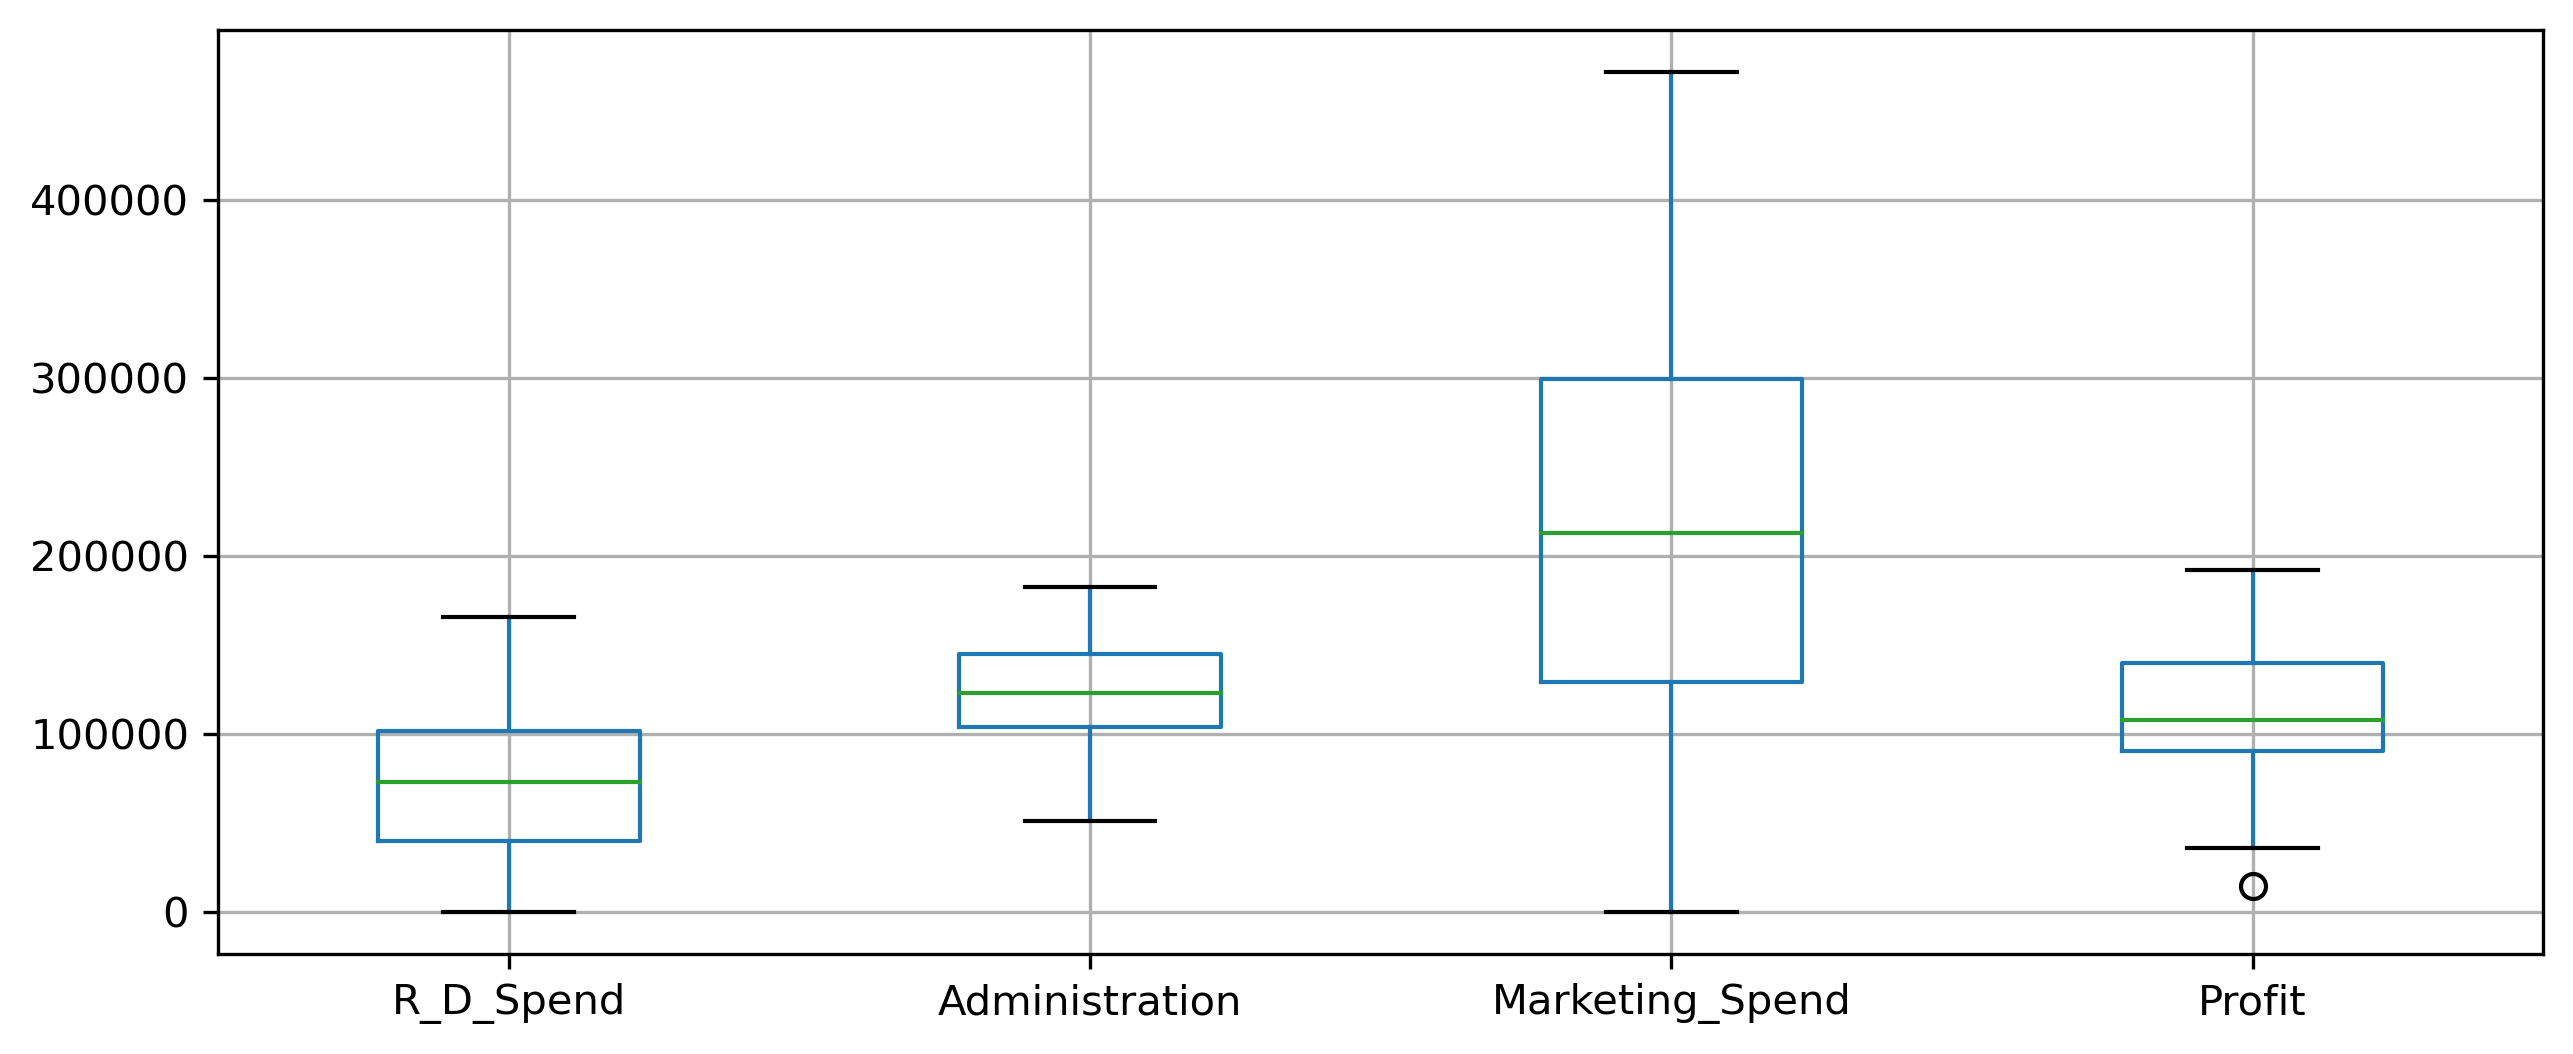

In [9]:
df.boxplot()

In [10]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [11]:
outlier_detection(df,'Profit')

(15698.290000000023, 214206.58999999997)

In [12]:
df[df['Profit']< 15698.290000000023]

R_D_Spend  Administration  Marketing_Spend       State   Profit
49        0.0        116983.8         45173.06  California  14681.4

In [13]:
df.loc[df['Profit']< 15698.290000000023,'Profit'] = 15698.290000000023

<Axes: >

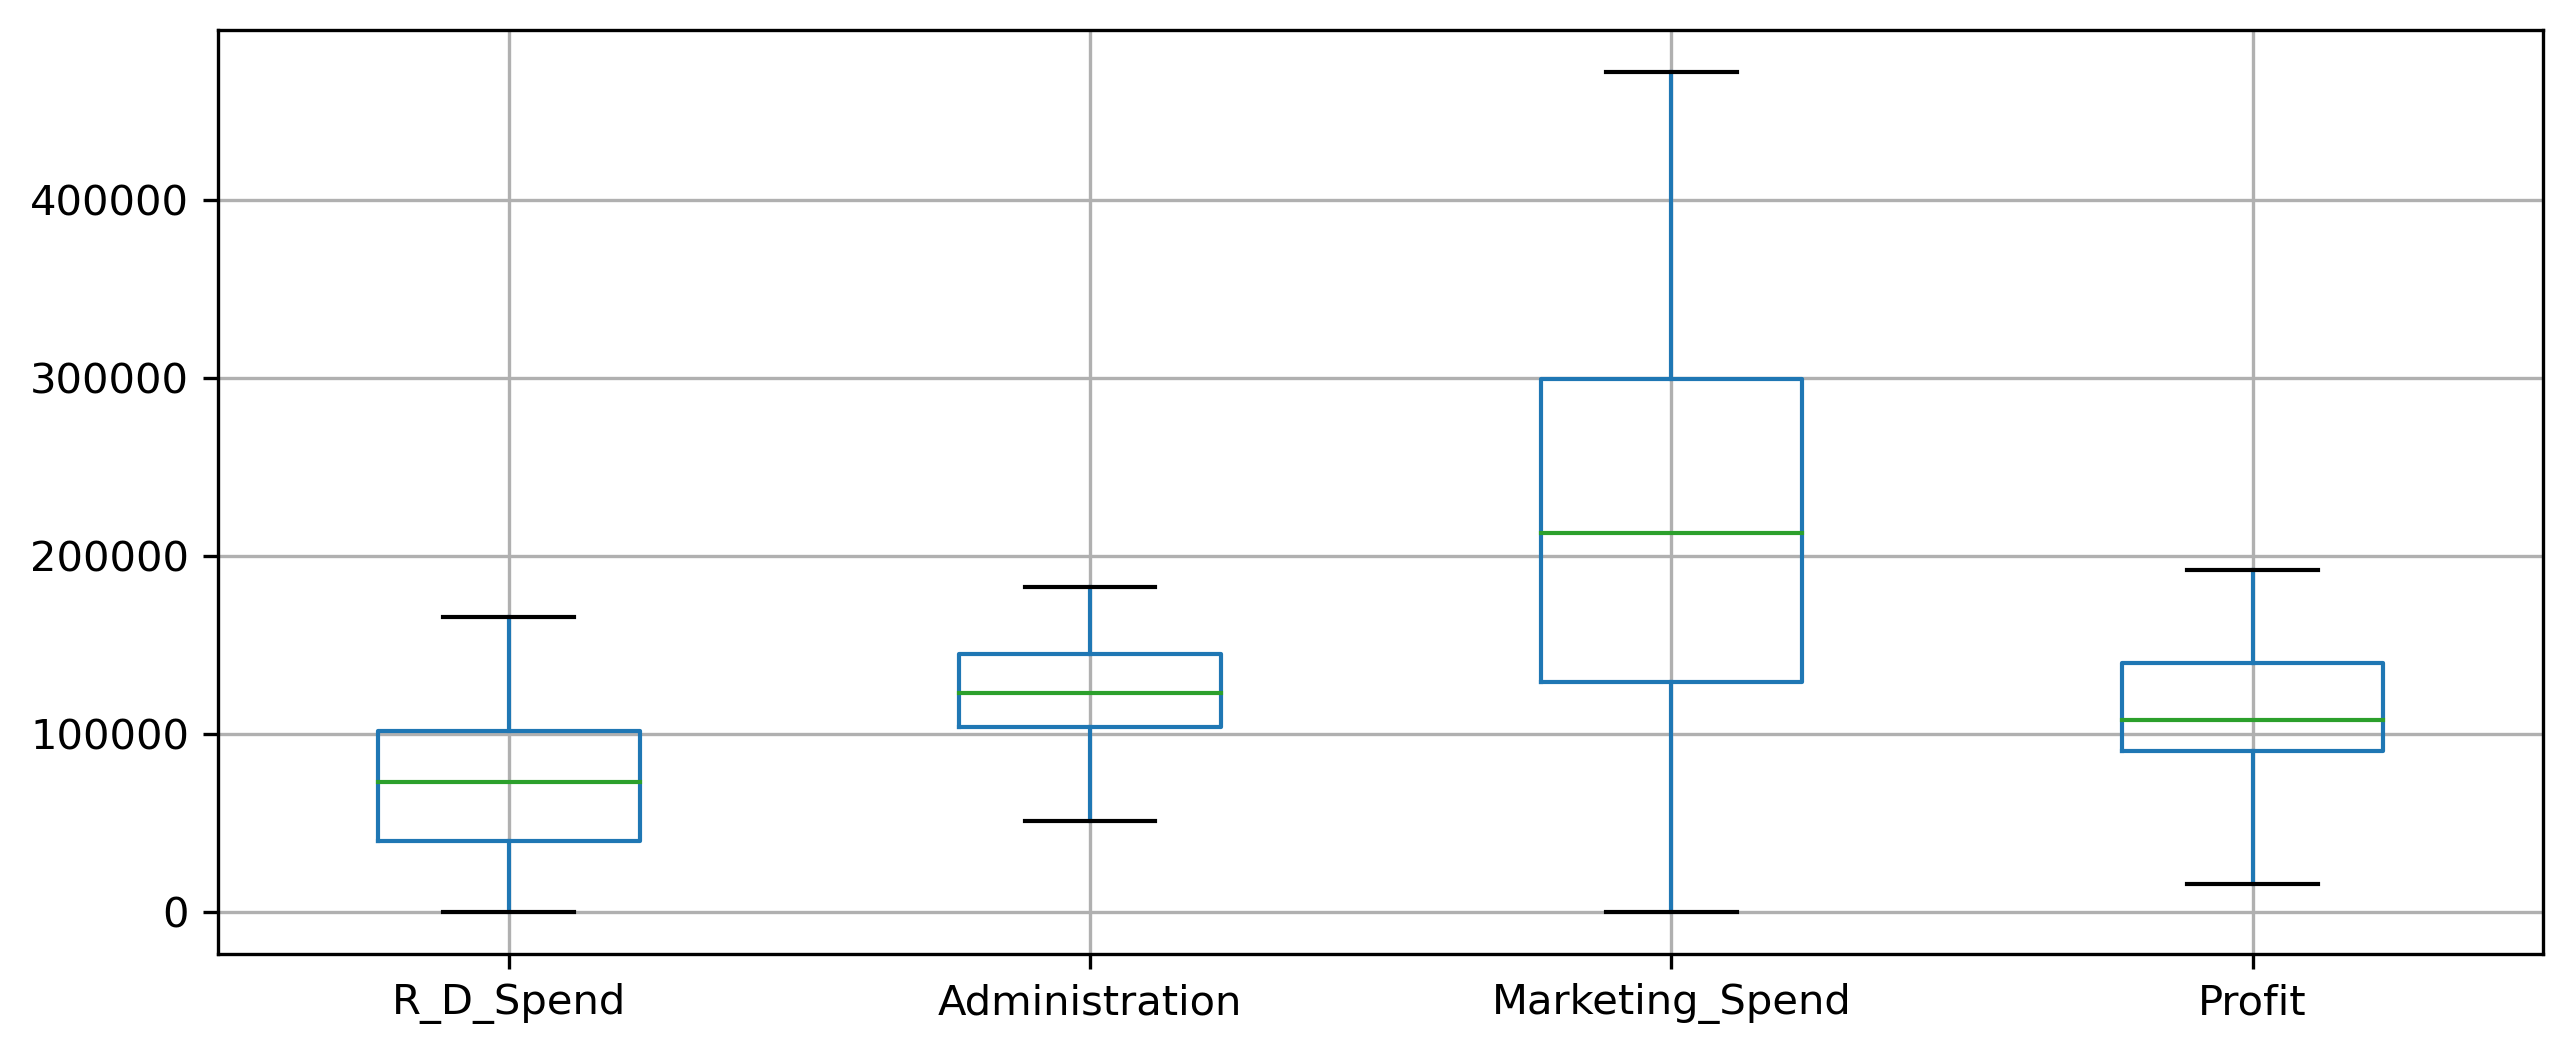

In [14]:
df.boxplot()

In [15]:
df.corr()

R_D_Spend  Administration  Marketing_Spend    Profit
R_D_Spend         1.000000        0.241955         0.724248  0.973278
Administration    0.241955        1.000000        -0.032154  0.200885
Marketing_Spend   0.724248       -0.032154         1.000000  0.747993
Profit            0.973278        0.200885         0.747993  1.000000

<Axes: >

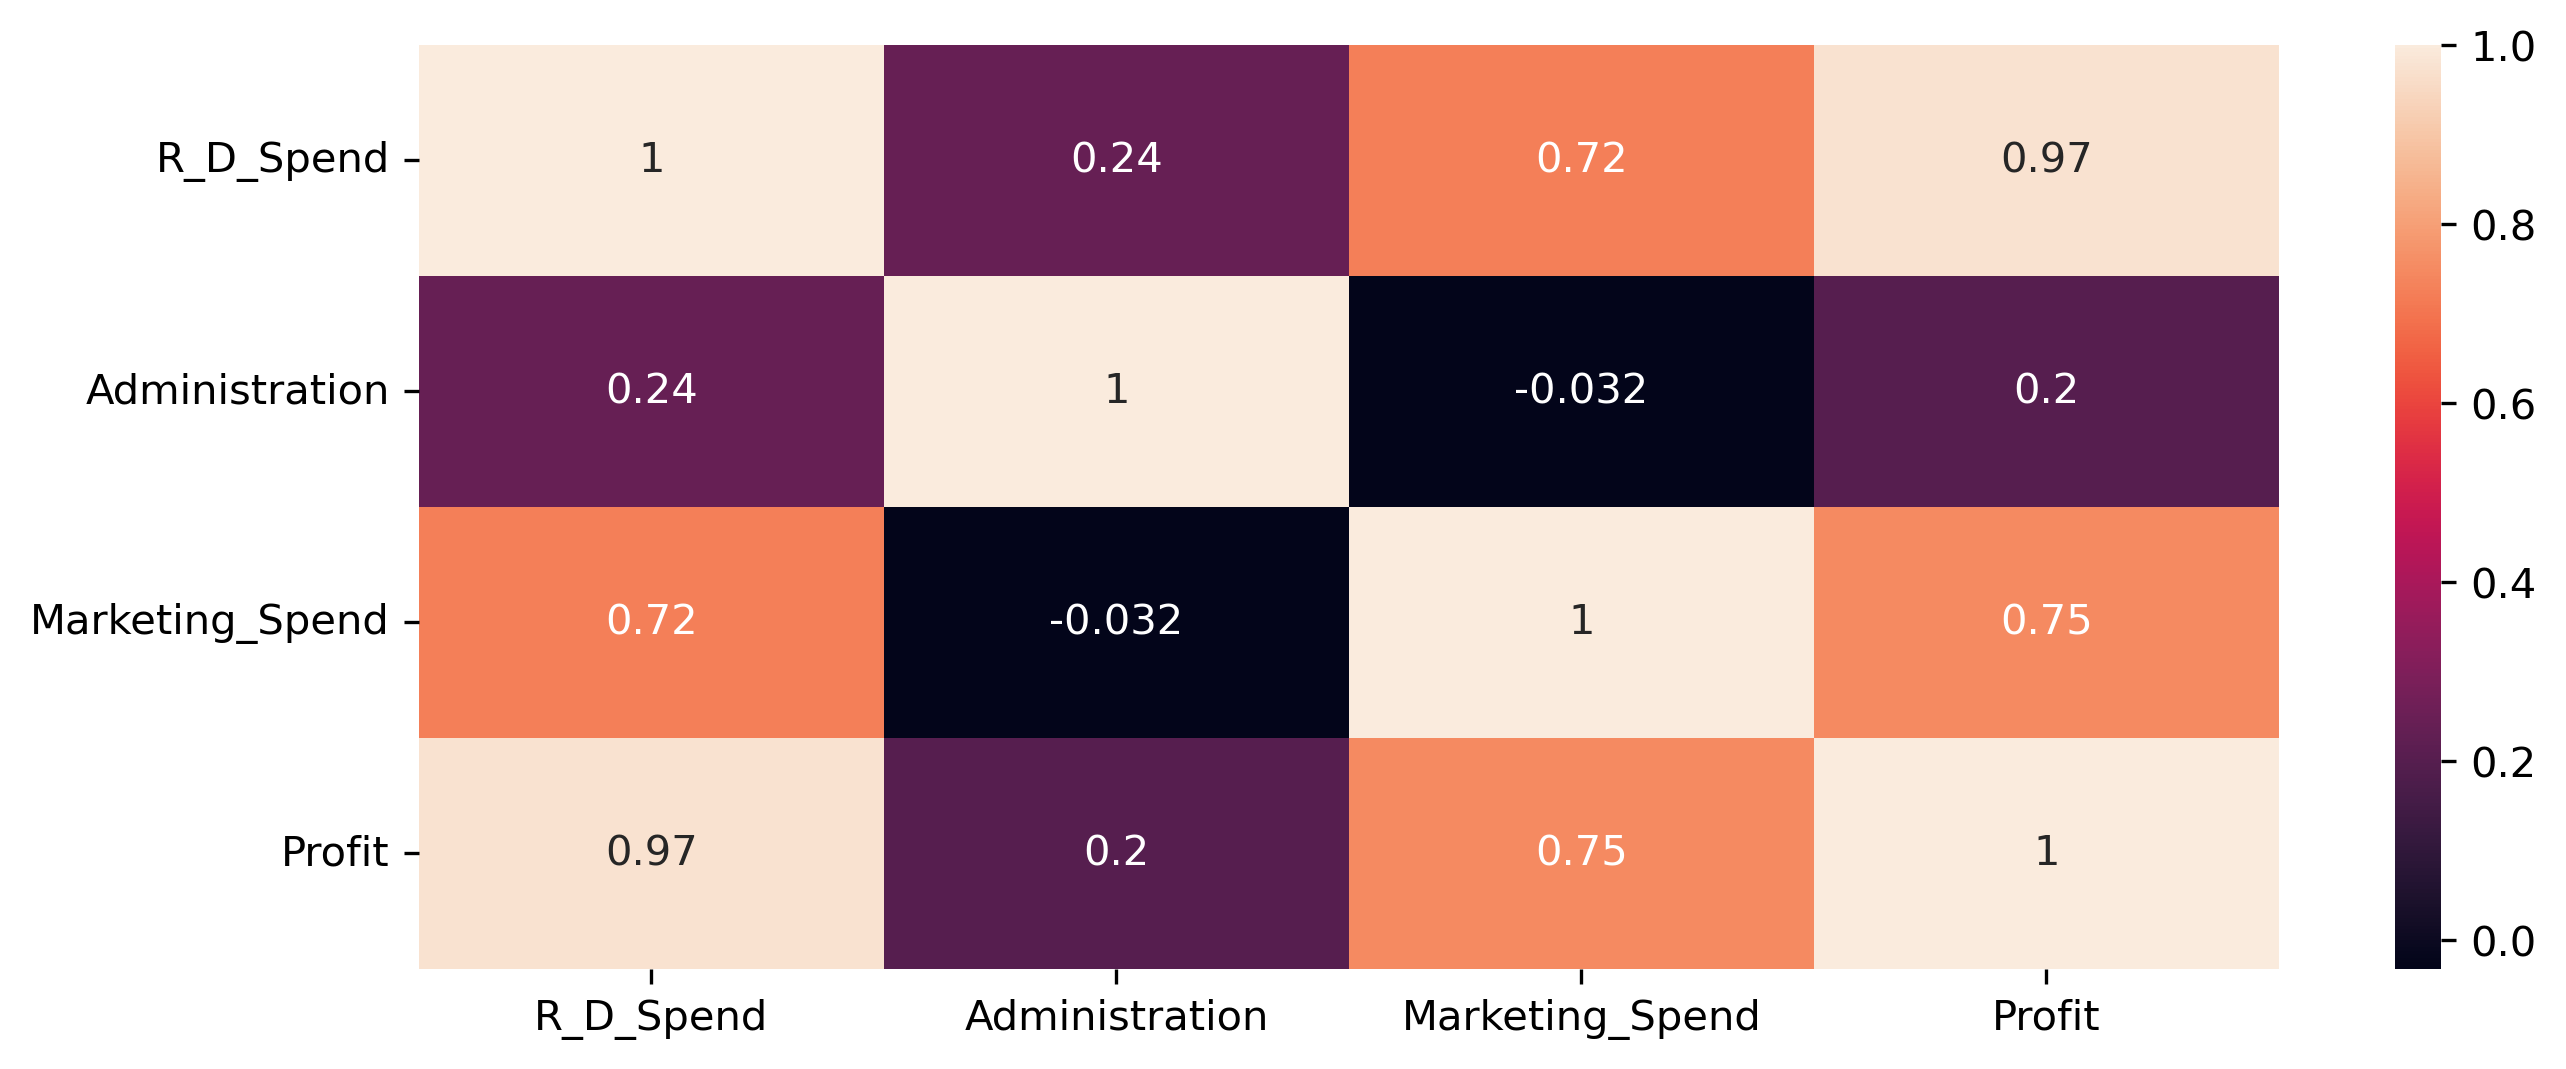

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
#sns.pairplot(df)

# Model Building

In [18]:
model = smf.ols('Profit~R_D_Spend+Administration+Marketing_Spend',data=df).fit()
model

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     300.6
Date:                Sun, 24 Dec 2023   Prob (F-statistic):           3.22e-30
Time:                        10:23:51   Log-Likelihood:                -524.95
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.019e+04   6515.750      7.702      0.000    3.71e+04    6.33e+04
R_D_Spend           0.8051      0.045     17.987      0.000       0.715       0.895
Administration     -0.0267      0.051     -0.528      0.600      -0.129       0.075
Marketing_Spend     0.0272      0.016      1.666      0.103      -0.006       0.060
==============================================================================
Omnibus:                       13.316   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.761
Skew:                          -0.888   Prob(JB):                     0.000139
Kurtosis:                       5.317   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model.pvalues

Intercept          8.154525e-10
R_D_Spend          1.918916e-22
Administration     6.003730e-01
Marketing_Spend    1.025052e-01
dtype: float64

In [21]:
model.rsquared, model.rsquared_adj, model.aic

(0.9514706520592465, 0.9483056945848496, 1057.9065499236722)

In [22]:
data = df.drop(columns=['Profit','State'])
data

R_D_Spend  Administration  Marketing_Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86       113867.30        298664.47
21   78389.47       153773.43        299737.29
22   73994.56       122782.75        303319.26
23   67532.53       105751.03        304768.73
24   77044.01        99281.34        140574.81
25   64664.71       139553.16        137962.62
26   75328.87       144135.98        134050.07
27   72107.60       127864.55        353183.81
28   66051.52       182645.56        118148.20
29   65605.48       153032.06        107138.38
30   61994.48       115641.28         91131.24
31   61136.38       152701.92         88218.23
32   63408.86       129219.61         46085.25
33   55493.95       103057.49        214634.81
34   46426.07       157693.92        210797.67
35   46014.02        85047.44        205517.64
36   28663.76       127056.21        201126.82
37   44069.95        51283.14        197029.42
38   20229.59        65947.93        185265.10
39   38558.51        82982.09        174999.30
40   28754.33       118546.05        172795.67
41   27892.92        84710.77        164470.71
42   23640.93        96189.63        148001.11
43   15505.73       127382.30         35534.17
44   22177.74       154806.14         28334.72
45    1000.23       124153.04          1903.93
46    1315.46       115816.21        297114.46
47       0.00       135426.92             0.00
48     542.05        51743.15             0.00
49       0.00       116983.80         45173.06

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
data.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

# VIF

In [25]:
vif = pd.DataFrame({'Features':data.columns,
                   'VIF':[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]})  
vif

Features       VIF
0        R_D_Spend  8.384571
1   Administration  4.026406
2  Marketing_Spend  7.593984

# Subset Selection

In [26]:
model1 = smf.ols('Profit~Administration+Marketing_Spend',data=df).fit()
model1

In [27]:
model2 = smf.ols('Profit~R_D_Spend+Administration',data=df).fit()
model2

In [28]:
DF = pd.DataFrame({'Model_Name':['model1','model2'],
                    'R2_SquredValue':[model1.rsquared,model2.rsquared],
                  'AIC':[model1.aic,model2.aic]})
DF

Model_Name  R2_SquredValue          AIC
0     model1        0.610142  1160.087185
1     model2        0.948542  1058.836026

In [29]:
model = model2

# Model validation techniques

- Q-Q Plot

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

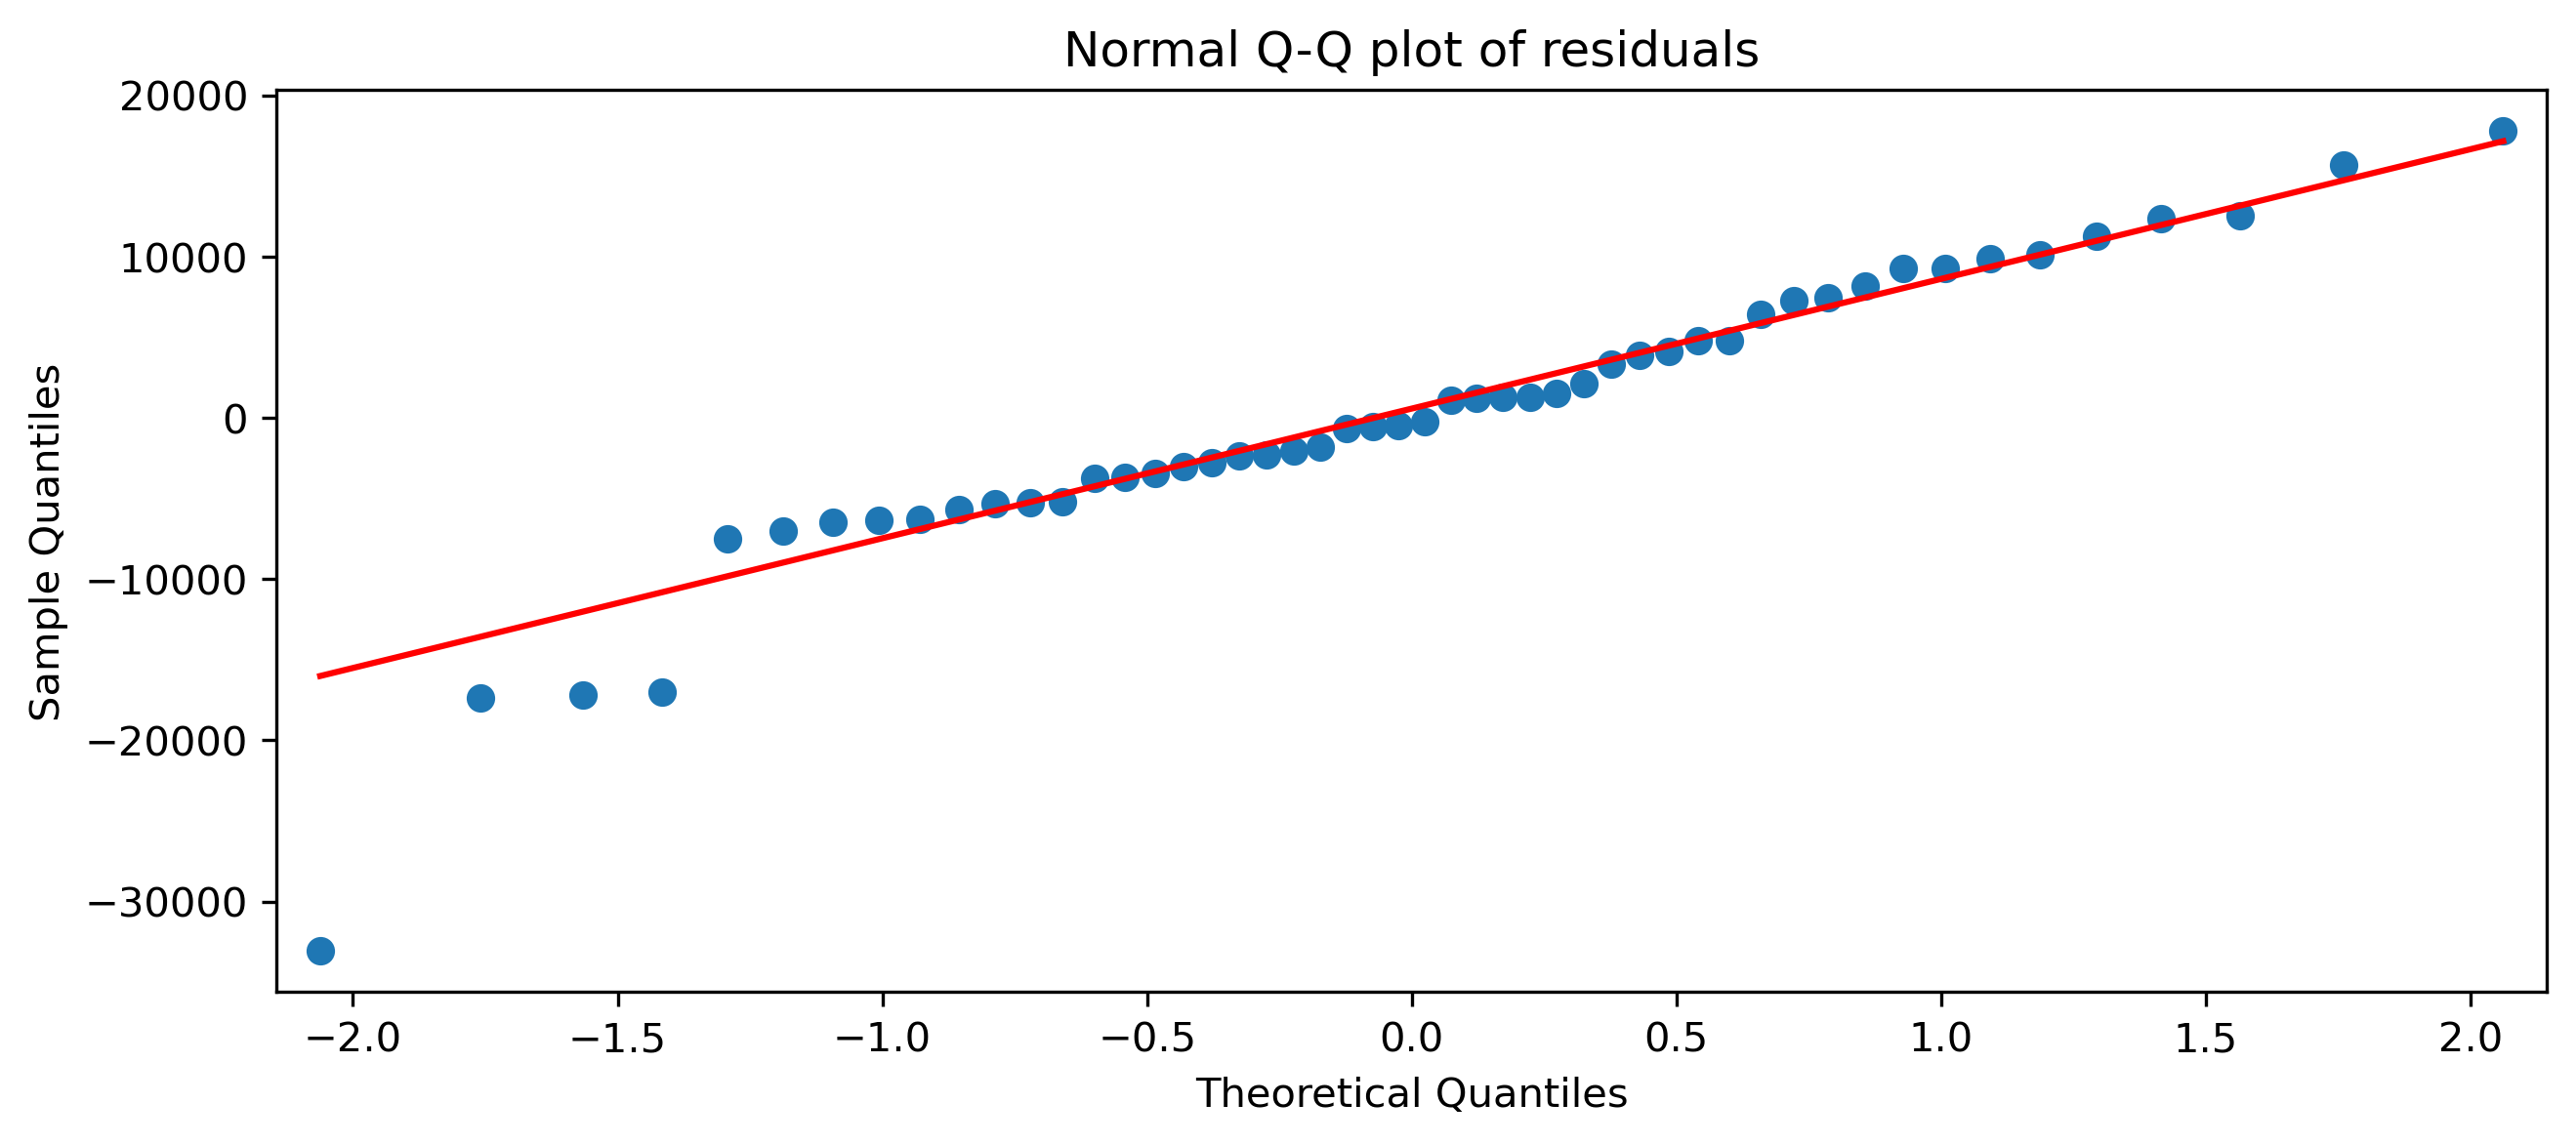

In [30]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")

In [31]:
np.argmax(model.resid),np.max(model.resid)

(36, 17788.103999270767)

In [32]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# Residual plot

Text(0, 0.5, 'Errors')

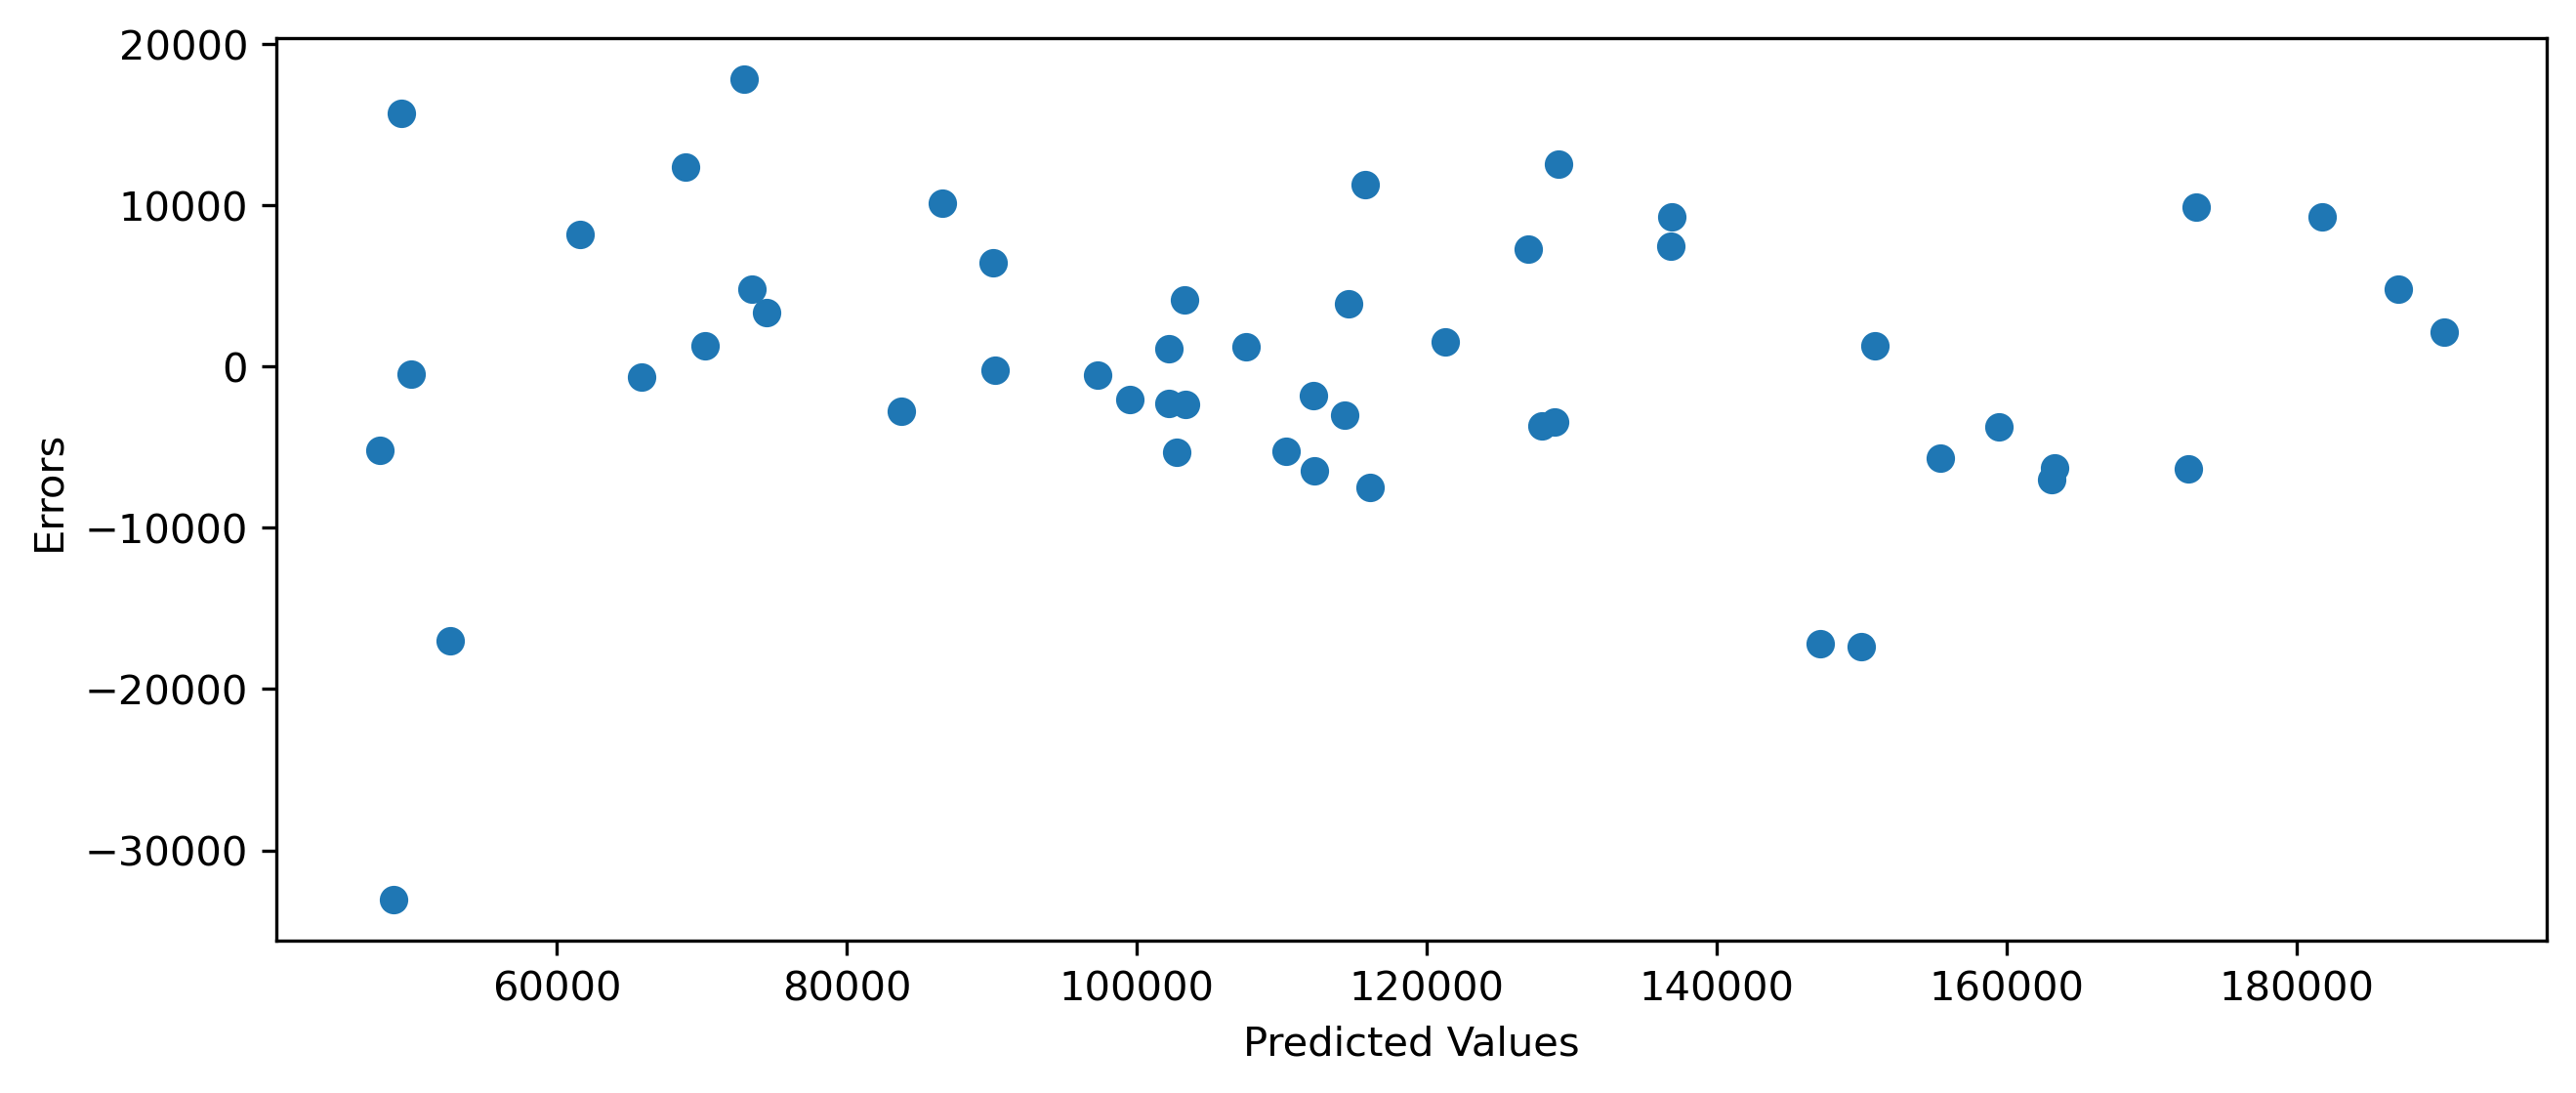

In [33]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

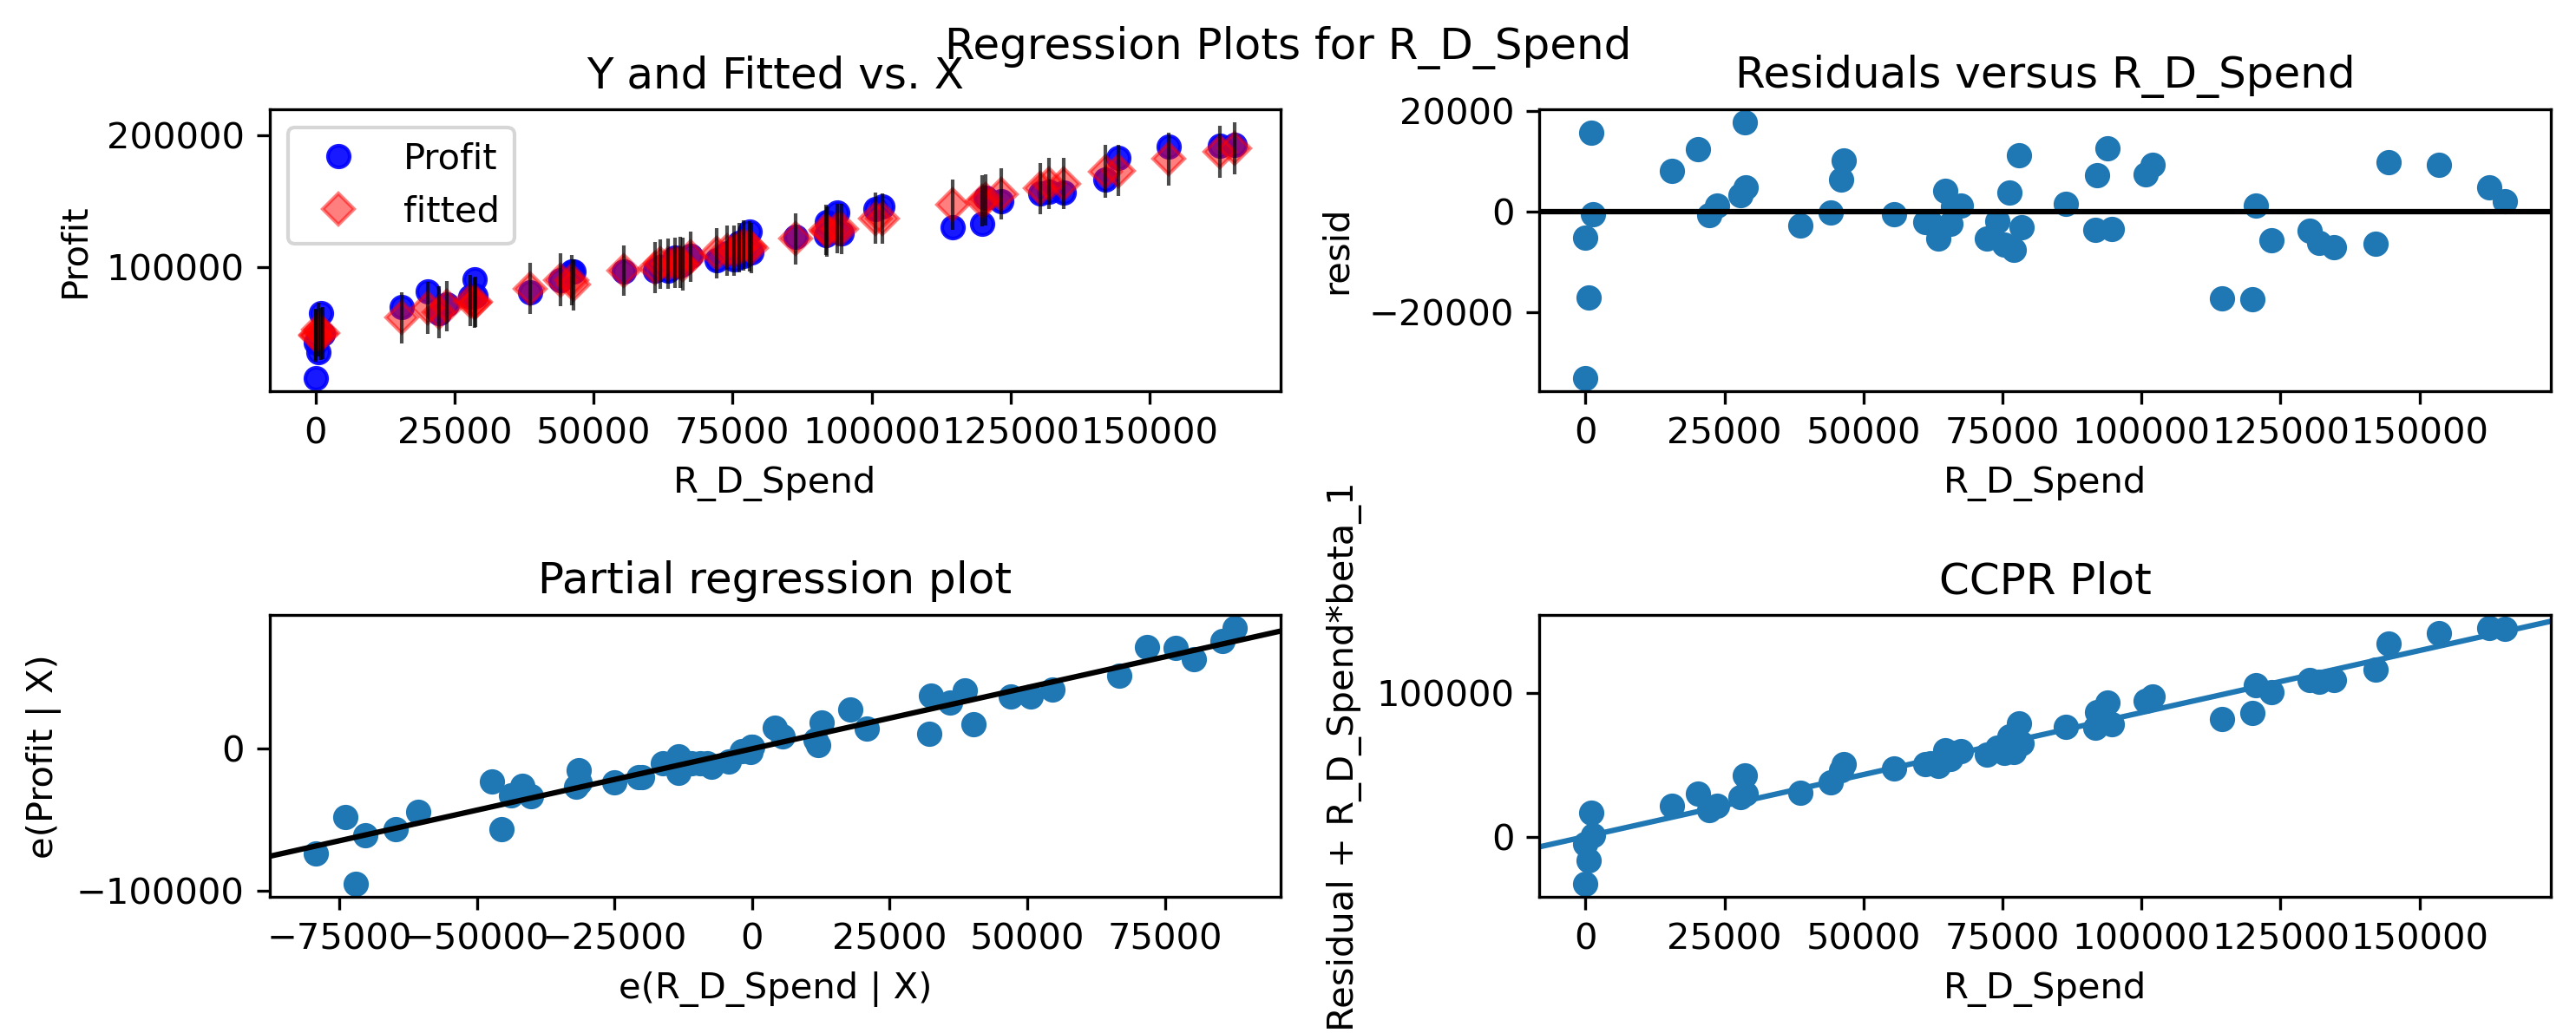

In [34]:
sm.graphics.plot_regress_exog(model,'R_D_Spend');

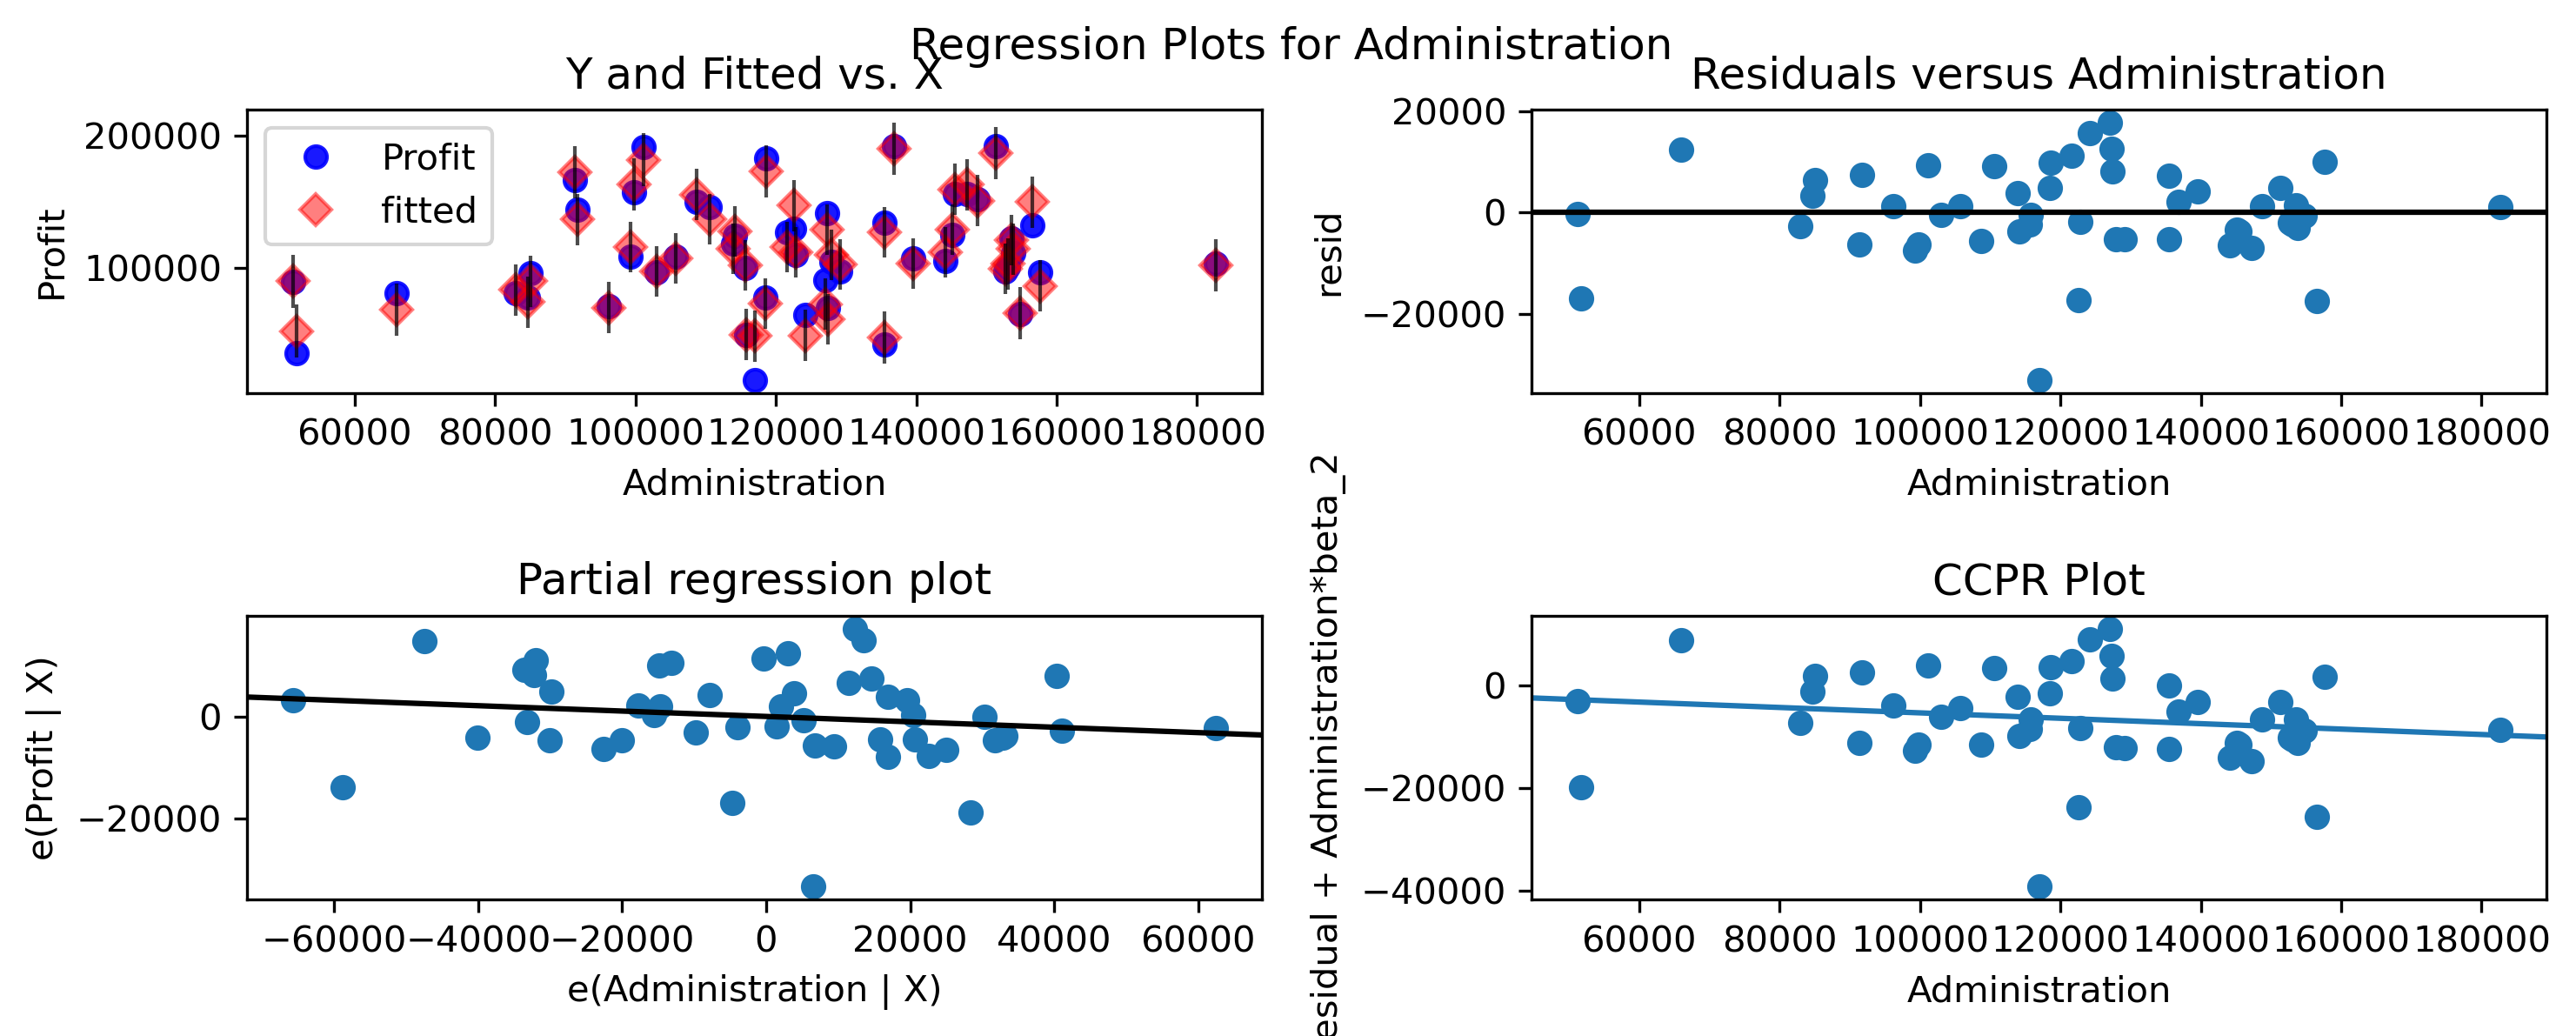

In [35]:
sm.graphics.plot_regress_exog(model,'Administration');

In [36]:
#sm.graphics.plot_regress_exog(model,'Marketing_Spend');

In [37]:
inf = model.get_influence()
c,p = inf.cooks_distance

# Model deletion techniques

- Cook's Distance plot

Text(0, 0.5, 'Cooks Distance')

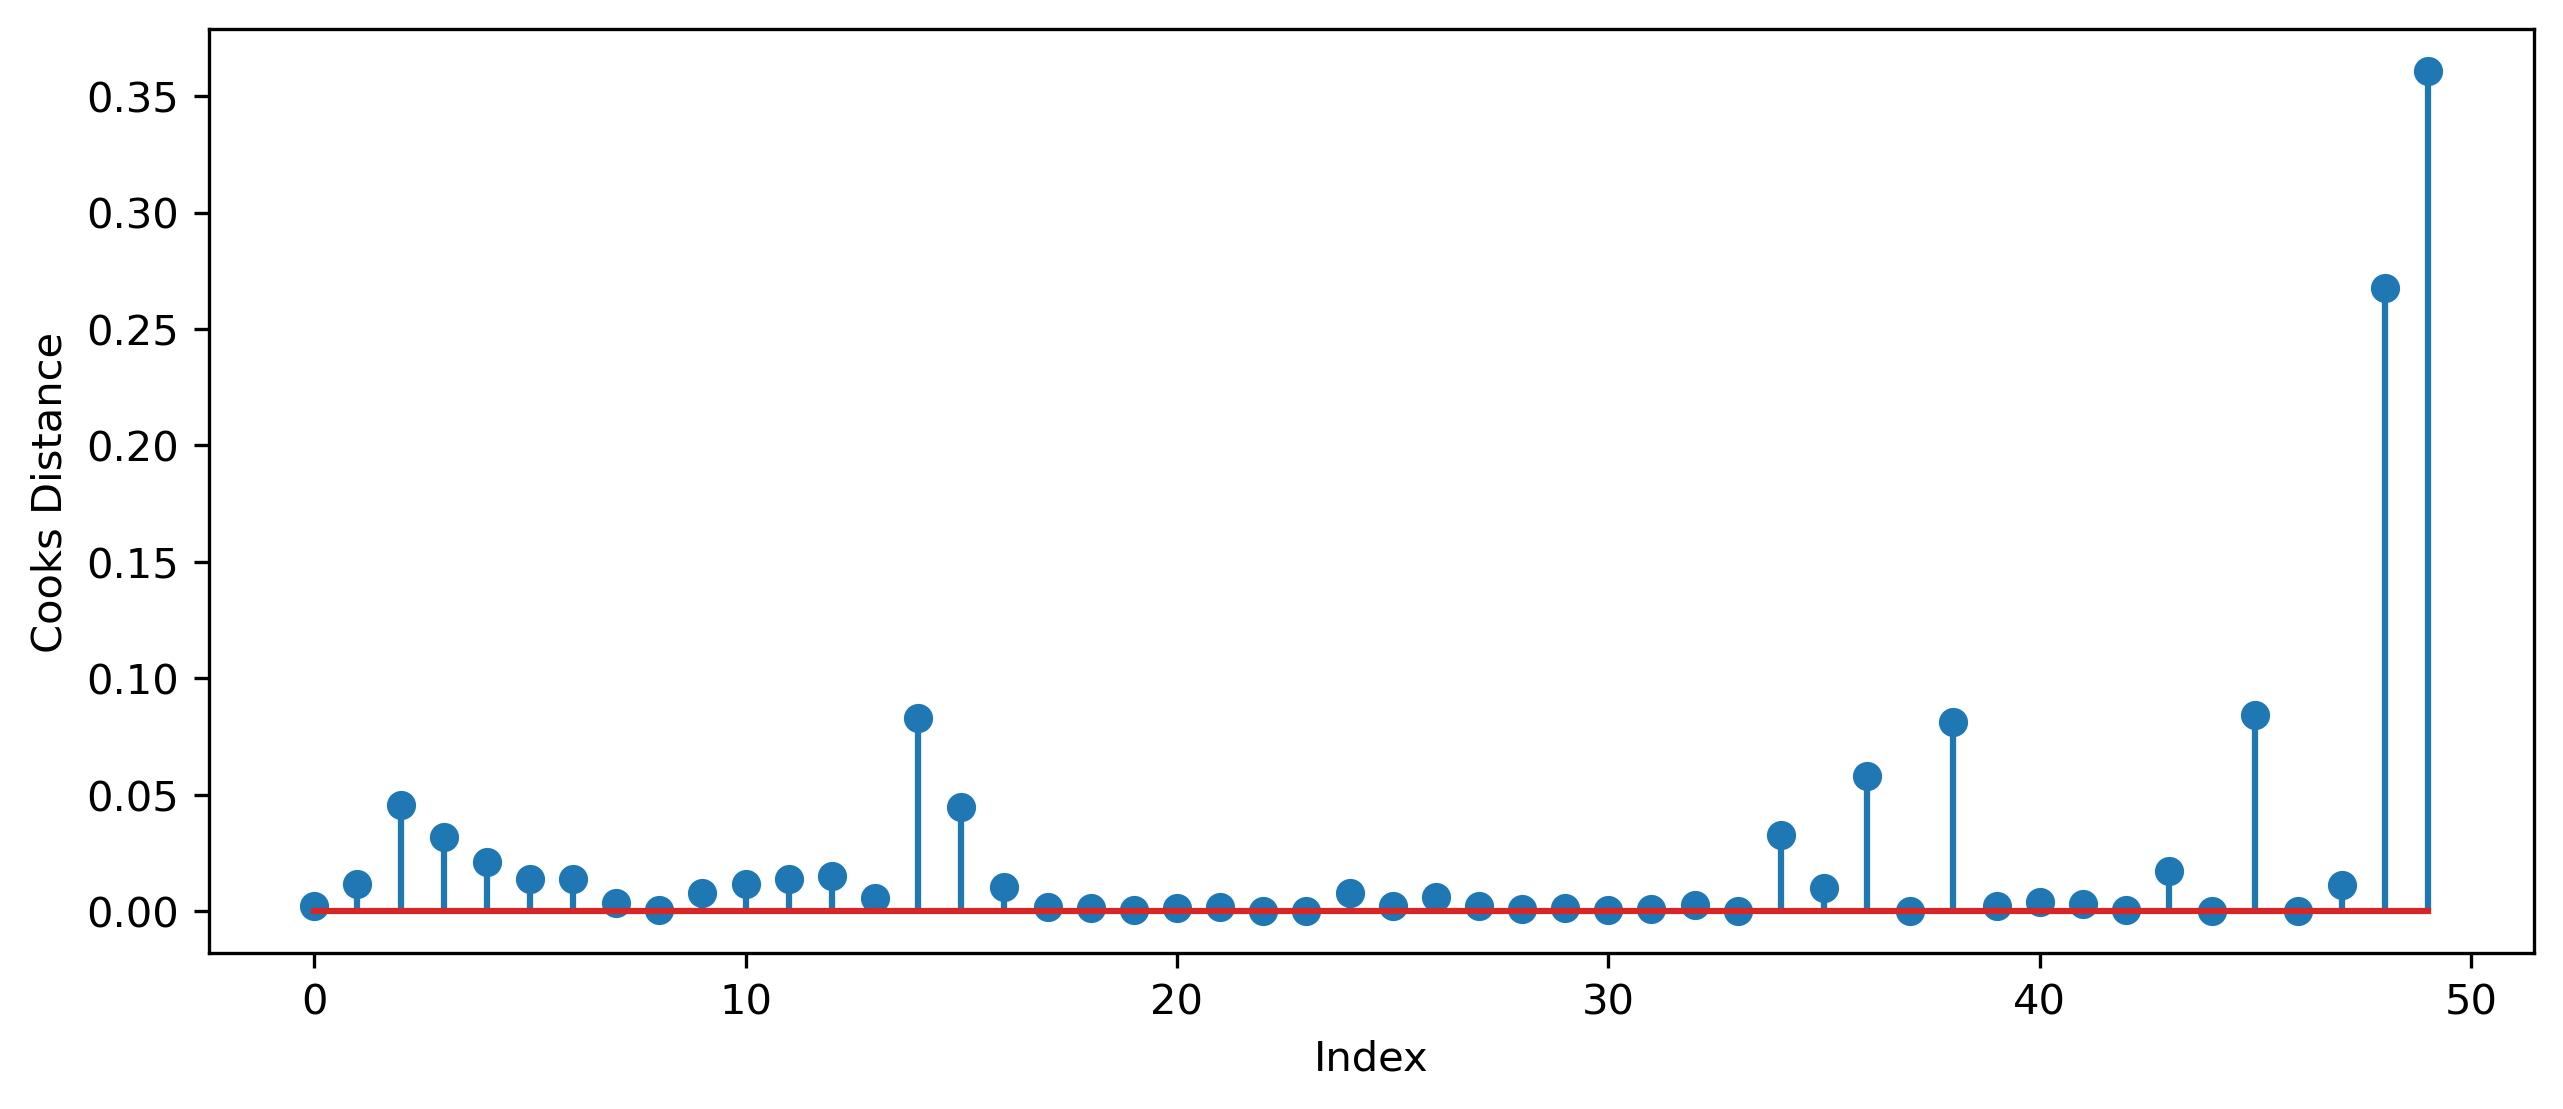

In [38]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [39]:
np.argmax(c),np.max(c)

(49, 0.36069050400763786)

In [40]:
df.iloc[[49]]

R_D_Spend  Administration  Marketing_Spend       State    Profit
49        0.0        116983.8         45173.06  California  15698.29

# Influence Plot 

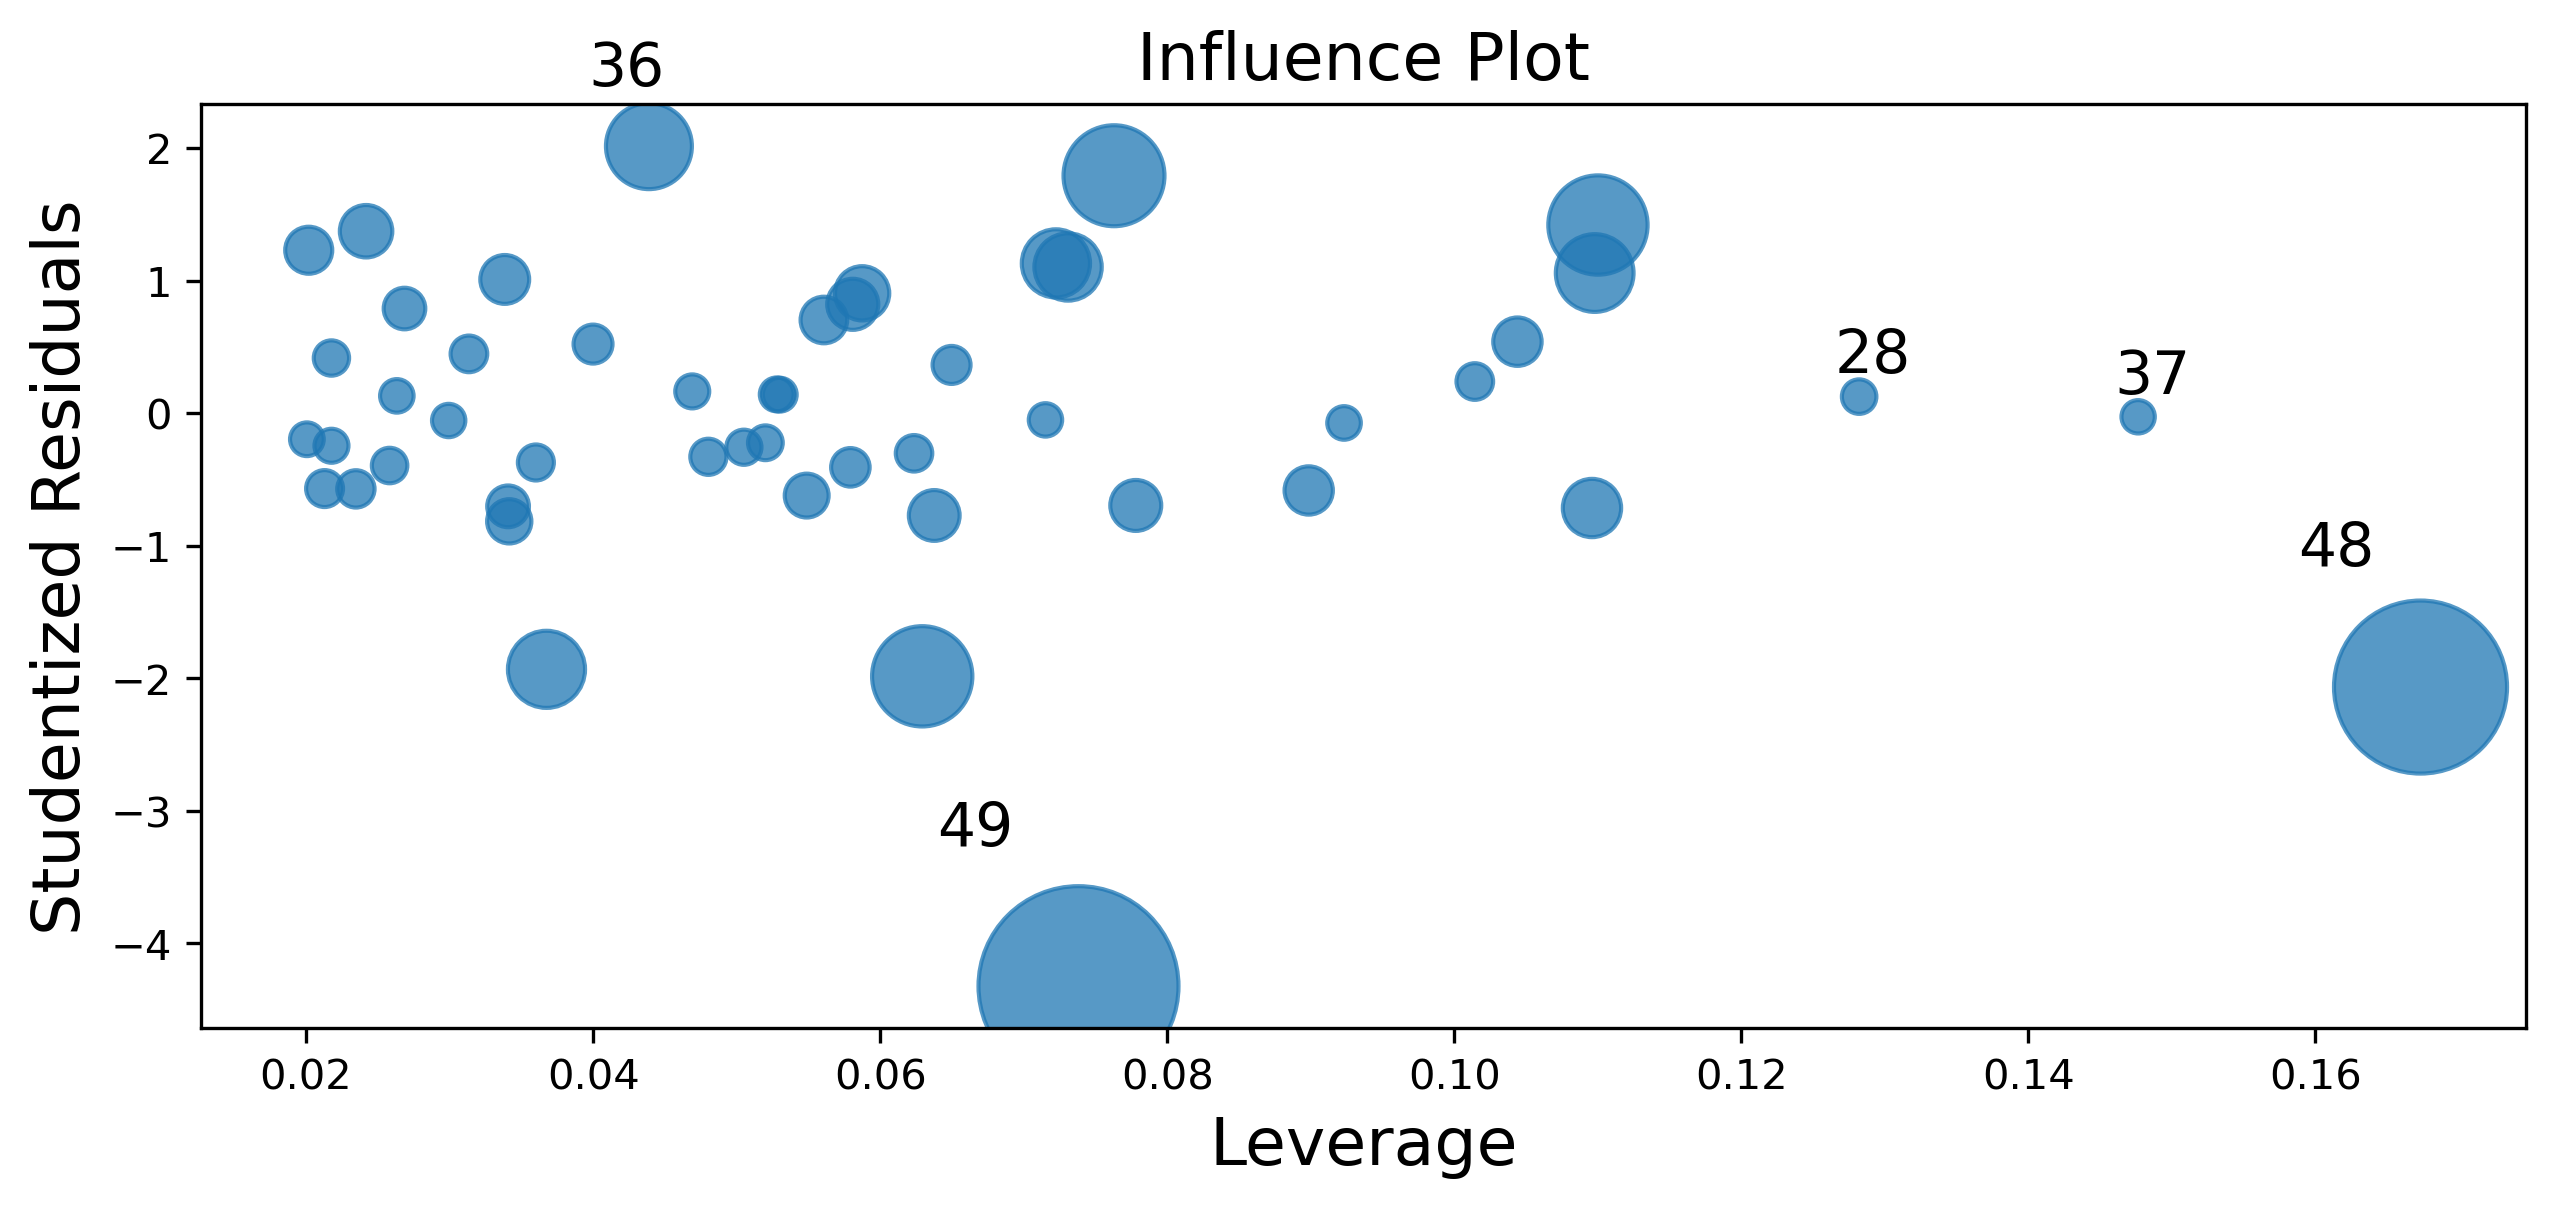

In [41]:
influence_plot(model);

In [42]:
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.36

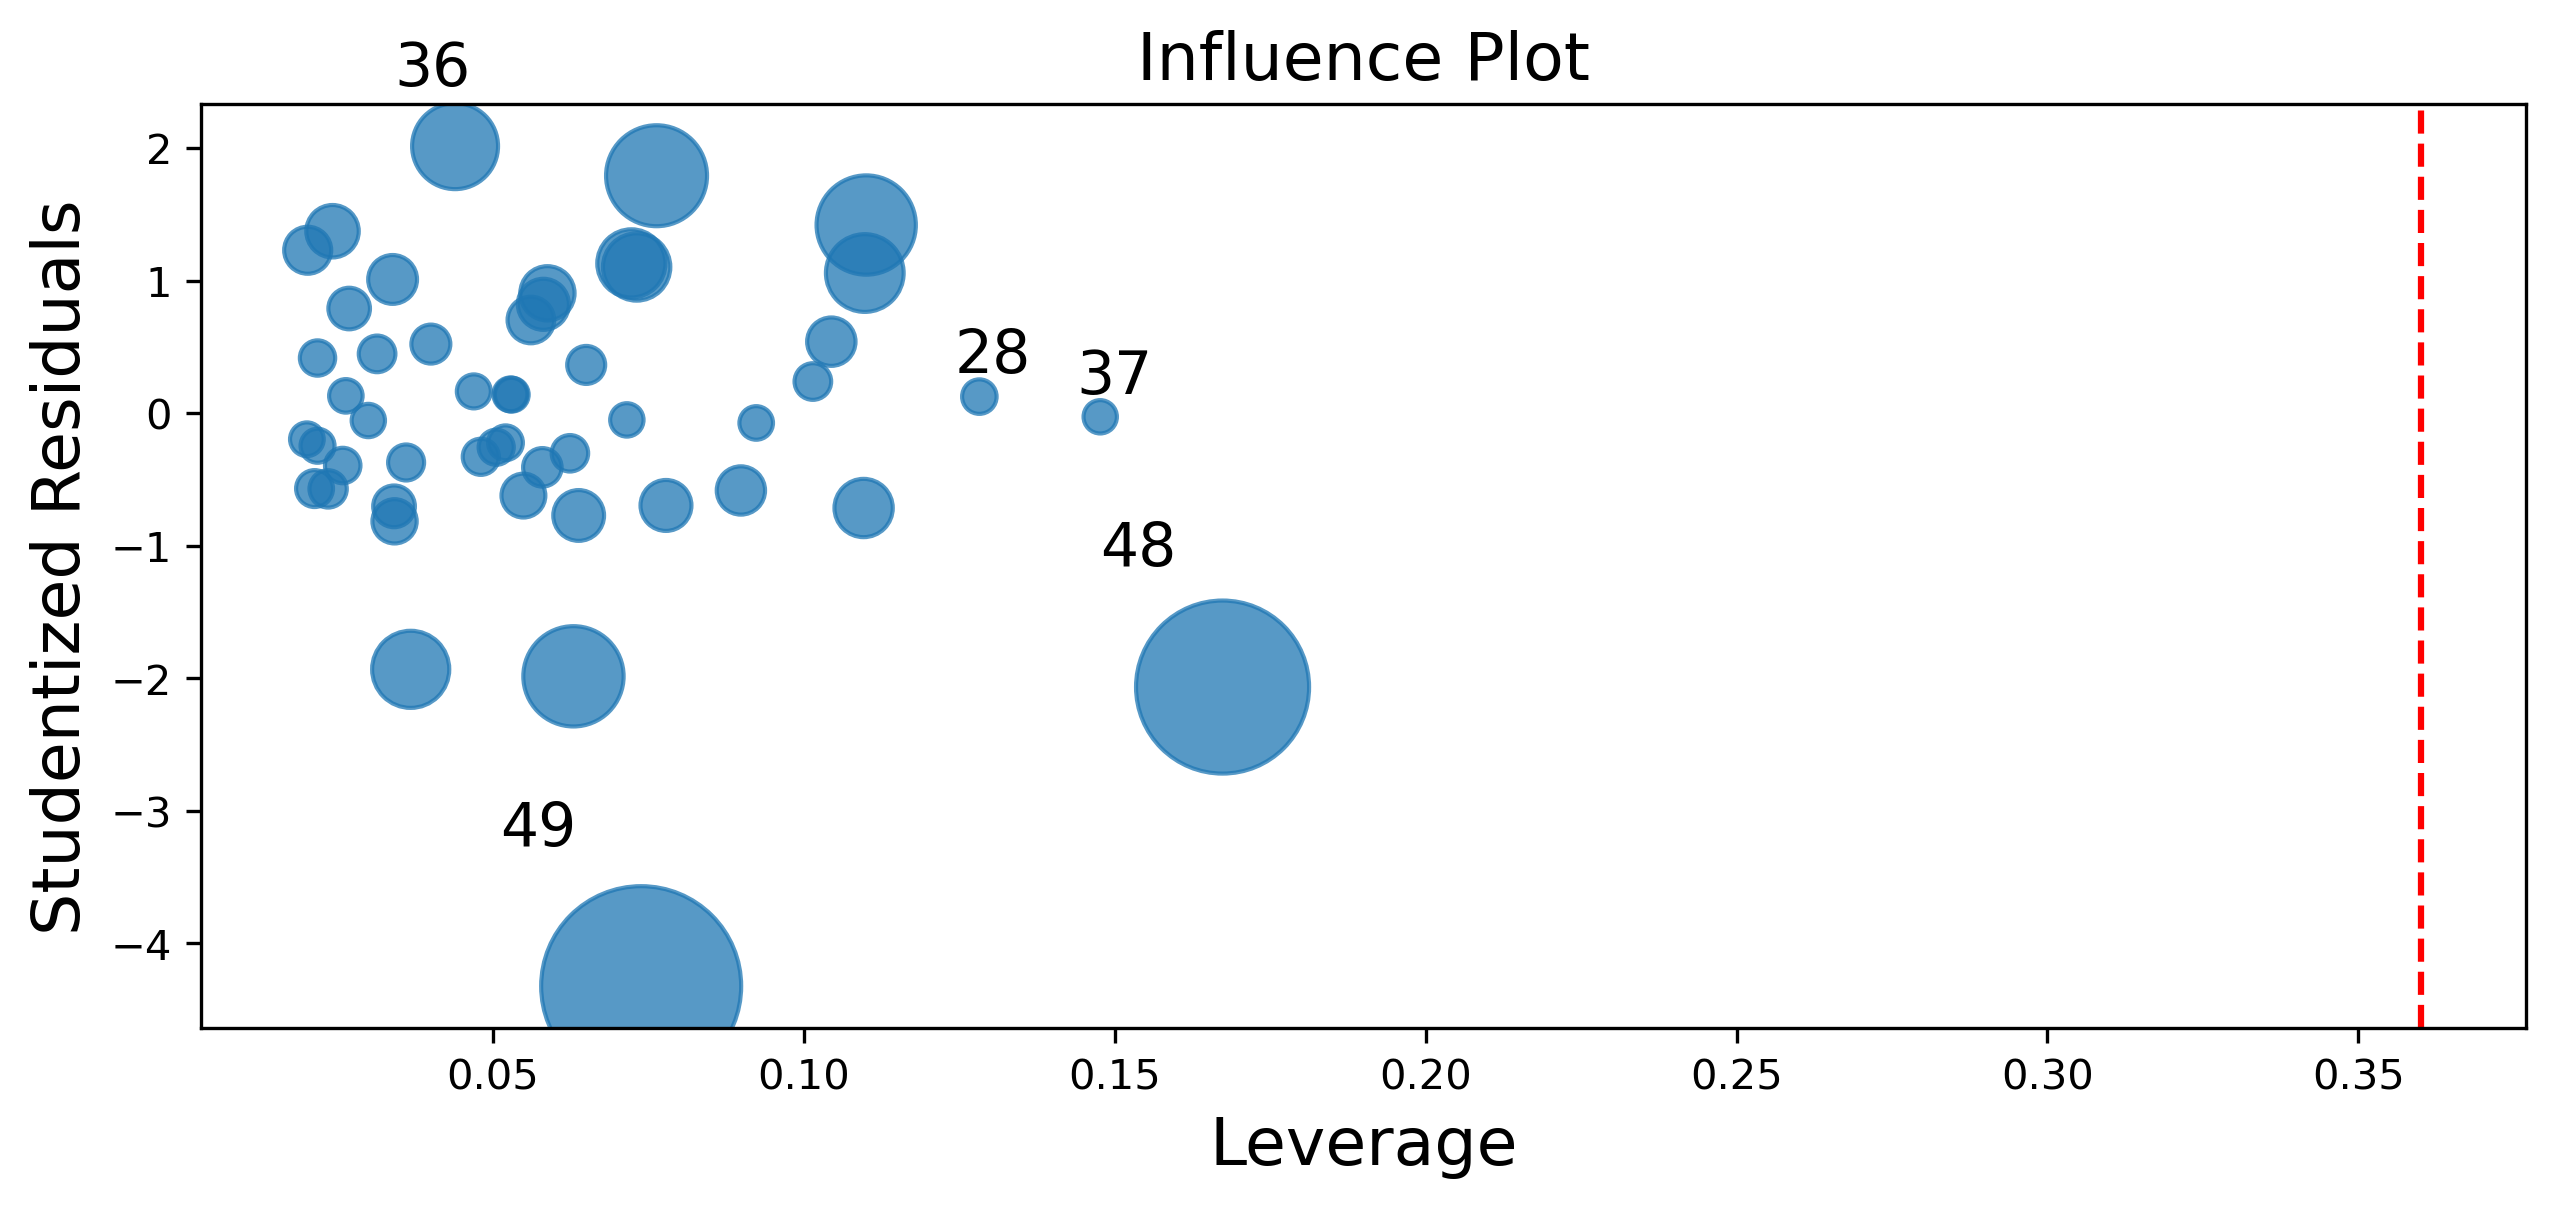

In [43]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

# Improving Model

In [44]:
df.drop(index=49,inplace=True)

In [45]:
final_model = smf.ols('Profit~R_D_Spend+Administration', data = df).fit()

In [46]:
final_model.rsquared

0.9584519070123048

In [47]:
test = pd.DataFrame({
    'R_D_Spend' : [116599.3,123569.2],
    'Administration' : [128563.2,117596.6]})
test

R_D_Spend  Administration
0   116599.3        128563.2
1   123569.2        117596.6

In [48]:
final_model.predict(test)

0    148211.764258
1    154539.708287
dtype: float64

In [49]:
table=pd.DataFrame({'Prep_Models':['Model','Final_Model'],
                    'Rsquared':[model.rsquared,final_model.rsquared]})
table

Prep_Models  Rsquared
0        Model  0.948542
1  Final_Model  0.958452

# Toyoto Corolla

# Read the data

In [50]:
df = pd.read_excel('D:\Data Science Assignments\Assignment 5 Multiple LR\Toyota_Corolla.xlsx',index_col=0)
df

Model  Price  Age_08_04  \
Id                                                                          
1         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
2         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
3         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
4         TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
5           TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
...                                                 ...    ...        ...   
1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500         69   
1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845         72   
1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500         71   
1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250         70   
1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950         76   

      Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color   Color  ...  \
Id                                                                  ...   
1            10      2002  46986    Diesel   90          1    Blue  ...   
2            10      2002  72937    Diesel   90          1  Silver  ...   
3             9      2002  41711    Diesel   90          1    Blue  ...   
4             7      2002  48000    Diesel   90          0   Black  ...   
5             3      2002  38500    Diesel   90          0   Black  ...   
...         ...       ...    ...       ...  ...        ...     ...  ...   
1438         12      1998  20544    Petrol   86          1    Blue  ...   
1439          9      1998  19000    Petrol   86          0    Grey  ...   
1440         10      1998  17016    Petrol   86          0    Blue  ...   
1441         11      1998  16916    Petrol   86          1    Grey  ...   
1442          5      1998      1    Petrol  110          0   Green  ...   

      Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
Id                                                                      
1                1                1               1      0          0   
2                1                0               1      0          0   
3                0                0               1      0          0   
4                0                0               1      0          0   
5                1                1               1      0          1   
...            ...              ...             ...    ...        ...   
1438             1                1               1      0          1   
1439             0                0               1      0          0   
1440             0                0               1      0          0   
1441             0                0               0      0          0   
1442             0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
Id                                                                          
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
5               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1438            1                 1             0               0        0  
1439            1                 1             0               0        0  
1440            0                 1             0               0        0  
1441            0                 1             0               0        0  
1442            0                 0             0               0        0  

[1436 rows x 37 columns]

In [51]:
df.describe()

Price    Age_08_04    Mfg_Month     Mfg_Year             KM  \
count   1436.000000  1436.000000  1436.000000  1436.000000    1436.000000   
mean   10730.824513    55.947075     5.548747  1999.625348   68533.259749   
std     3626.964585    18.599988     3.354085     1.540722   37506.448872   
min     4350.000000     1.000000     1.000000  1998.000000       1.000000   
25%     8450.000000    44.000000     3.000000  1998.000000   43000.000000   
50%     9900.000000    61.000000     5.000000  1999.000000   63389.500000   
75%    11950.000000    70.000000     8.000000  2001.000000   87020.750000   
max    32500.000000    80.000000    12.000000  2004.000000  243000.000000   

                HP    Met_Color    Automatic           cc        Doors  ...  \
count  1436.000000  1436.000000  1436.000000   1436.00000  1436.000000  ...   
mean    101.502089     0.674791     0.055710   1576.85585     4.033426  ...   
std      14.981080     0.468616     0.229441    424.38677     0.952677  ...   
min      69.000000     0.000000     0.000000   1300.00000     2.000000  ...   
25%      90.000000     0.000000     0.000000   1400.00000     3.000000  ...   
50%     110.000000     1.000000     0.000000   1600.00000     4.000000  ...   
75%     110.000000     1.000000     0.000000   1600.00000     5.000000  ...   
max     192.000000     1.000000     1.000000  16000.00000     5.000000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 34 columns]

# EDA

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             1436 non-null   object
 1   Price             1436 non-null   int64 
 2   Age_08_04         1436 non-null   int64 
 3   Mfg_Month         1436 non-null   int64 
 4   Mfg_Year          1436 non-null   int64 
 5   KM                1436 non-null   int64 
 6   Fuel_Type         1436 non-null   object
 7   HP                1436 non-null   int64 
 8   Met_Color         1436 non-null   int64 
 9   Color             1436 non-null   object
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [53]:
df.dtypes

Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
d

In [54]:
df[df.duplicated()]

Empty DataFrame
Columns: [Model, Price, Age_08_04, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Color, Automatic, cc, Doors, Cylinders, Gears, Quarterly_Tax, Weight, Mfr_Guarantee, BOVAG_Guarantee, Guarantee_Period, ABS, Airbag_1, Airbag_2, Airco, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Tow_Bar]
Index: []

[0 rows x 37 columns]

In [55]:
df.isnull().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

<Axes: >

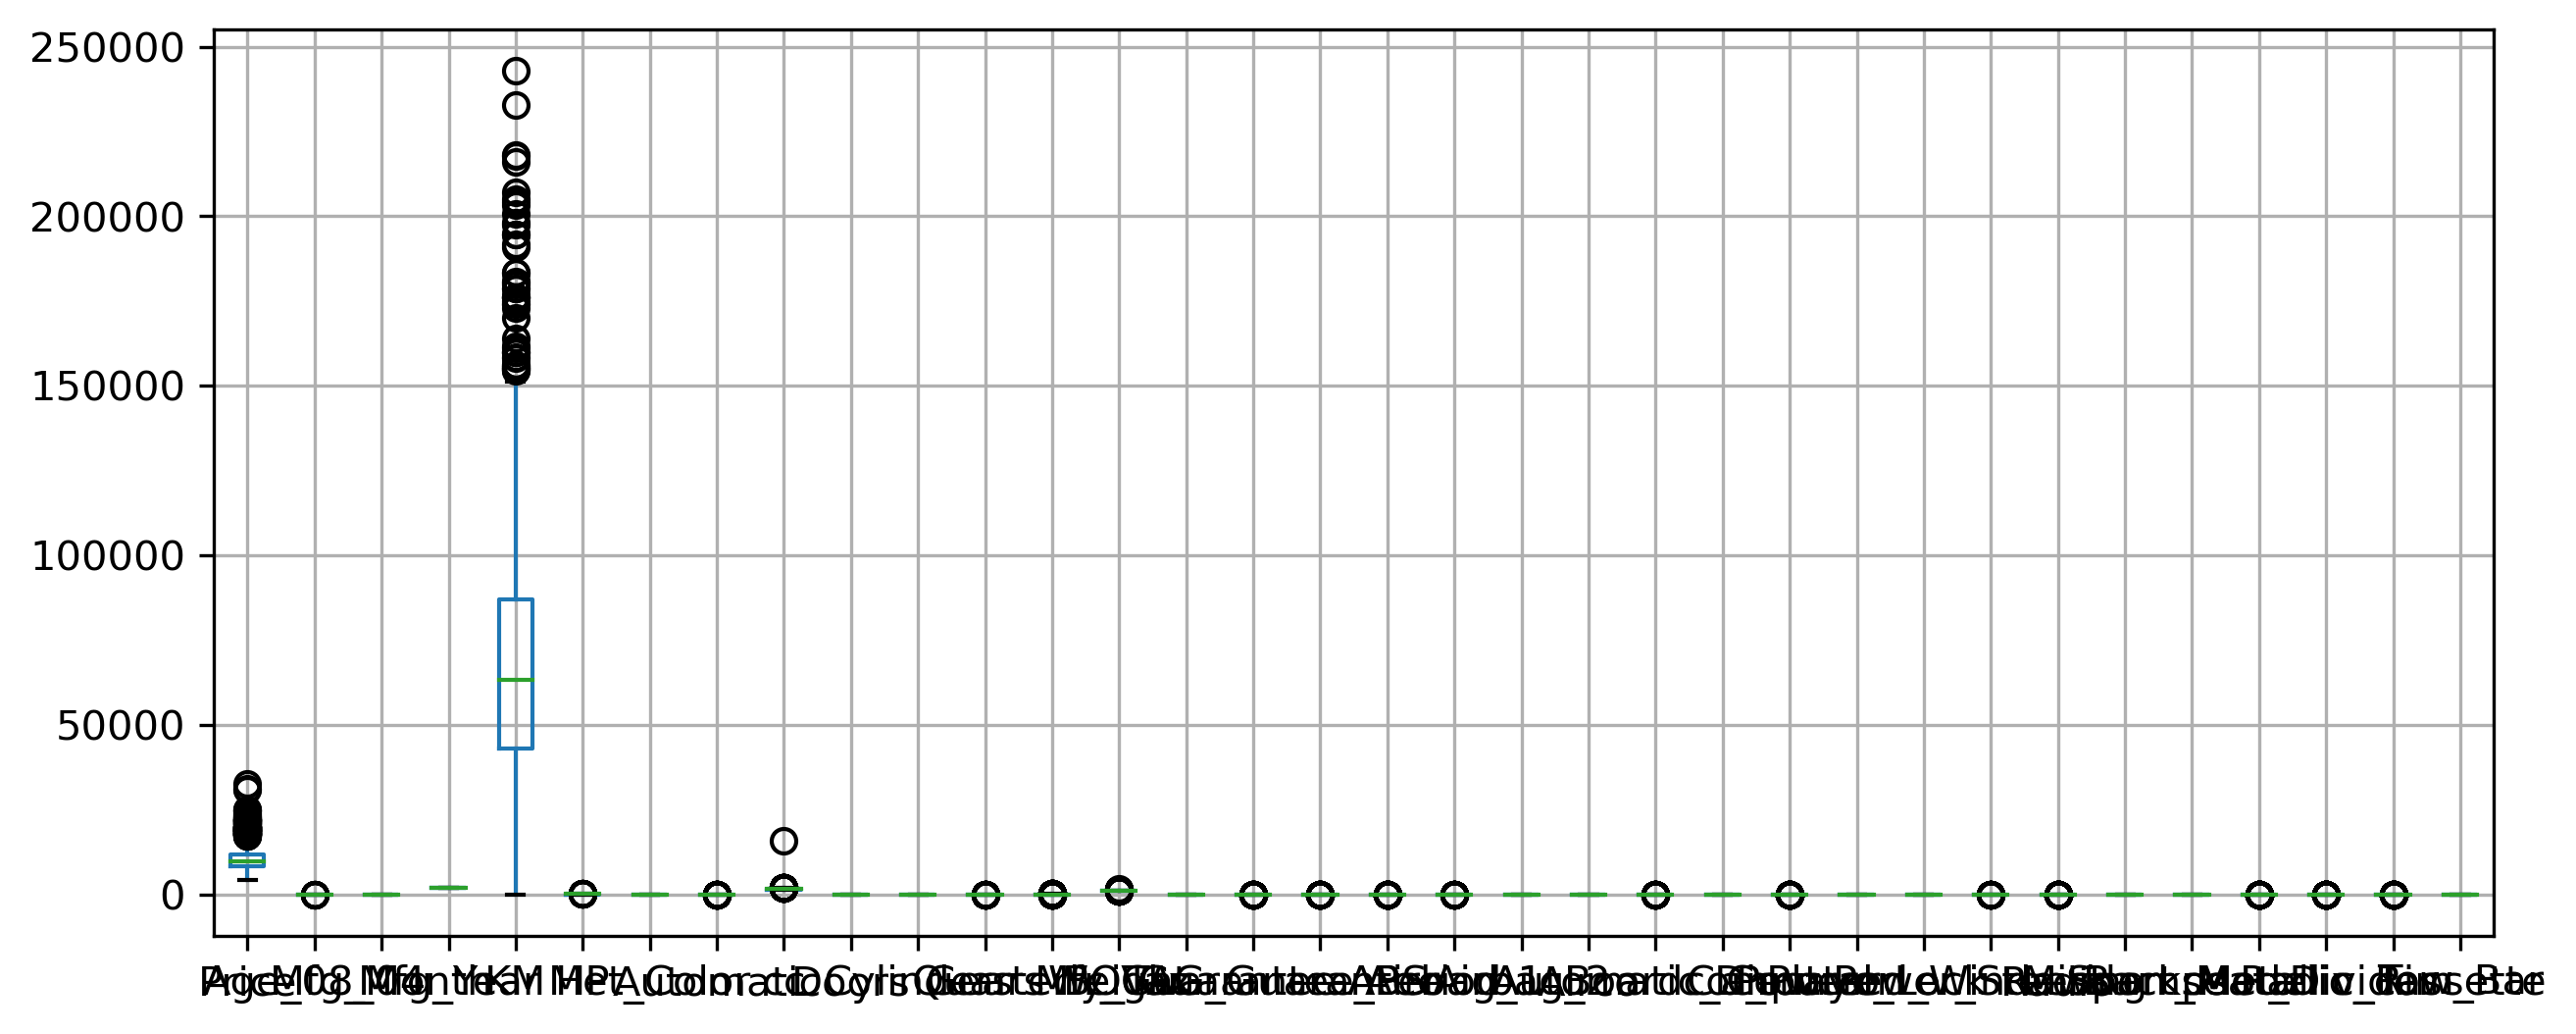

In [56]:
df.boxplot()

In [57]:
df_columns = df.columns
df_columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [58]:
df_data = df.select_dtypes(include='number')
df_data

Price  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  Met_Color  Automatic  \
Id                                                                              
1     13500         23         10      2002  46986   90          1          0   
2     13750         23         10      2002  72937   90          1          0   
3     13950         24          9      2002  41711   90          1          0   
4     14950         26          7      2002  48000   90          0          0   
5     13750         30          3      2002  38500   90          0          0   
...     ...        ...        ...       ...    ...  ...        ...        ...   
1438   7500         69         12      1998  20544   86          1          0   
1439  10845         72          9      1998  19000   86          0          0   
1440   8500         71         10      1998  17016   86          0          0   
1441   7250         70         11      1998  16916   86          1          0   
1442   6950         76          5      1998      1  110          0          0   

        cc  Doors  ...  Central_Lock  Powered_Windows  Power_Steering  Radio  \
Id                 ...                                                         
1     2000      3  ...             1                1               1      0   
2     2000      3  ...             1                0               1      0   
3     2000      3  ...             0                0               1      0   
4     2000      3  ...             0                0               1      0   
5     2000      3  ...             1                1               1      0   
...    ...    ...  ...           ...              ...             ...    ...   
1438  1300      3  ...             1                1               1      0   
1439  1300      3  ...             0                0               1      0   
1440  1300      3  ...             0                0               1      0   
1441  1300      3  ...             0                0               0      0   
1442  1600      5  ...             0                0               1      0   

      Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  \
Id                                                                             
1             0            0                 1             0               0   
2             0            0                 1             0               0   
3             0            0                 1             0               0   
4             0            0                 1             0               0   
5             1            0                 1             0               0   
...         ...          ...               ...           ...             ...   
1438          1            1                 1             0               0   
1439          0            1                 1             0               0   
1440          0            0                 1             0               0   
1441          0            0                 1             0               0   
1442          0            0                 0             0               0   

      Tow_Bar  
Id             
1           0  
2           0  
3           0  
4           0  
5           0  
...       ...  
1438        0  
1439        0  
1440        0  
1441        0  
1442        0  

[1436 rows x 34 columns]

In [59]:
def outlier_detection(data, cols):
    
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df_data[col] = np.where(df_data[col] > upper, upper, np.where(df_data[col] < lower, lower,df_data[col]))

In [60]:
outlier_detection(df_data,df_data.columns)

<Axes: >

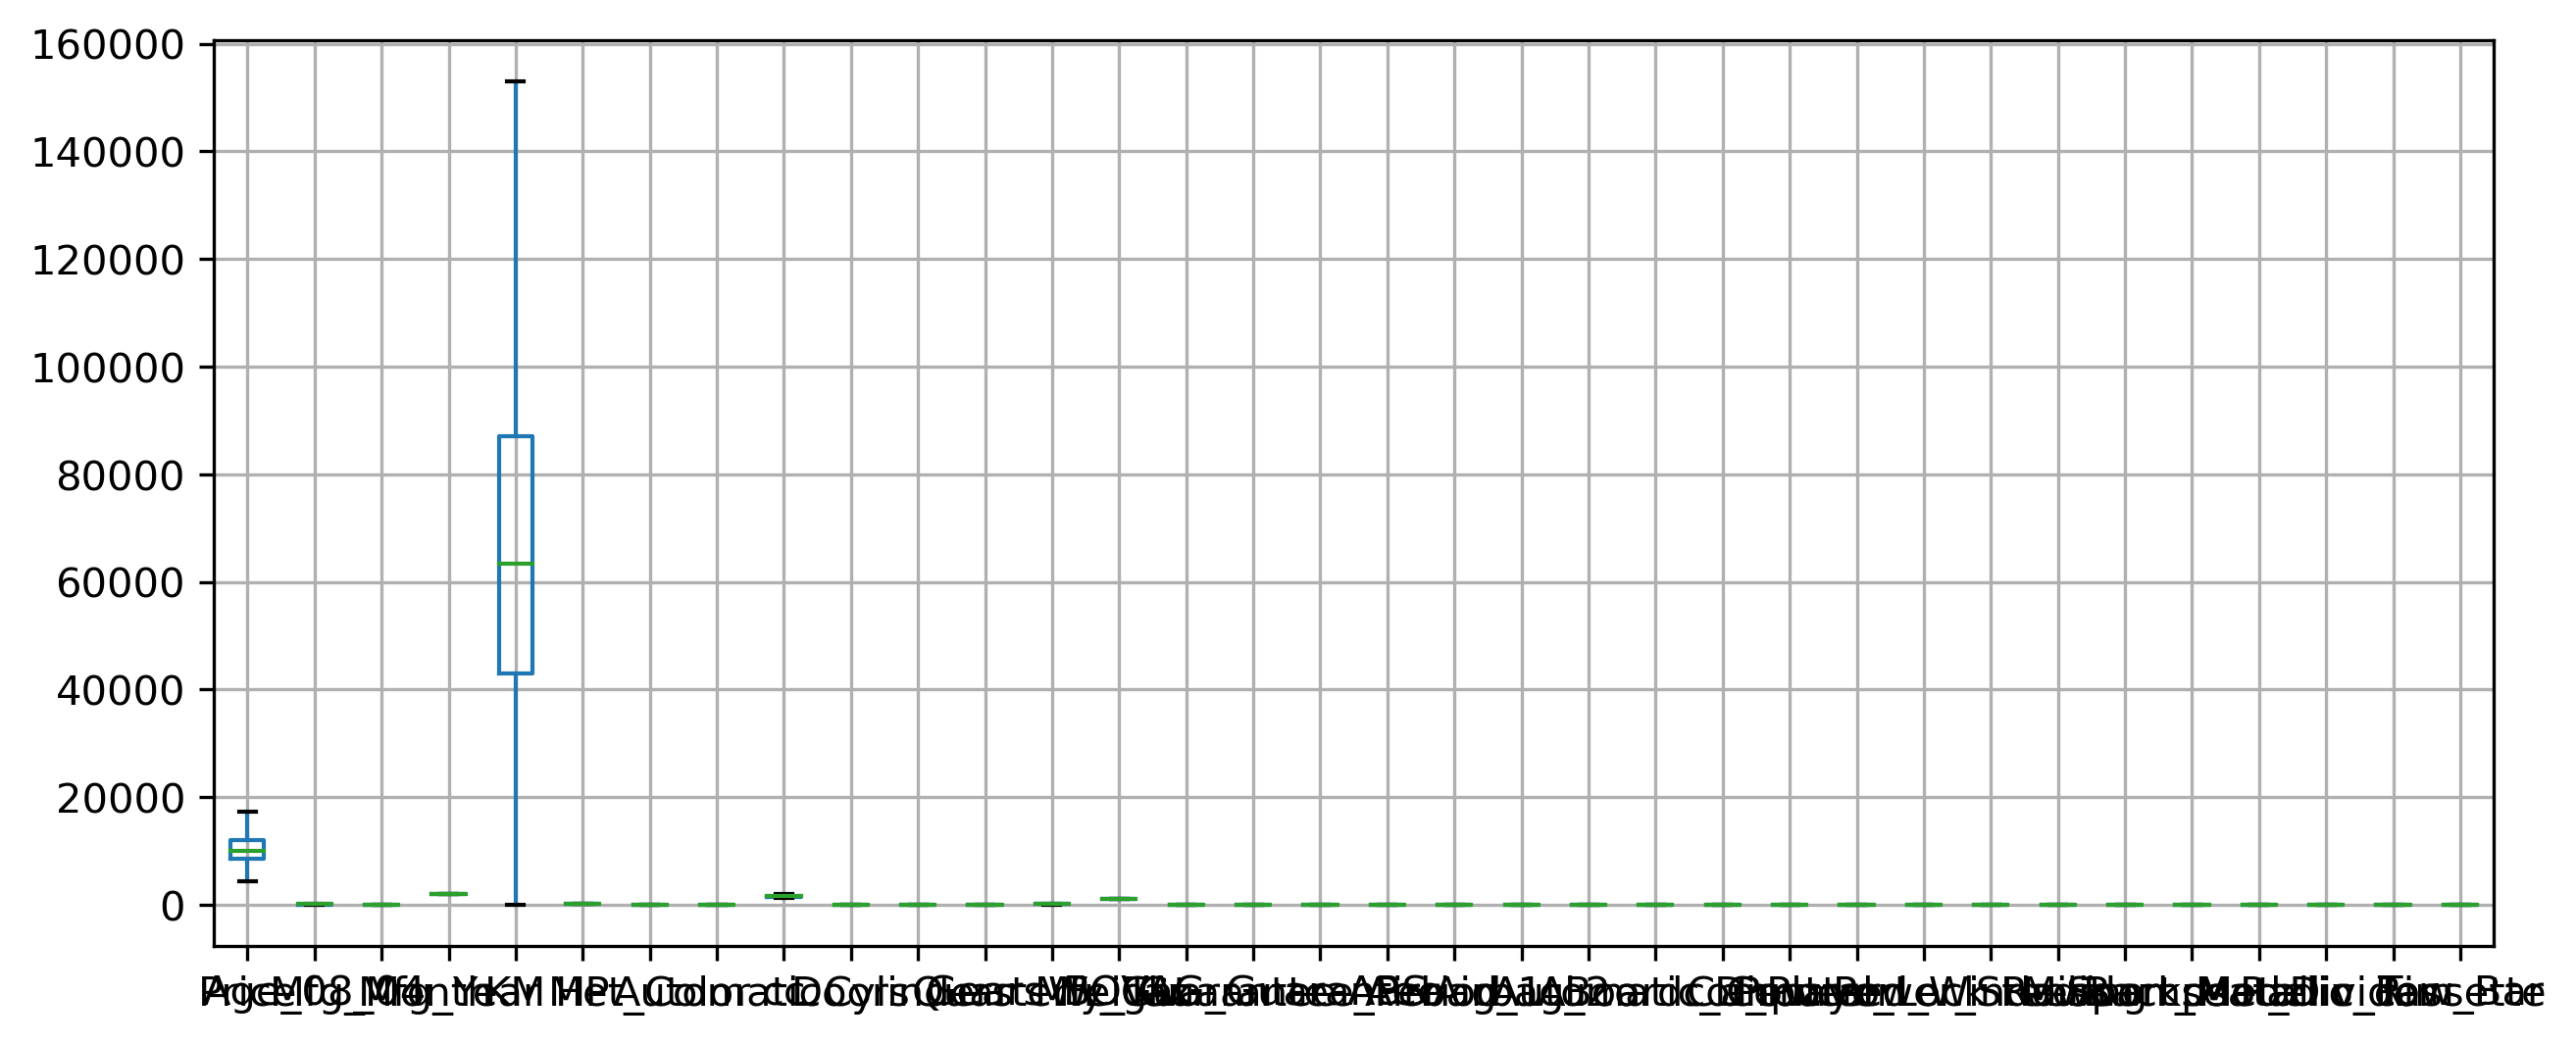

In [61]:
df_data.boxplot()

In [62]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
Id                                                                           
1     13500         23  46986   90  2000      3      5            210    1165
2     13750         23  72937   90  2000      3      5            210    1165
3     13950         24  41711   90  2000      3      5            210    1165
4     14950         26  48000   90  2000      3      5            210    1165
5     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1438   7500         69  20544   86  1300      3      5             69    1025
1439  10845         72  19000   86  1300      3      5             69    1015
1440   8500         71  17016   86  1300      3      5             69    1015
1441   7250         70  16916   86  1300      3      5             69    1015
1442   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [63]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 112.2 KB


In [65]:
df[df.duplicated()]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
Id                                                                          
115  24950          8  13253  116  2000      5      5            234    1320

In [66]:
df = df.drop_duplicates()

In [67]:
df.duplicated().sum()

0

In [68]:
df.rename({"Age_08_04" : "Age","Quarterly_Tax" : "QT","Weight":"WT"}, axis='columns',inplace=True)
df.head()

Price  Age     KM  HP    cc  Doors  Gears   QT    WT
Id                                                      
1   13500   23  46986  90  2000      3      5  210  1165
2   13750   23  72937  90  2000      3      5  210  1165
3   13950   24  41711  90  2000      3      5  210  1165
4   14950   26  48000  90  2000      3      5  210  1165
5   13750   30  38500  90  2000      3      5  210  1170

In [69]:
df.corr()

Price       Age        KM        HP        cc     Doors     Gears  \
Price  1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age   -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM    -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP     0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
cc     0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors  0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears  0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT     0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
WT     0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

             QT        WT  
Price  0.211508  0.575869  
Age   -0.193319 -0.466484  
KM     0.283312 -0.023969  
HP    -0.302287  0.087143  
cc     0.305982  0.335077  
Doors  0.107353  0.301734  
Gears -0.005125  0.021238  
QT     1.000000  0.621988  
WT     0.621988  1.000000

<Axes: >

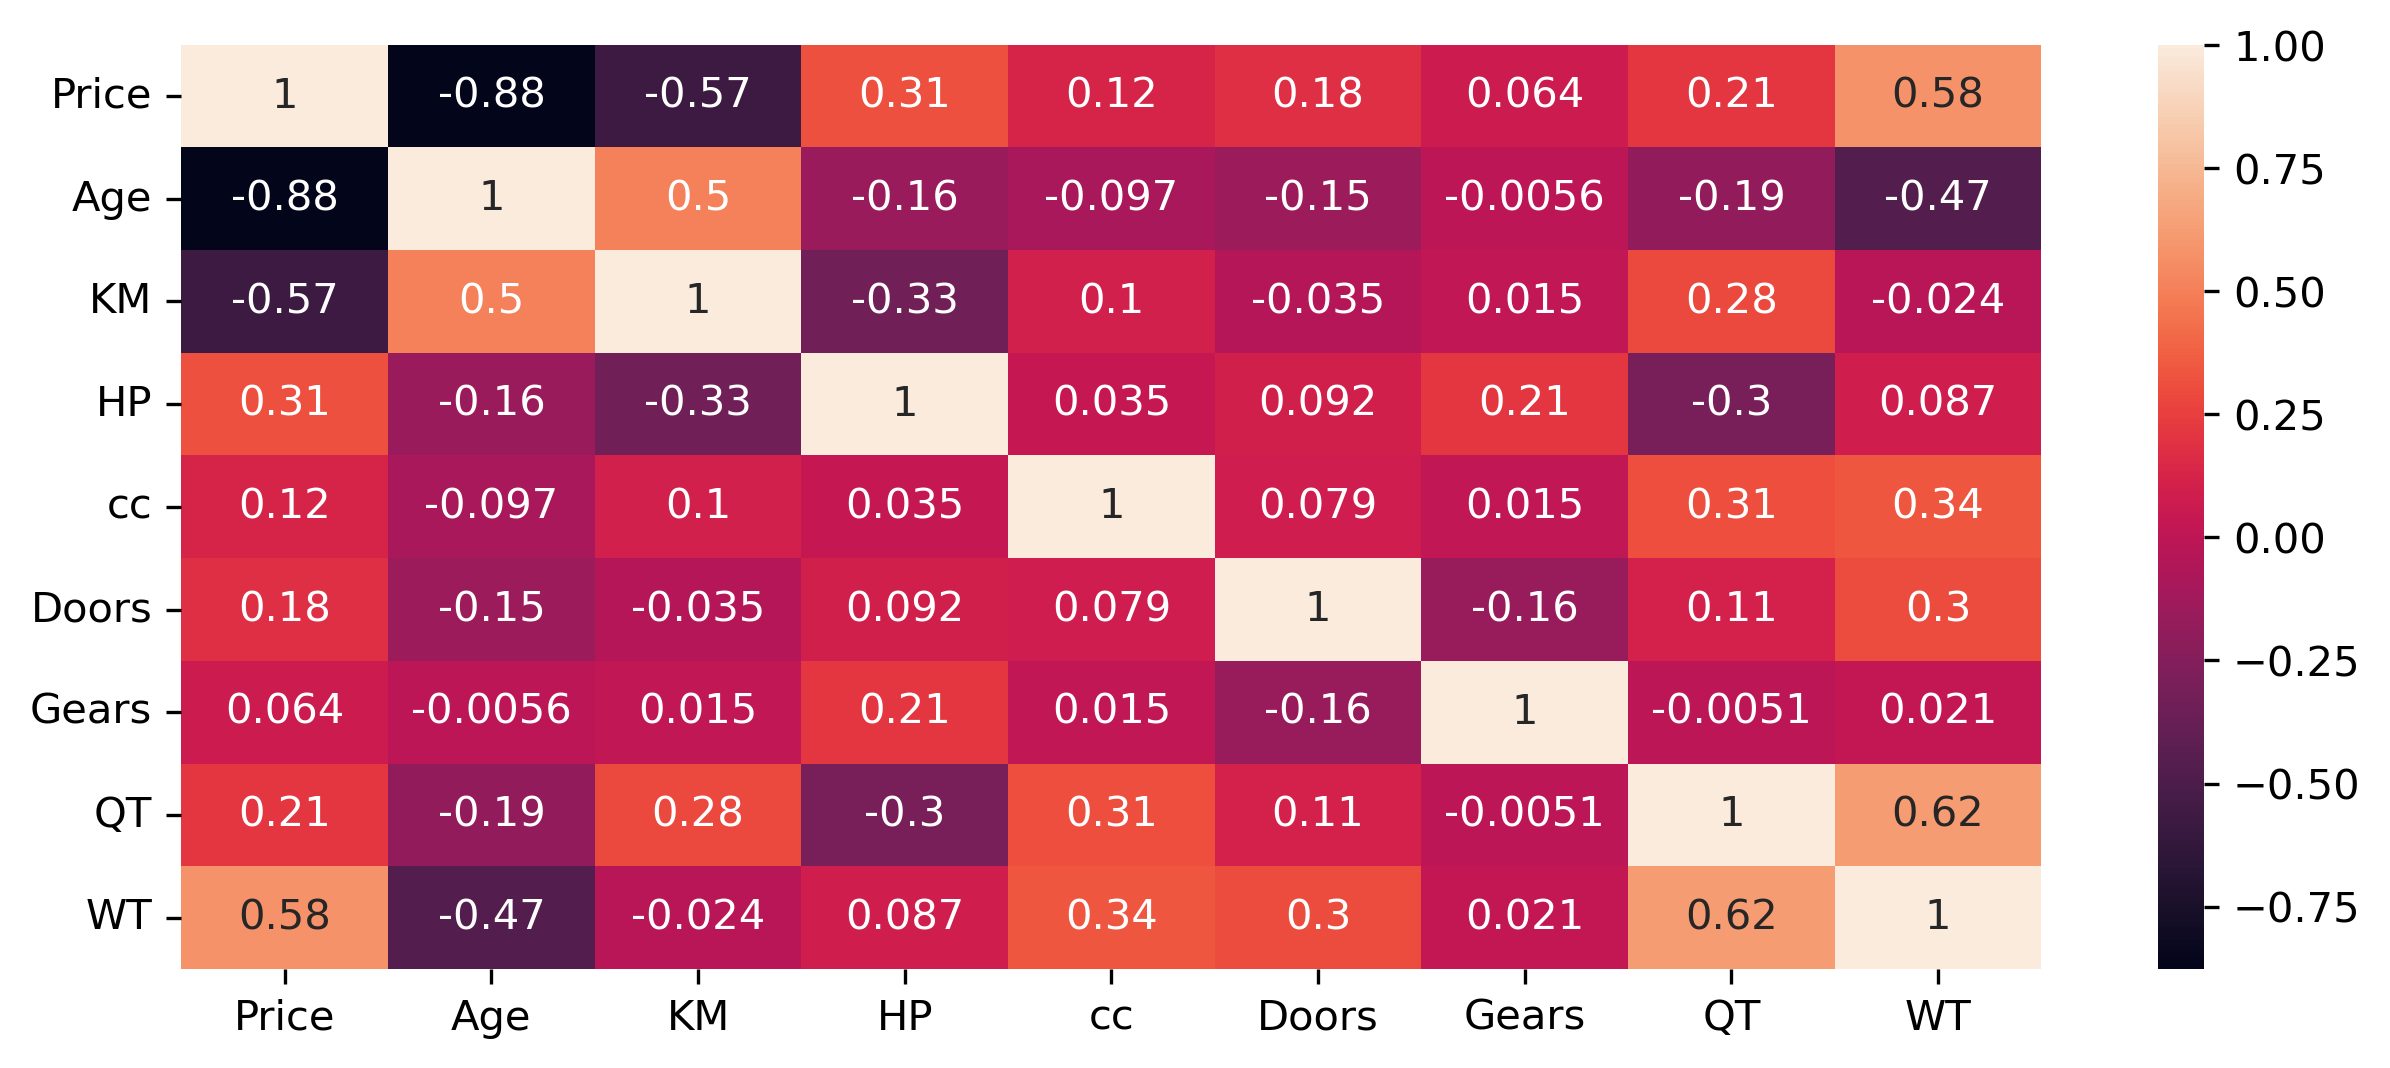

In [70]:
sns.heatmap(df.corr(),annot=True)

In [71]:
#sns.pairplot(df)

In [72]:
import statsmodels.formula.api as smf

In [73]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'WT'], dtype='object')

# Model building

In [74]:

model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=df).fit()
model

In [75]:
model.rsquared

0.8625200256946999

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:24:37   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
data = df.drop(columns='Price')
data

Age     KM   HP    cc  Doors  Gears   QT    WT
Id                                                  
1      23  46986   90  2000      3      5  210  1165
2      23  72937   90  2000      3      5  210  1165
3      24  41711   90  2000      3      5  210  1165
4      26  48000   90  2000      3      5  210  1165
5      30  38500   90  2000      3      5  210  1170
...   ...    ...  ...   ...    ...    ...  ...   ...
1438   69  20544   86  1300      3      5   69  1025
1439   72  19000   86  1300      3      5   69  1015
1440   71  17016   86  1300      3      5   69  1015
1441   70  16916   86  1300      3      5   69  1015
1442   76      1  110  1600      5      5   19  1114

[1435 rows x 8 columns]

# VIF

In [78]:
vif = pd.DataFrame({'Features':data.columns,
                   'VIF':[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]})  
vif

Features         VIF
0      Age   16.392665
1       KM    7.601207
2       HP   64.894446
3       cc   17.186097
4    Doors   21.856114
5    Gears  439.672599
6       QT   11.021647
7       WT  543.522036

In [79]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+WT',data=data).fit().rsquared  
vif_Age= 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+WT',data=data).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+WT',data=data).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+HP+KM+Doors+Gears+QT+WT',data=data).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+HP+KM+cc+Gears+QT+WT',data=data).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+HP+KM+Doors+cc+QT+WT',data=data).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~Age+HP+KM+Doors+Gears+cc+WT',data=data).fit().rsquared  
vif_QT = 1/(1-rsq_QT)

rsq_WT = smf.ols('WT~Age+HP+KM+Doors+Gears+QT+cc',data=data).fit().rsquared  
vif_WT = 1/(1-rsq_WT)


# Storing vif values in a data frame
df1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','WT'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_WT,]}
Vif_df = pd.DataFrame(df1)  
Vif_df

Variables       VIF
0       Age  1.876236
1        KM  1.757178
2        HP  1.419180
3        cc  1.163470
4     Doors  1.155890
5     Gears  1.098843
6        QT  2.295375
7        WT  2.487180

# Model validation technique

- QQ plot

Text(0.5, 1.0, 'Q-Q Plot')

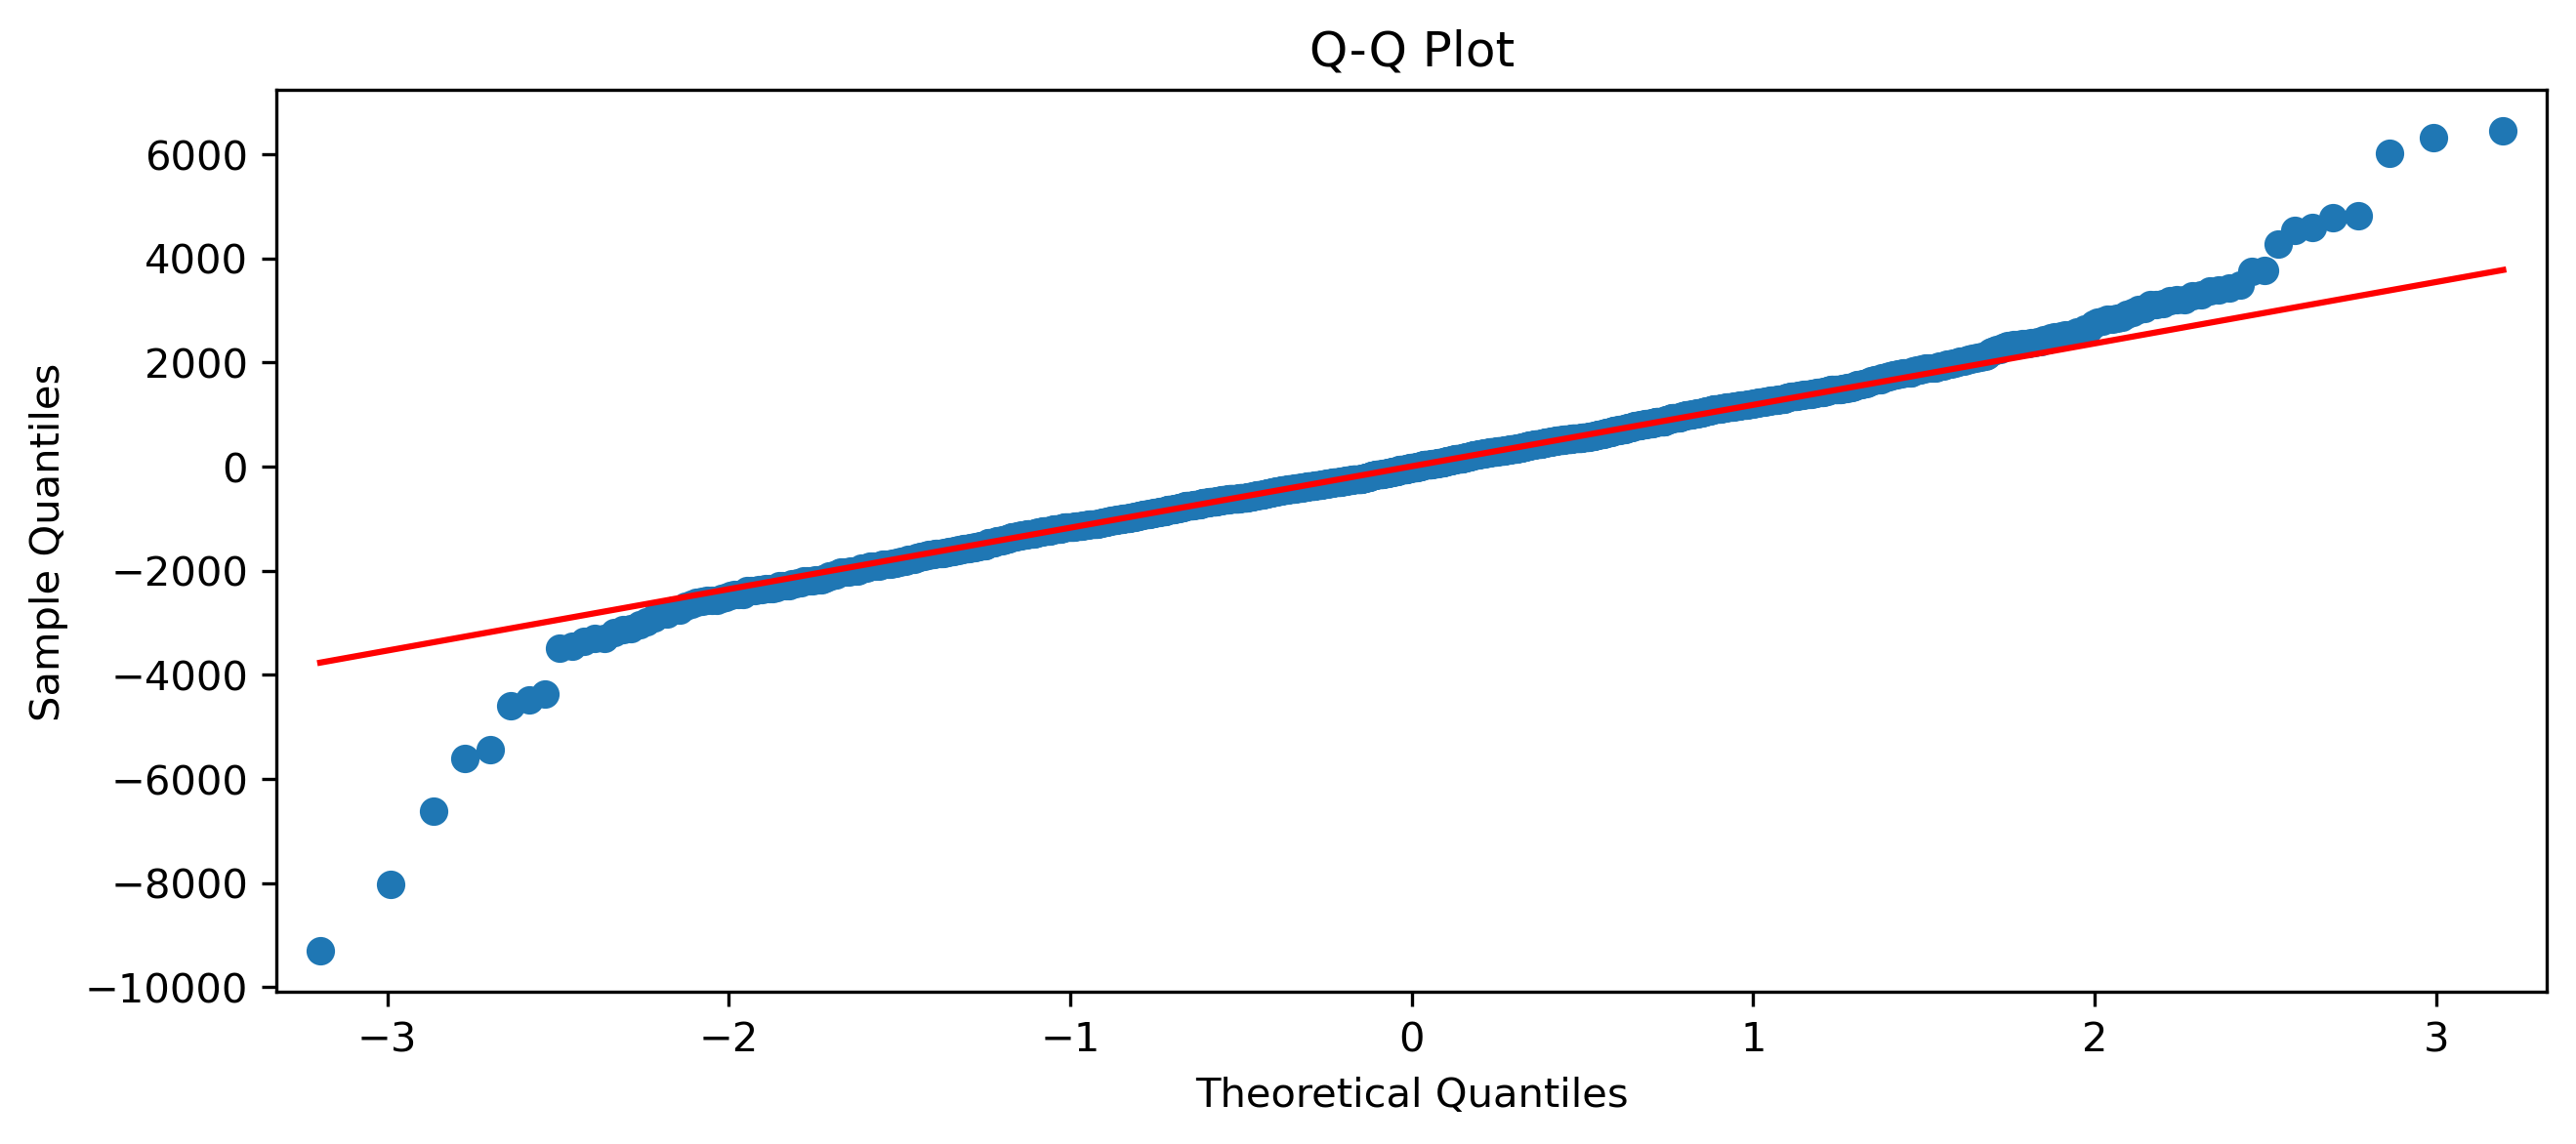

In [80]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot')

In [81]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [82]:
list(np.where(model.resid< -6000))

[array([220, 600, 959], dtype=int64)]

# Residual Analysis

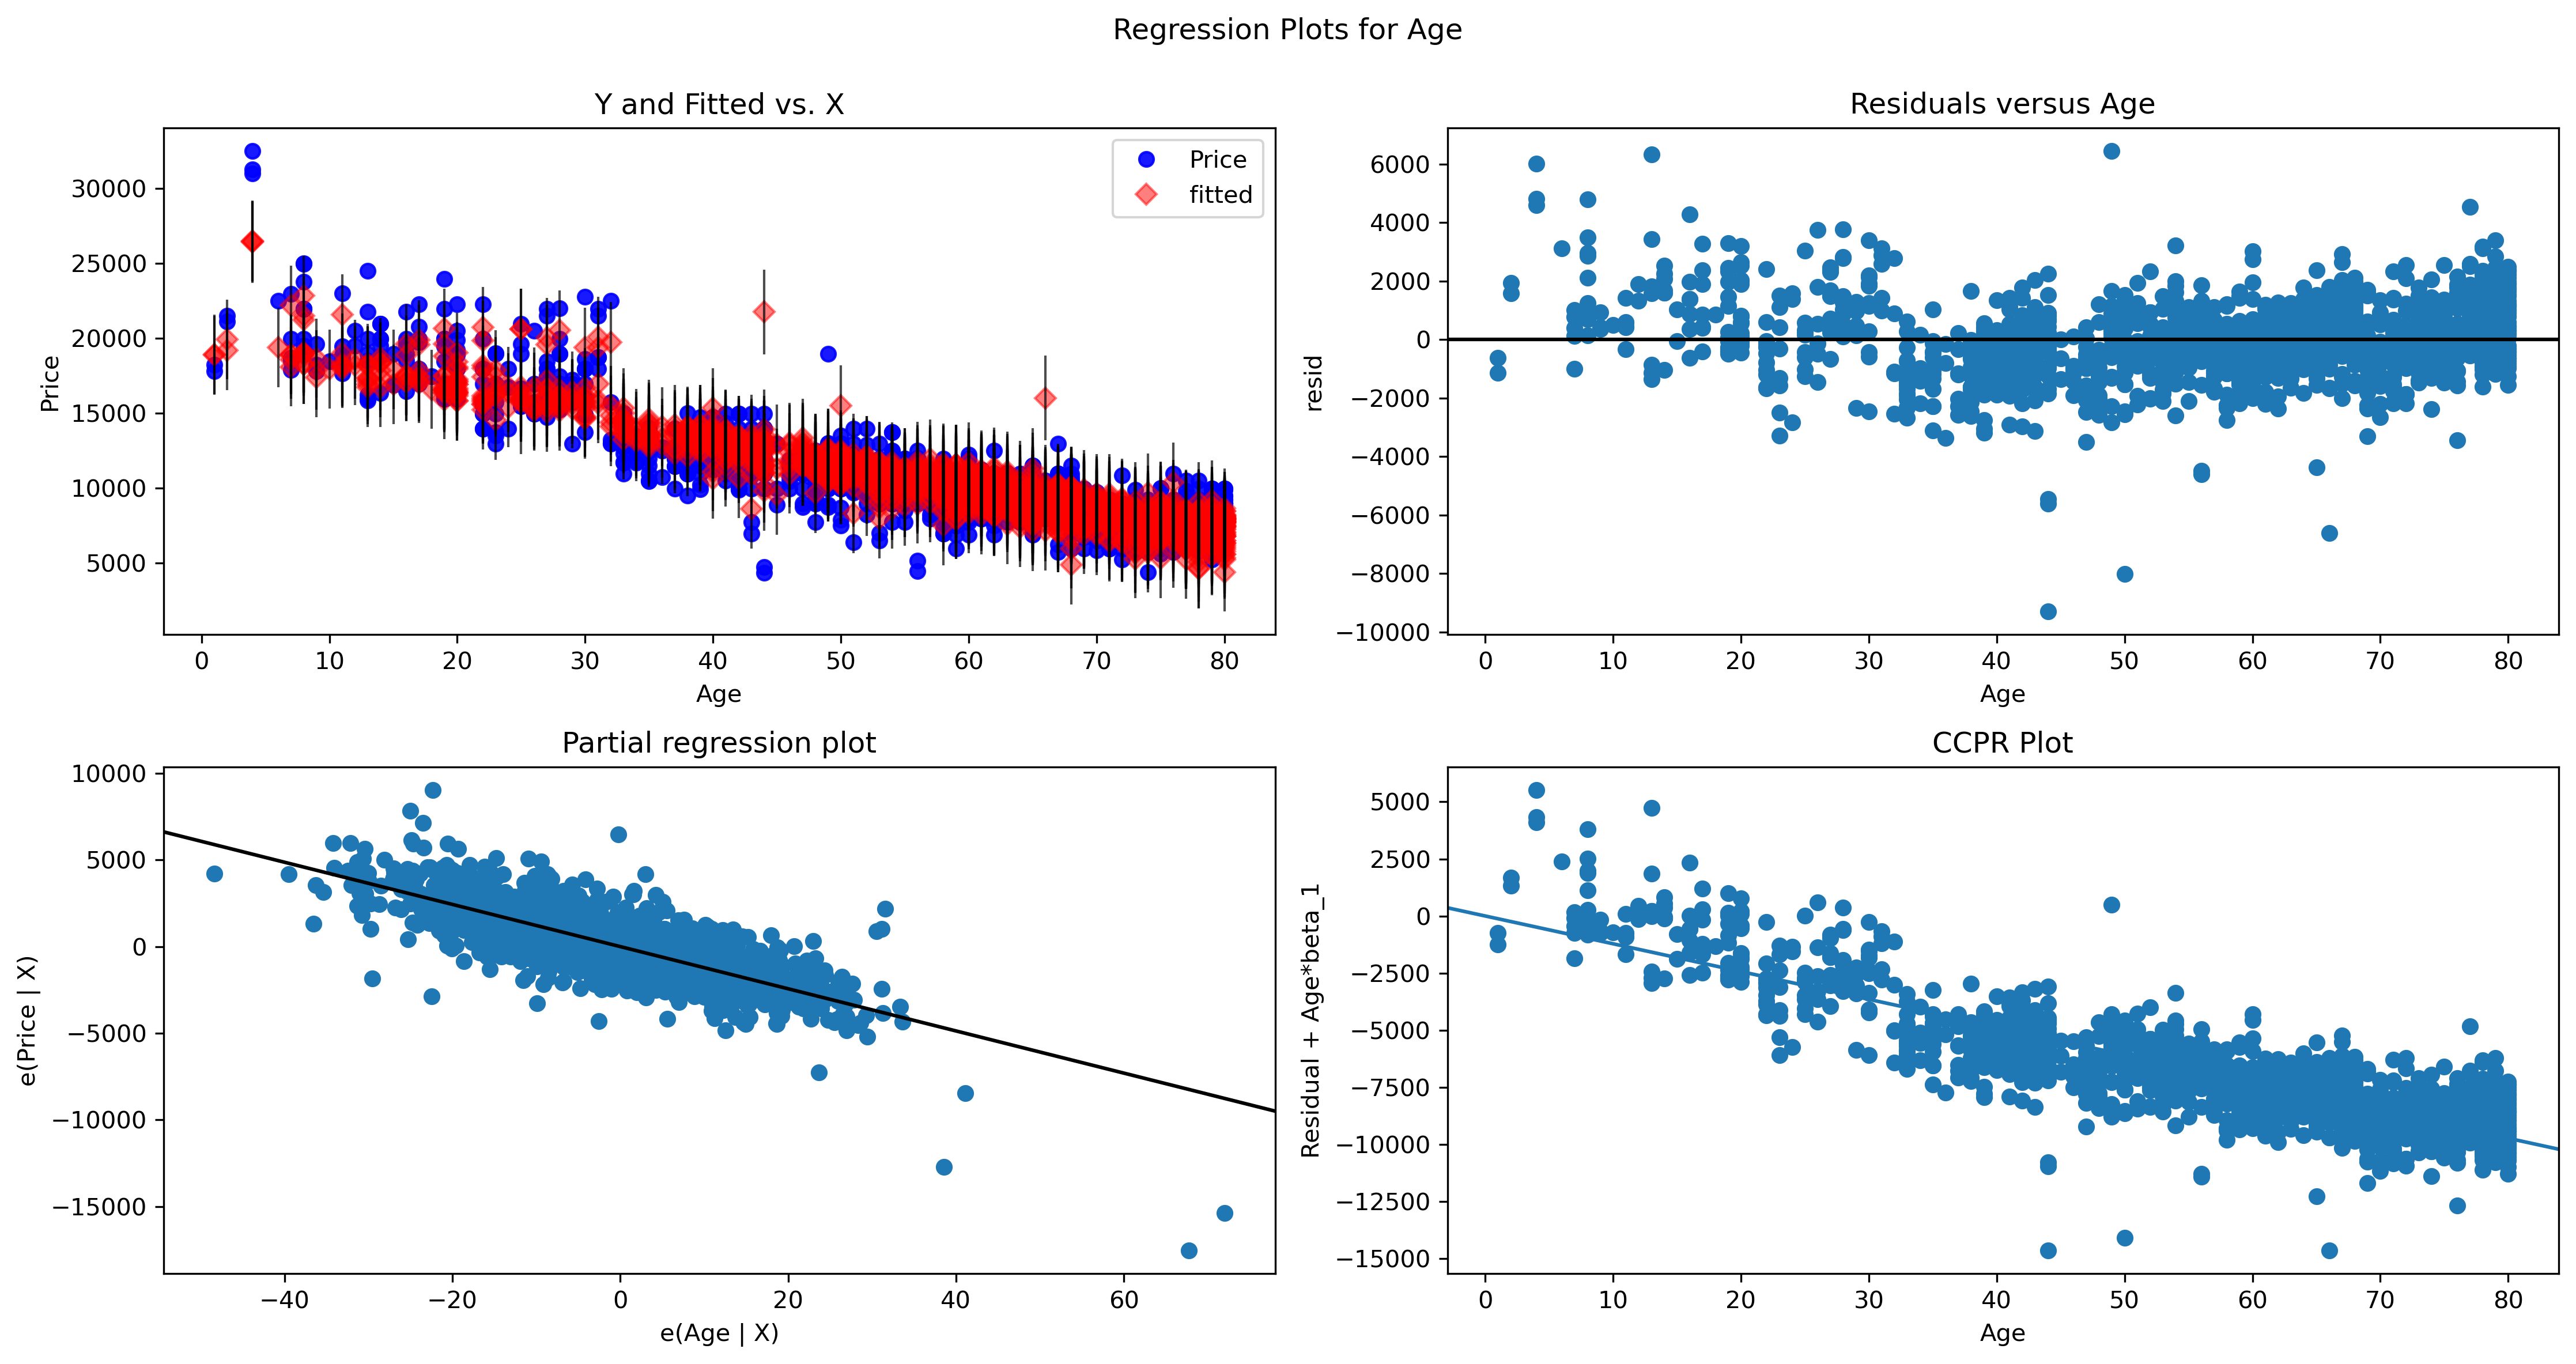

In [83]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

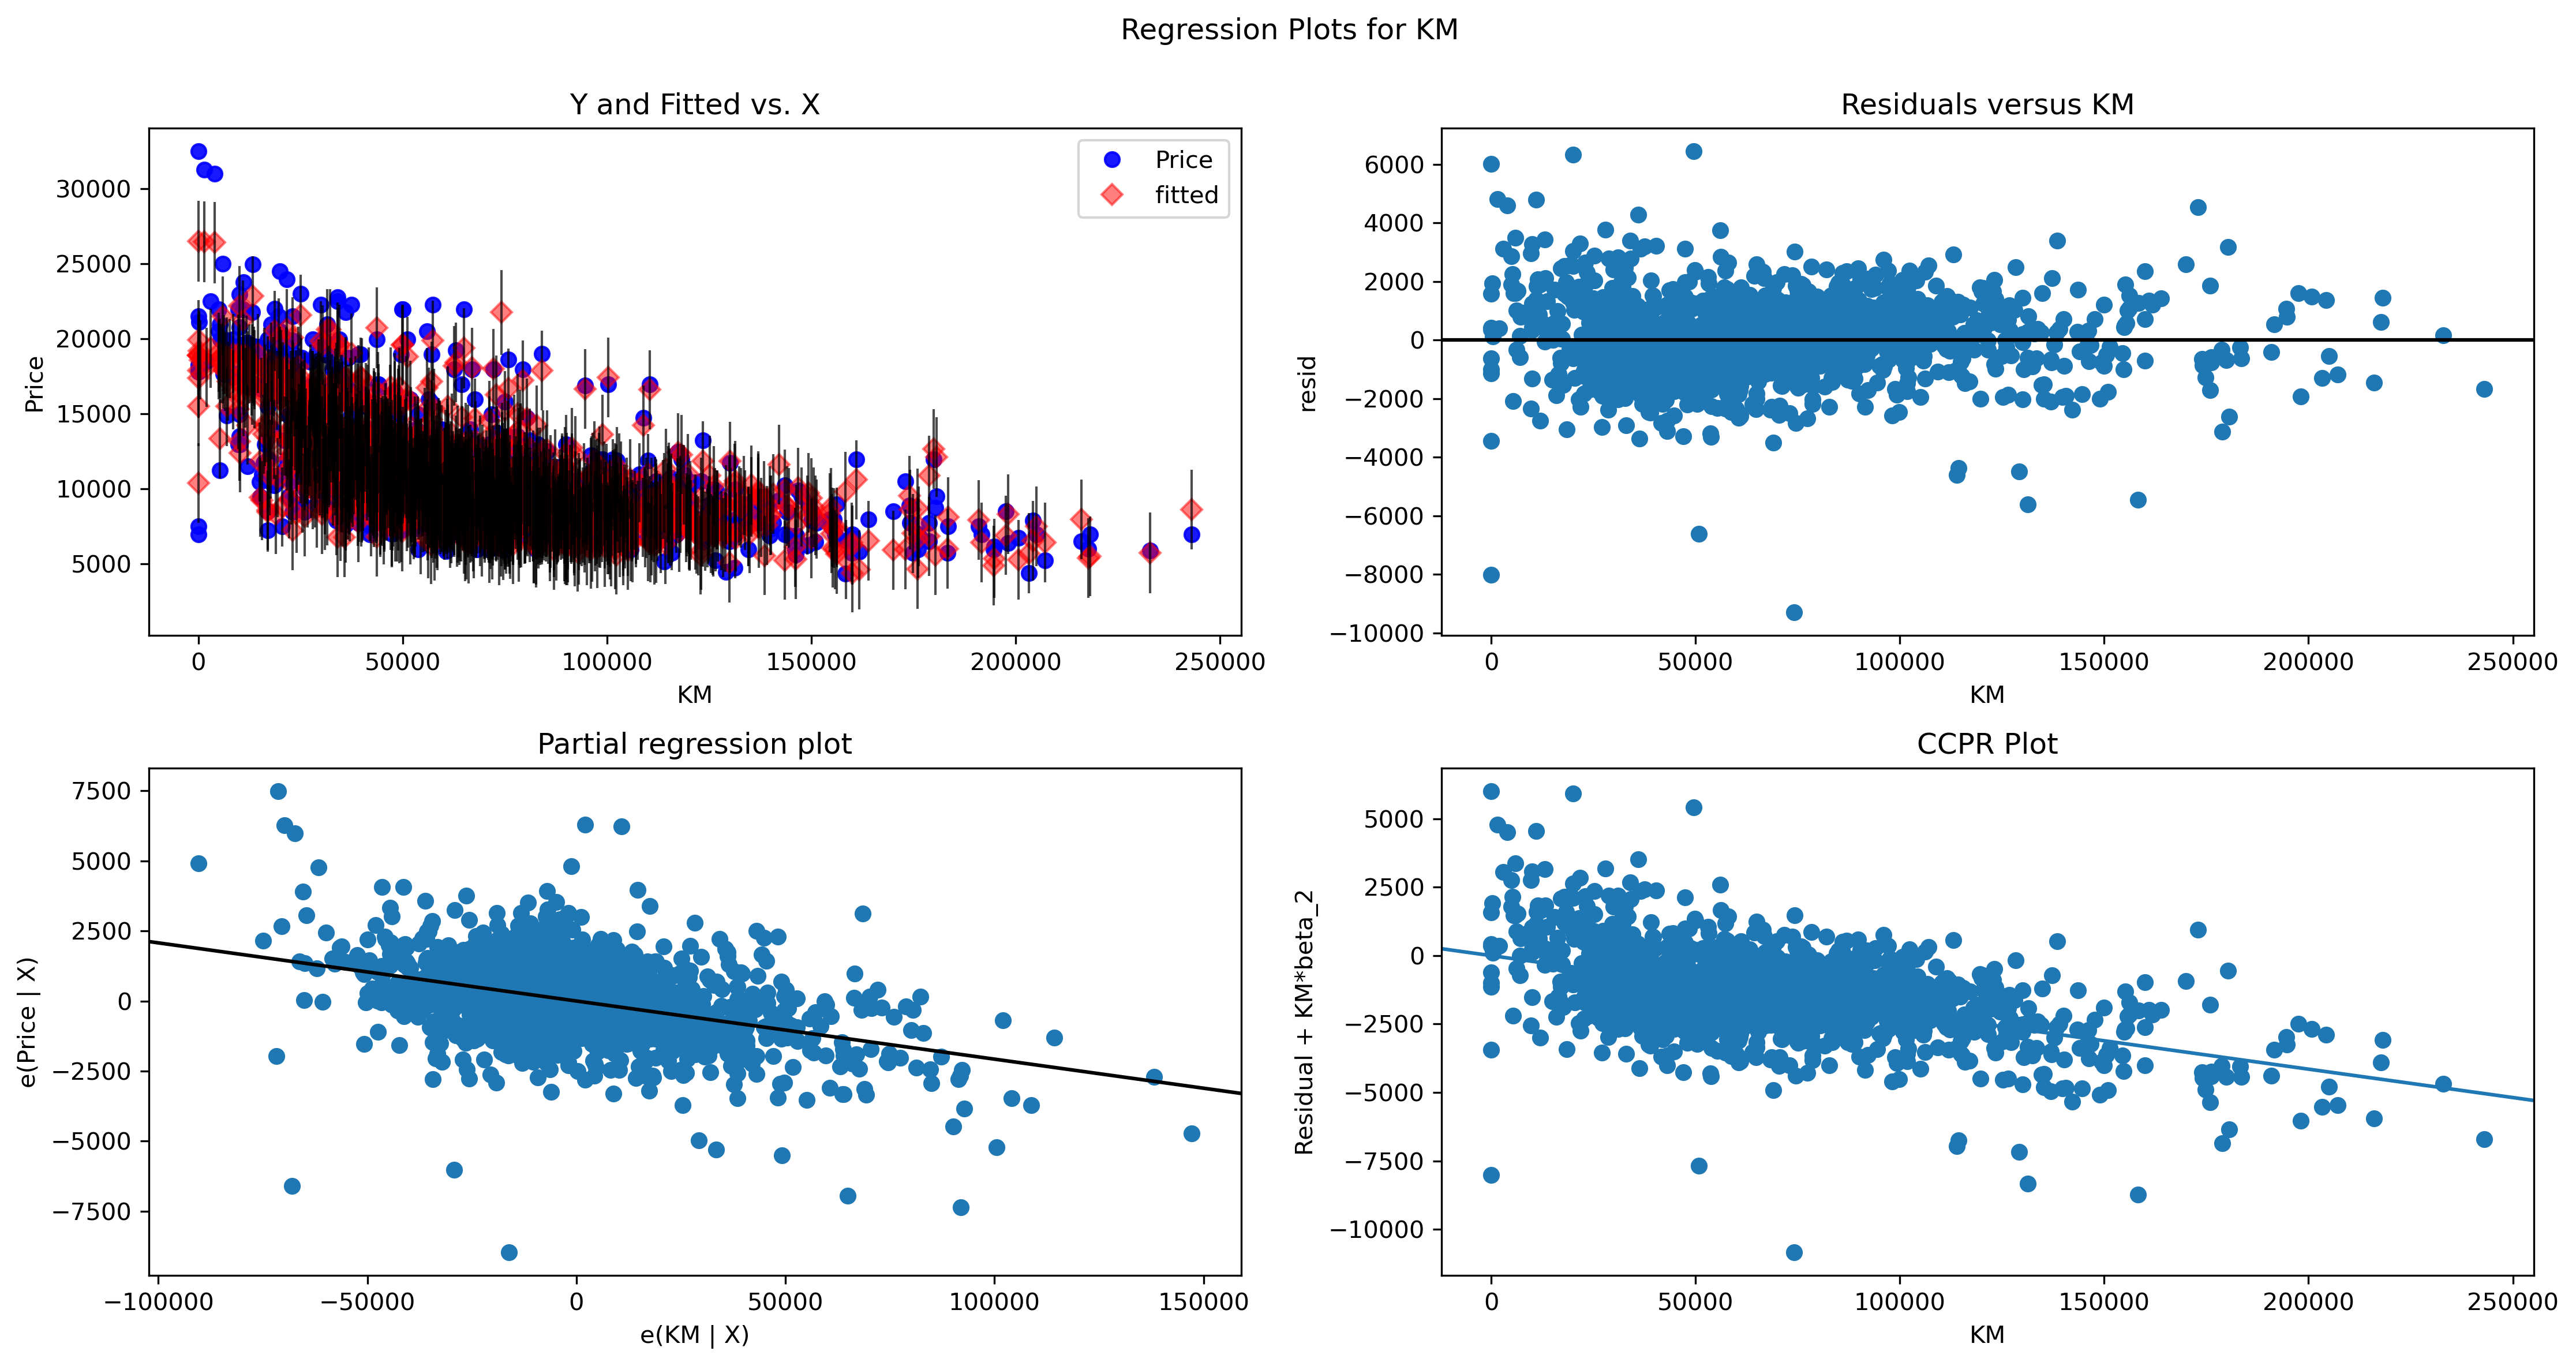

In [84]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

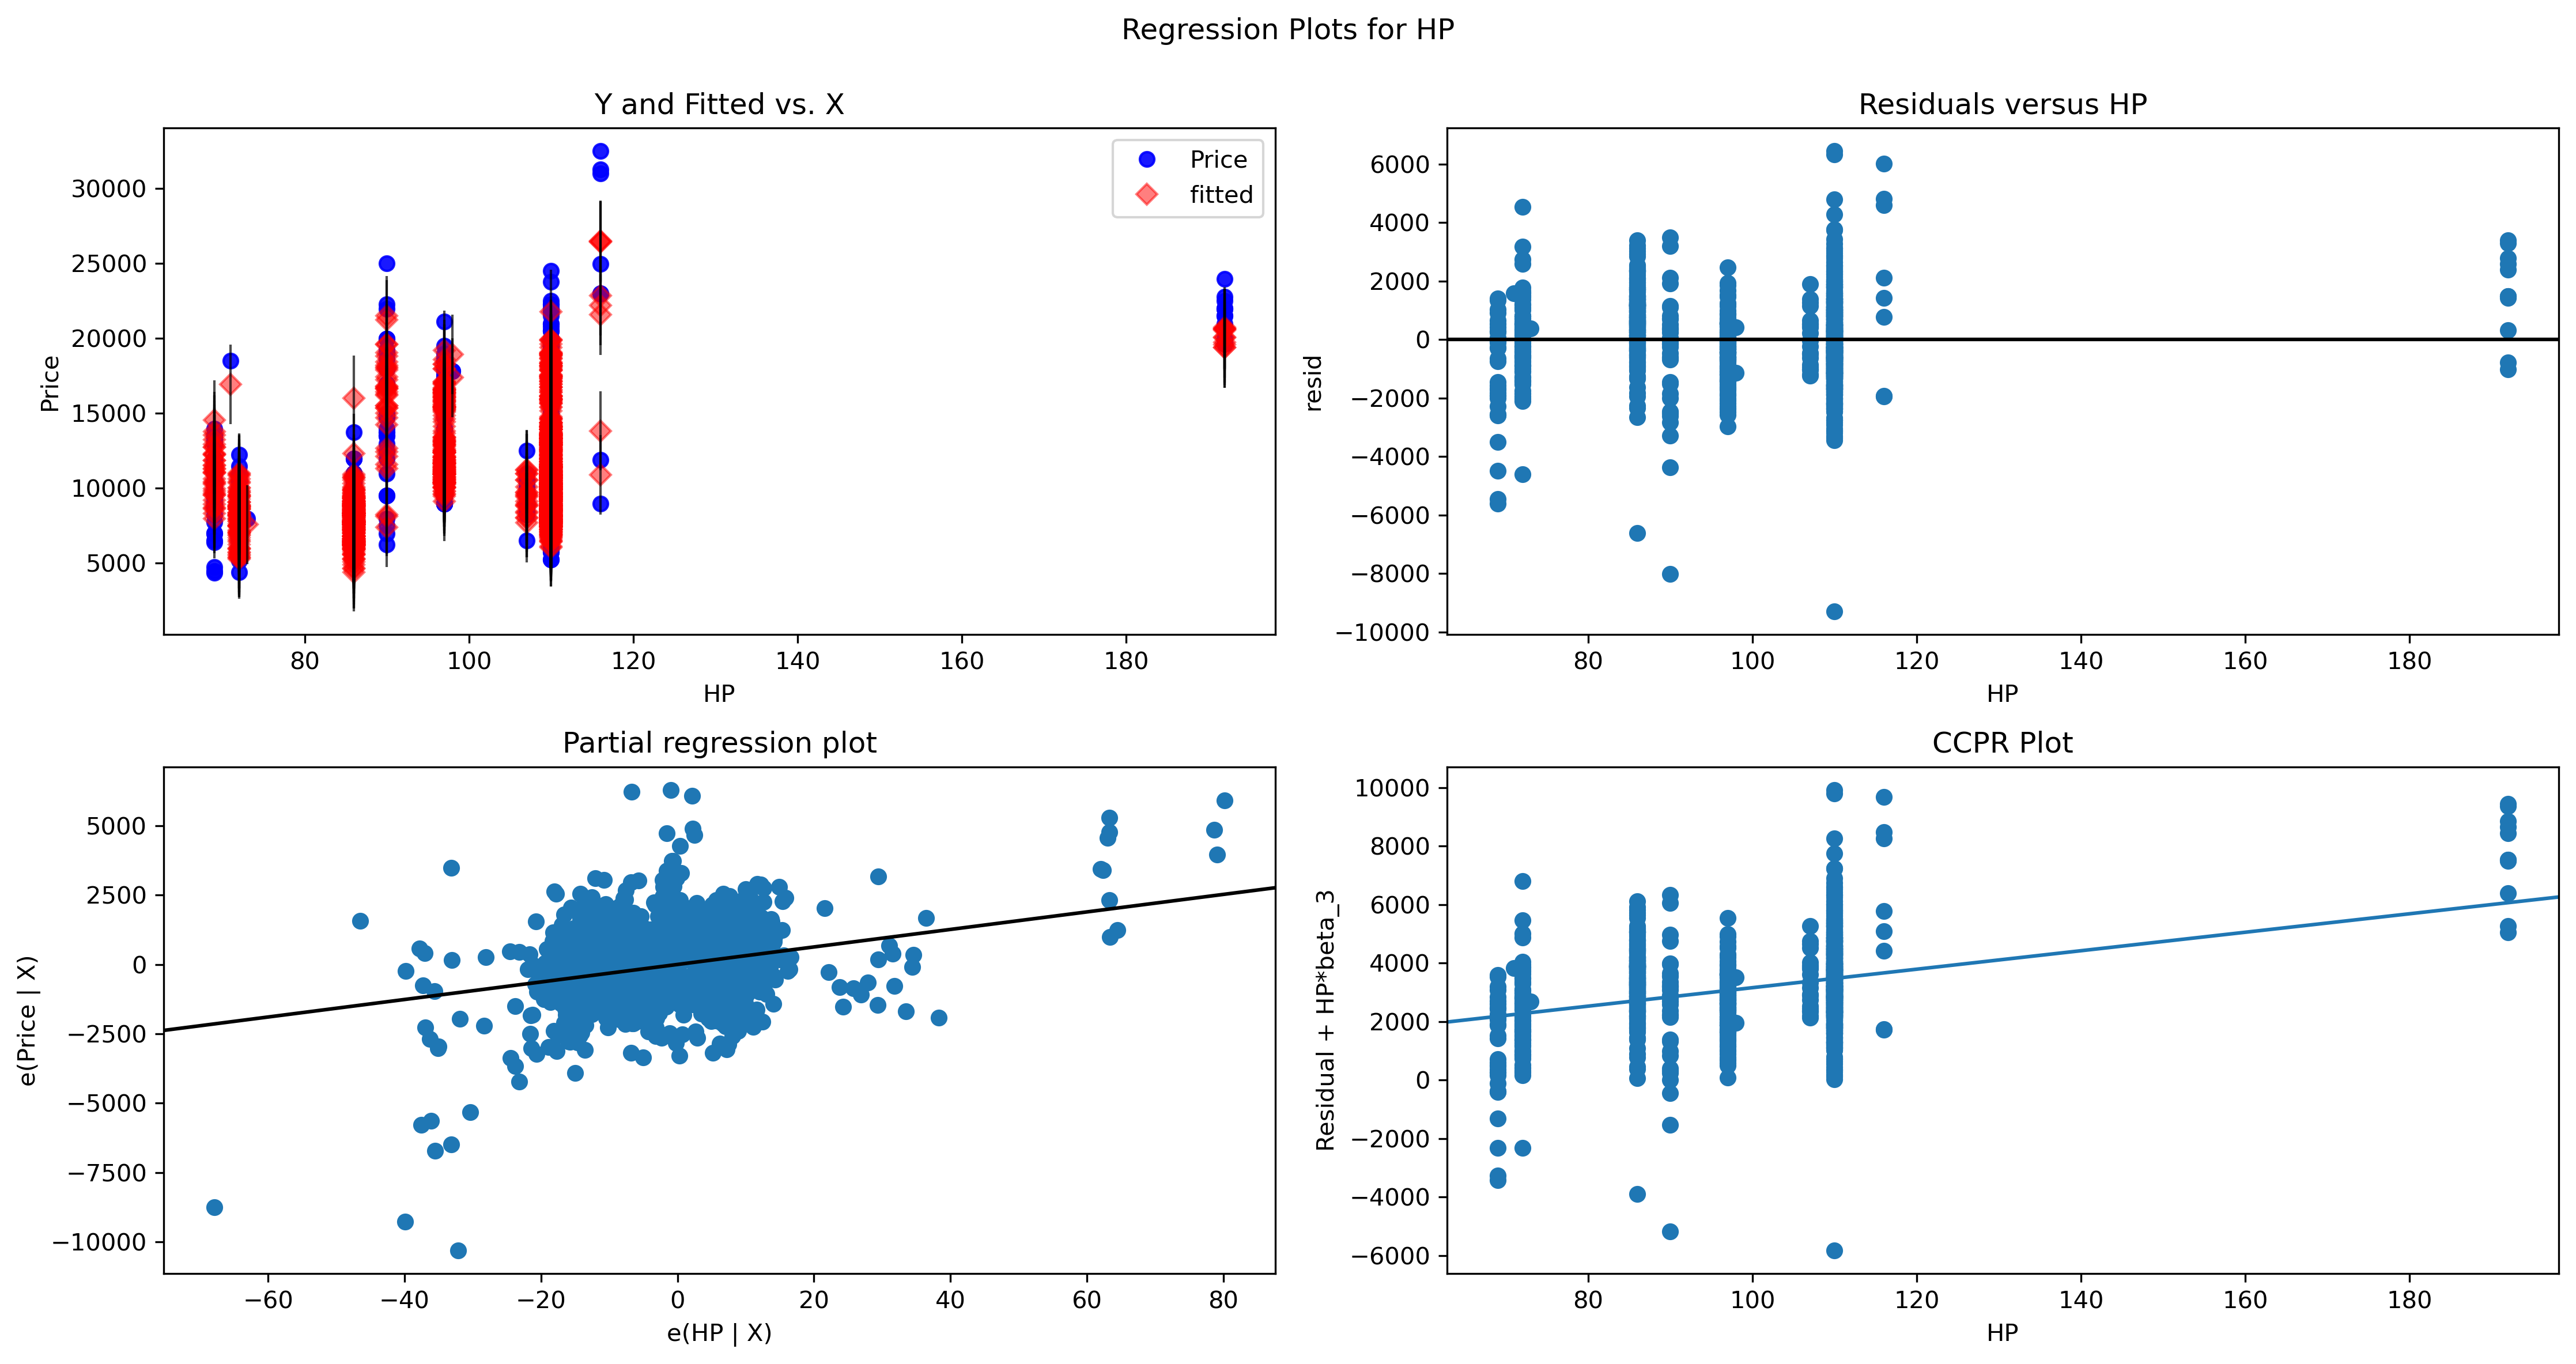

In [85]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

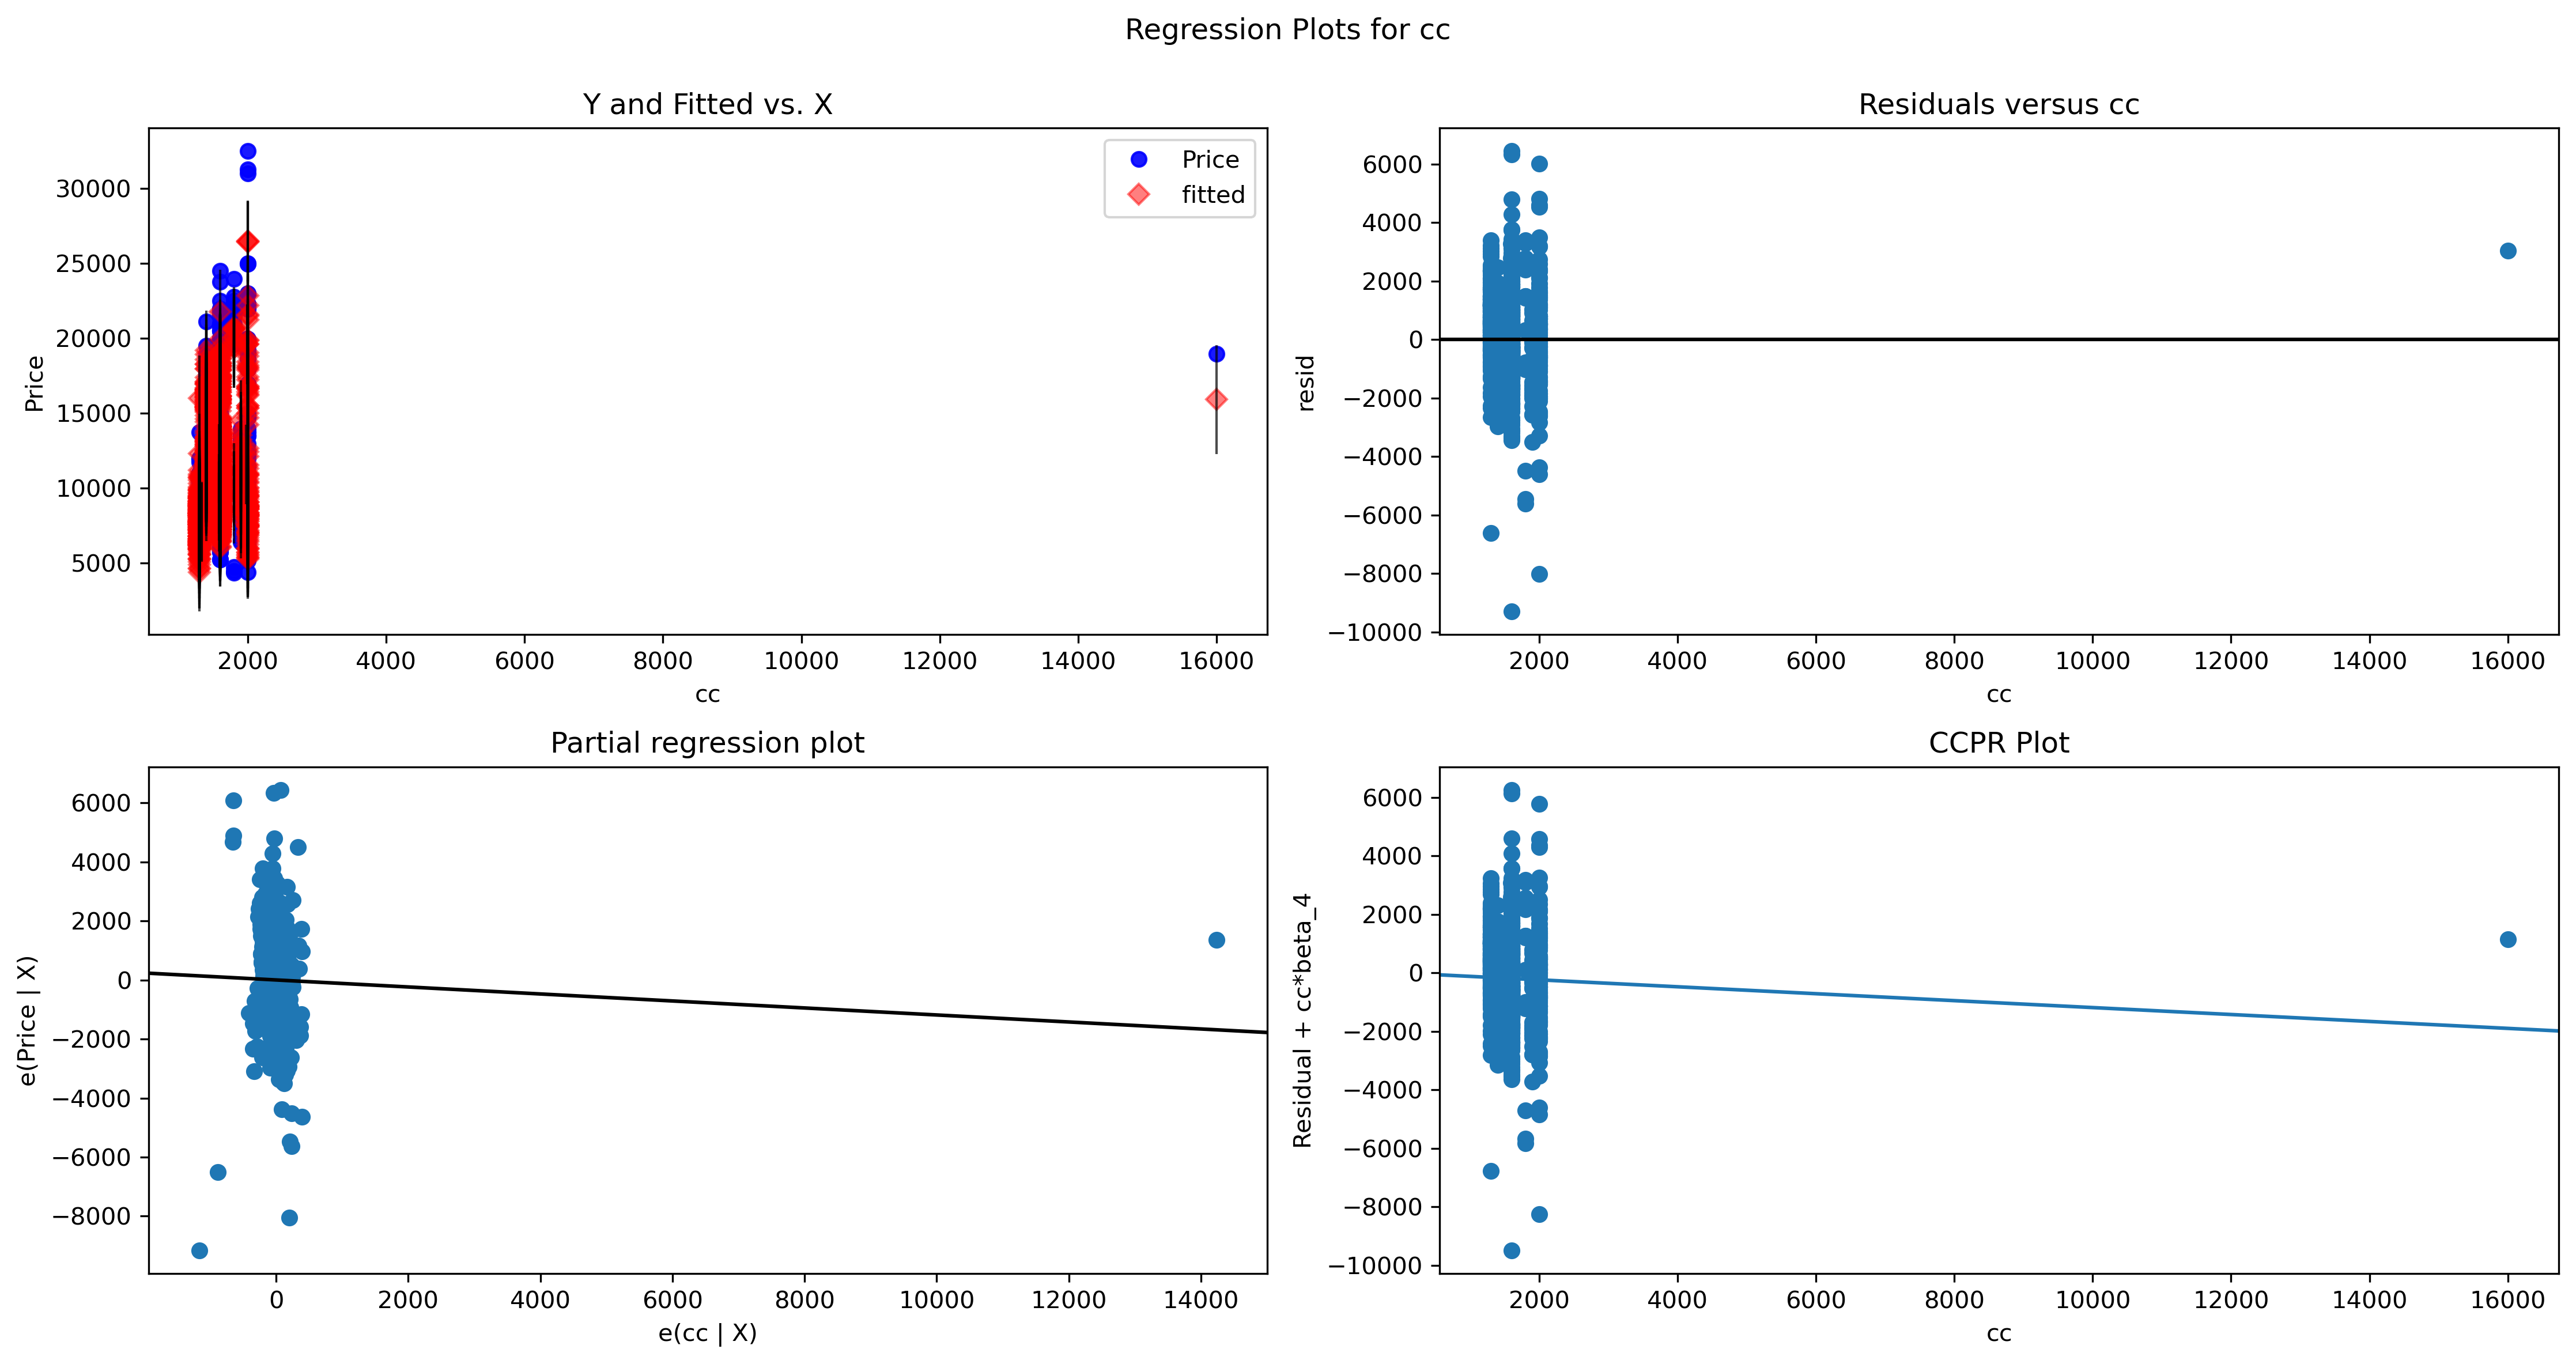

In [86]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

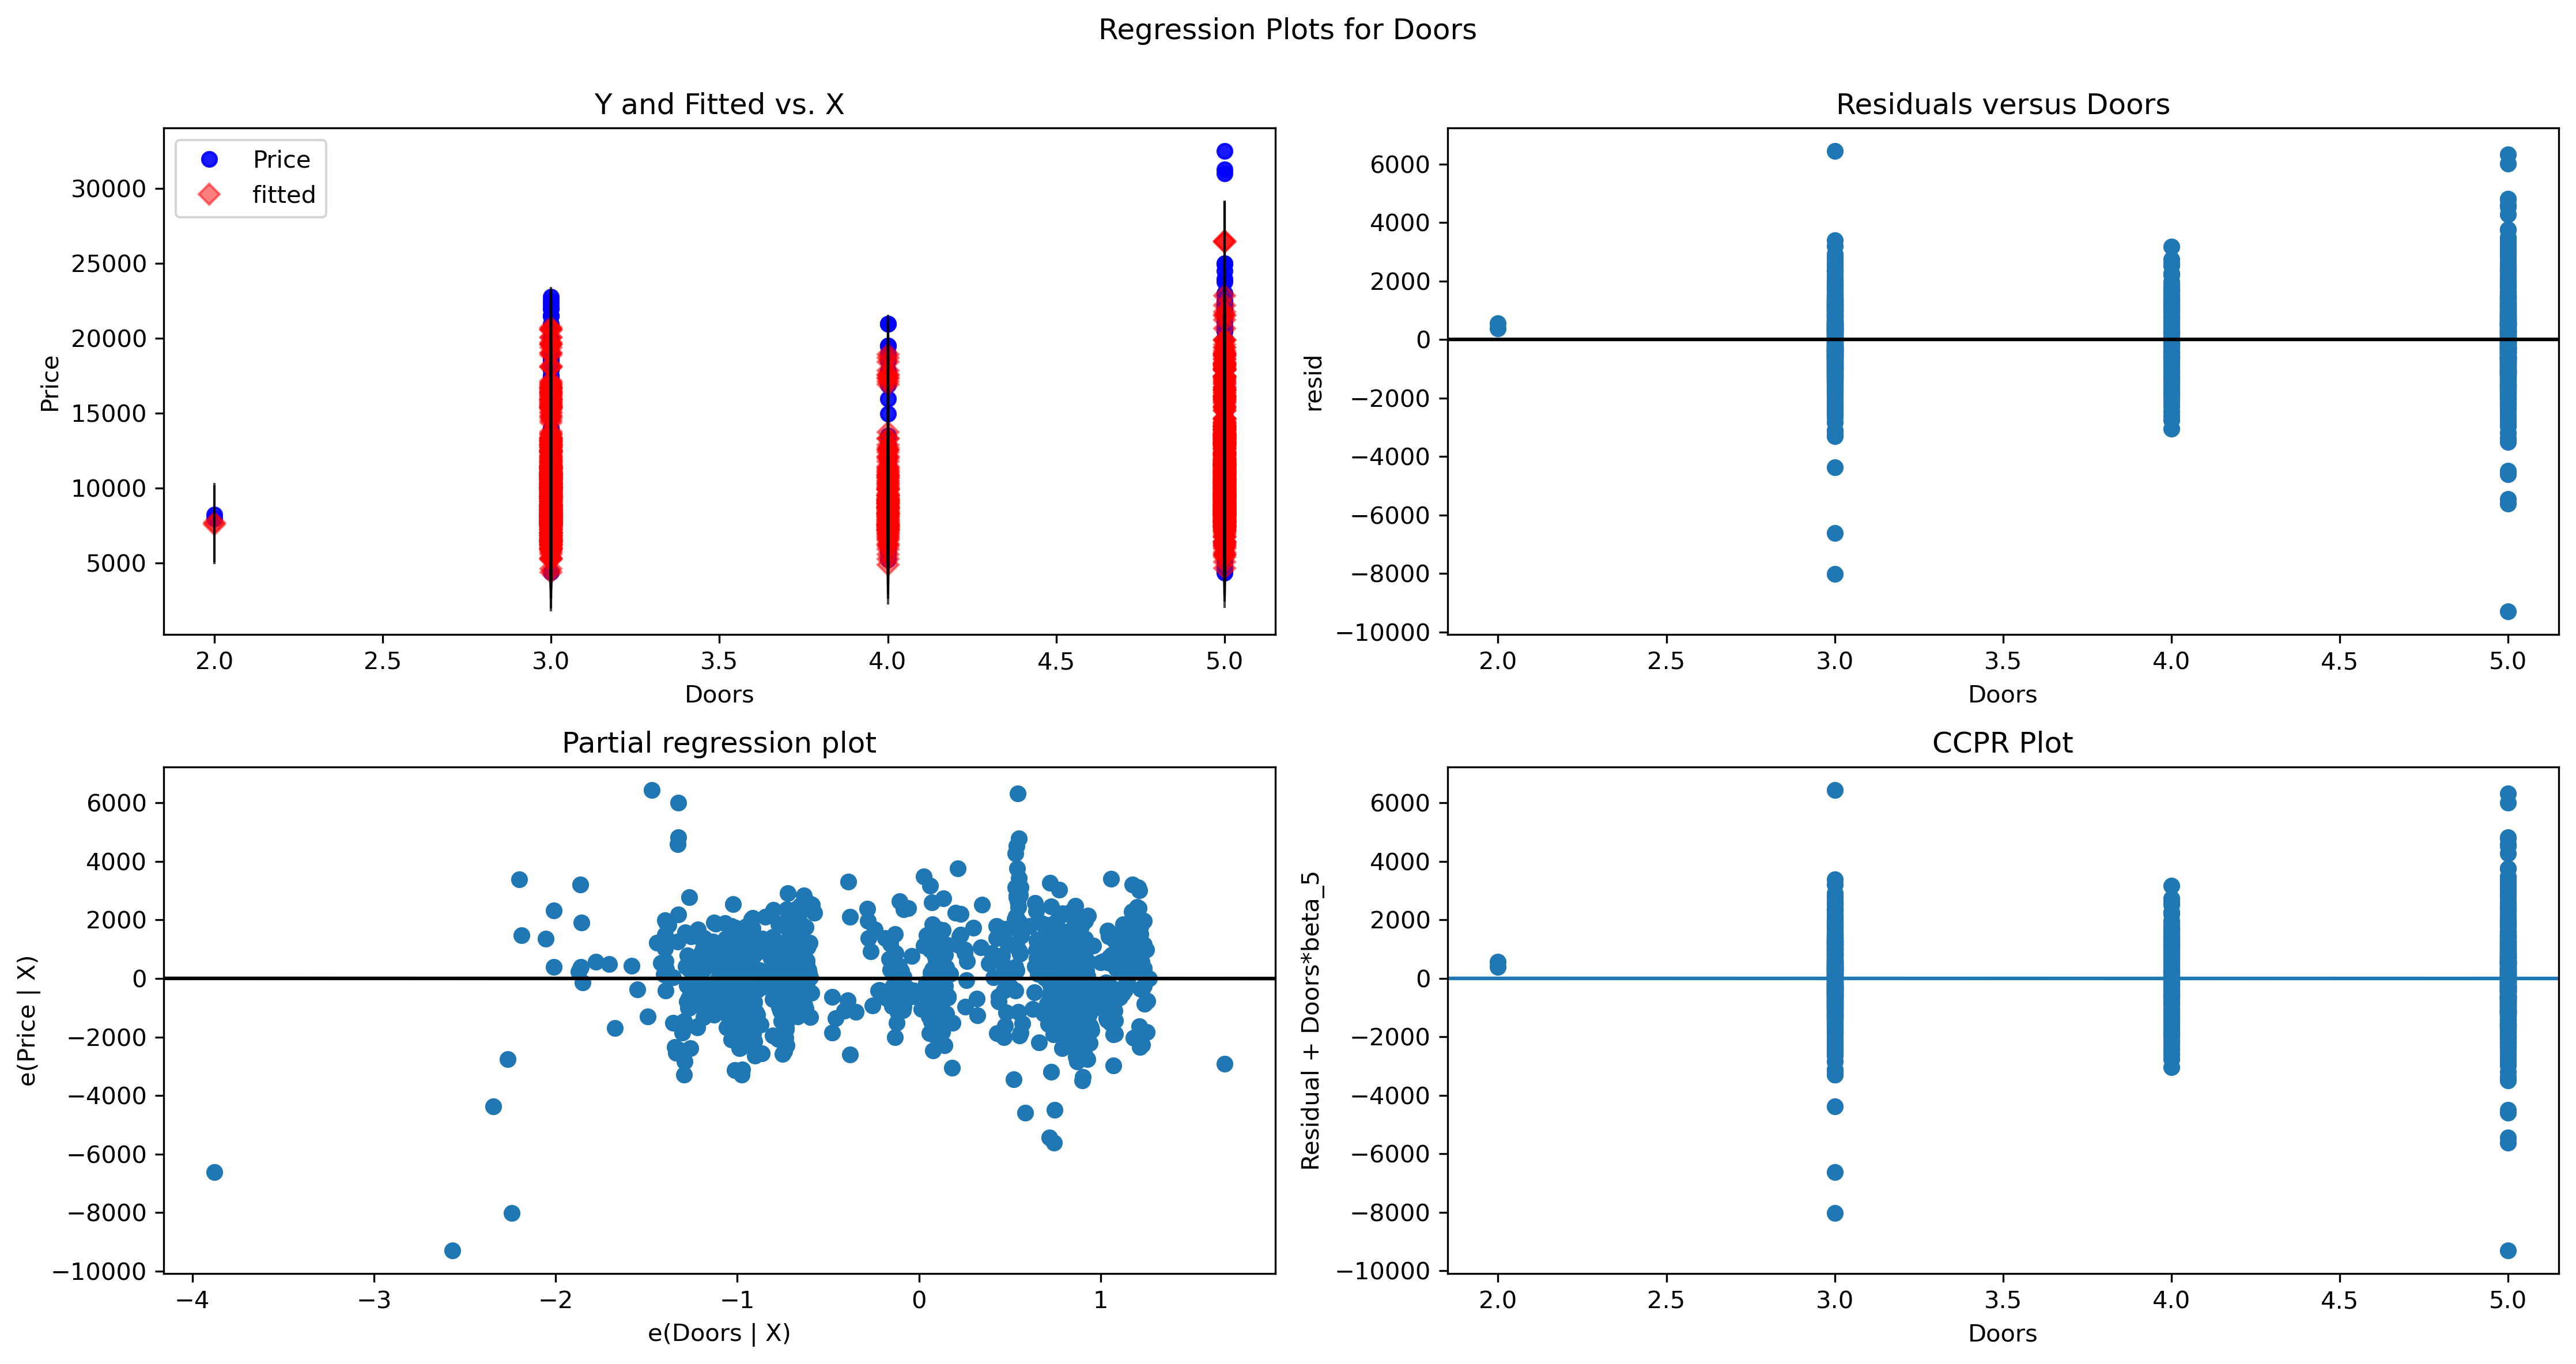

In [87]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

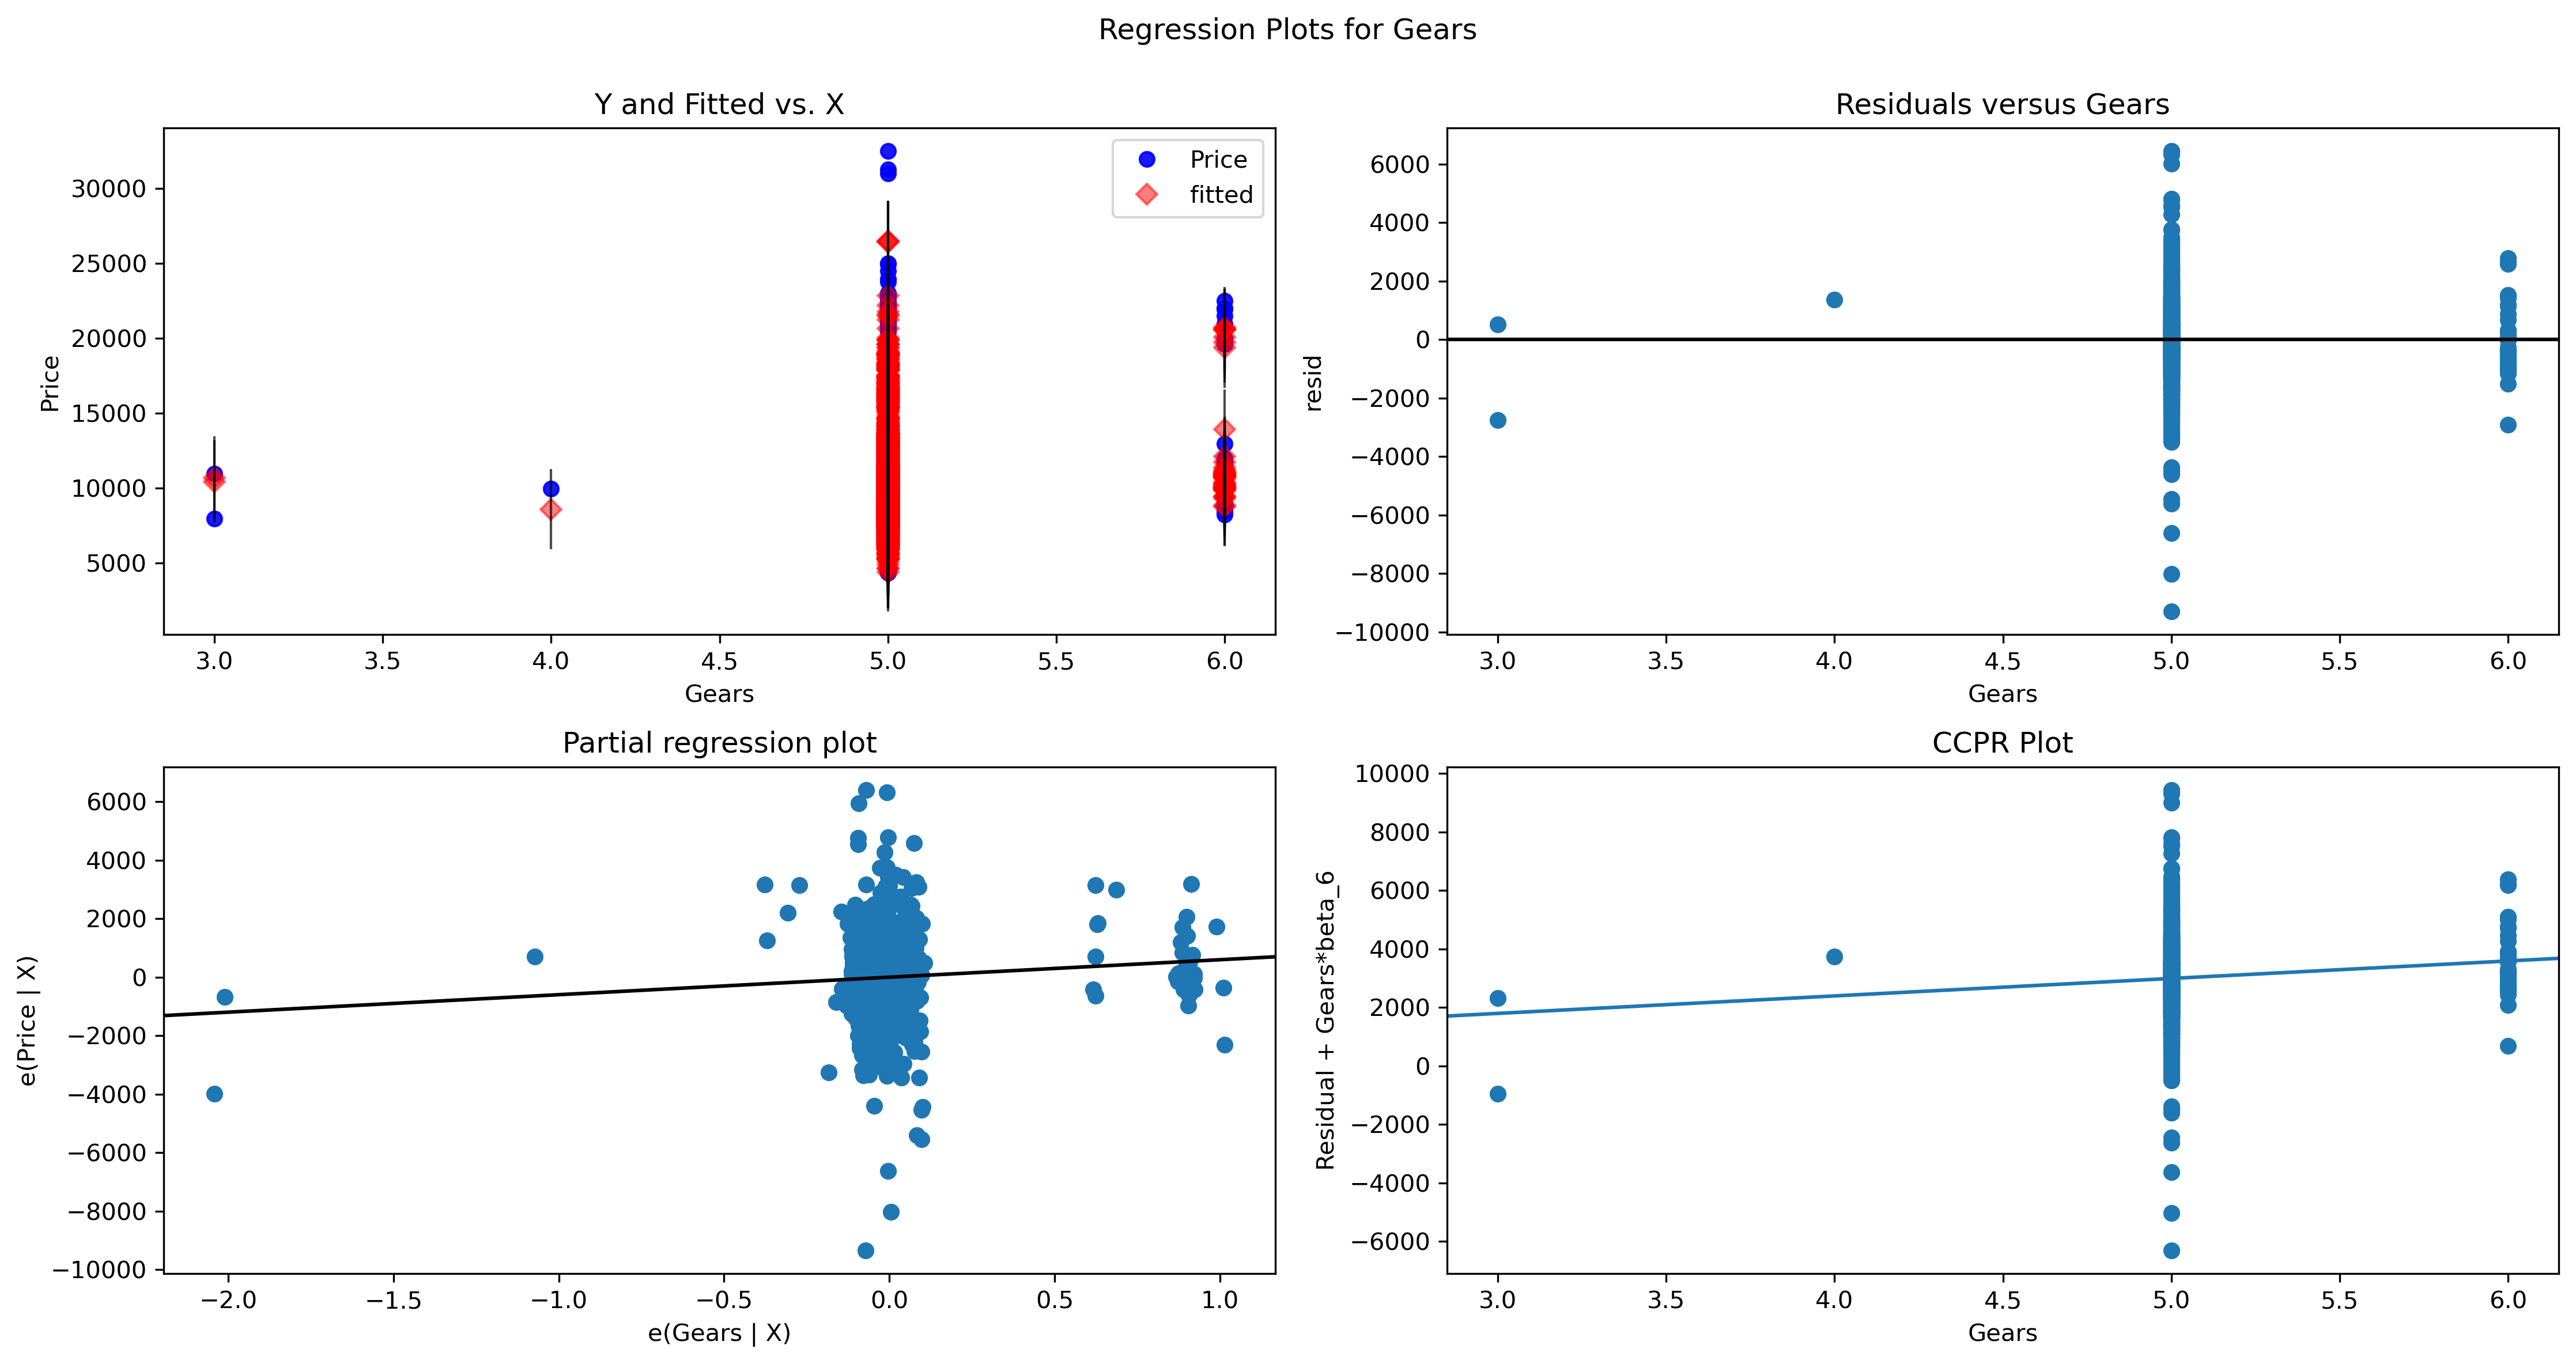

In [88]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

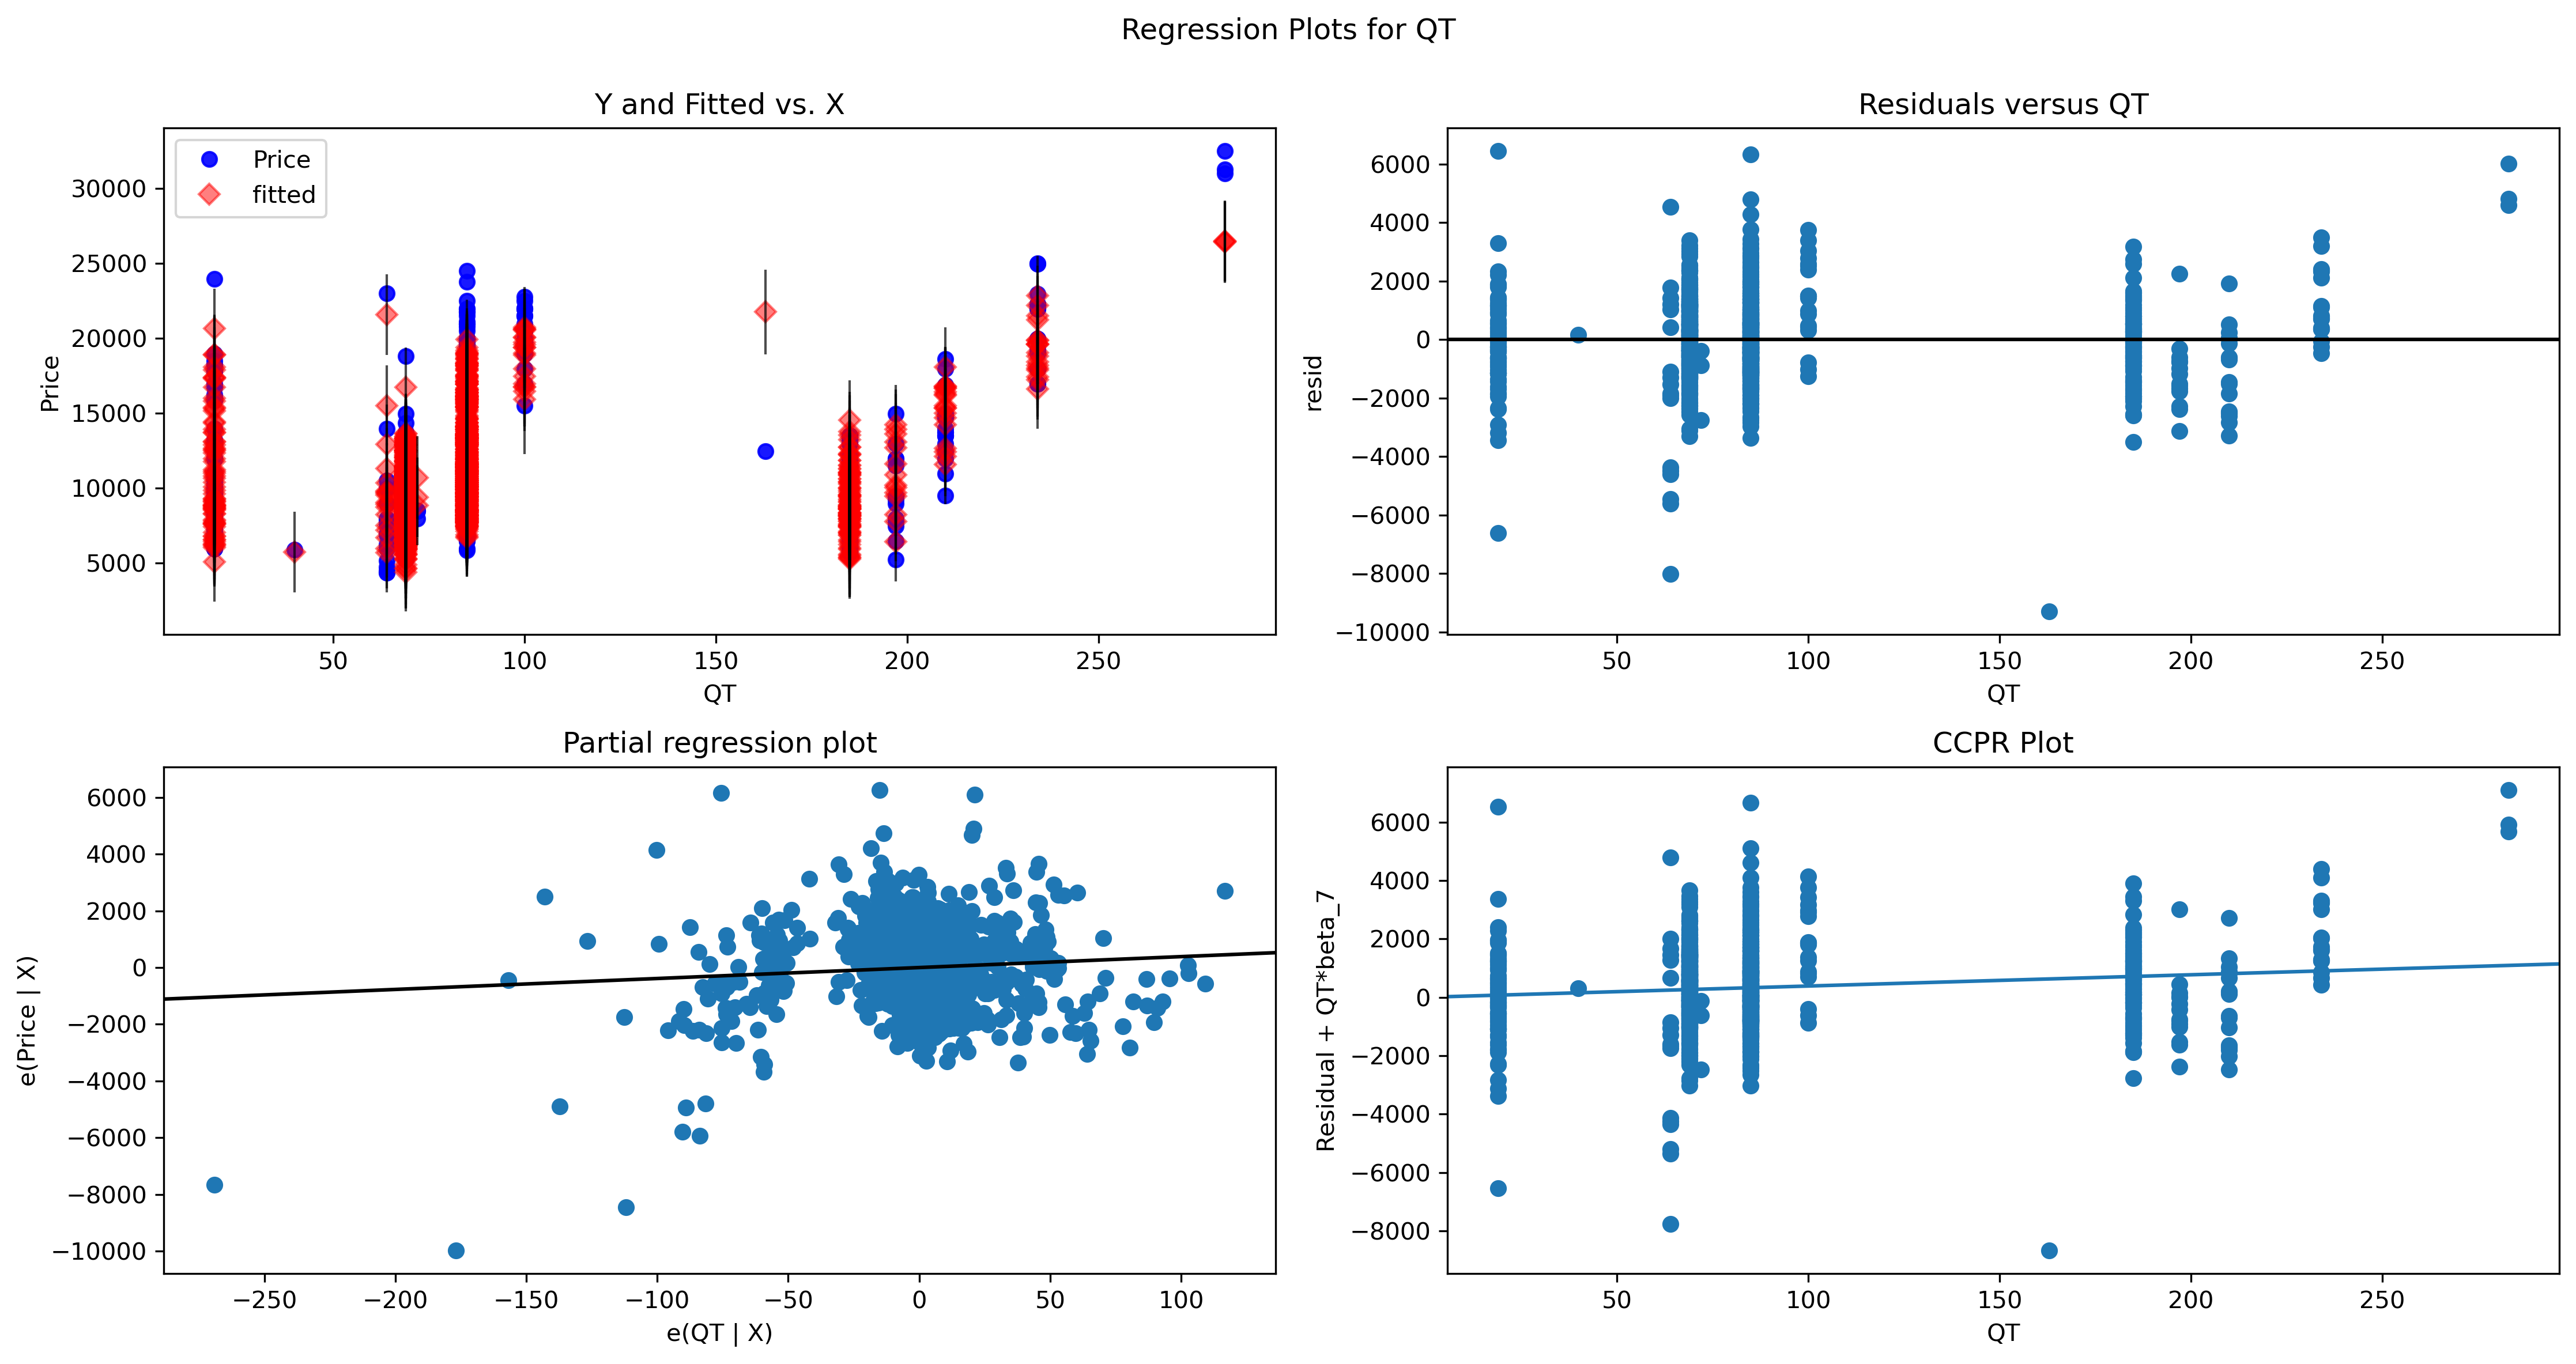

In [89]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

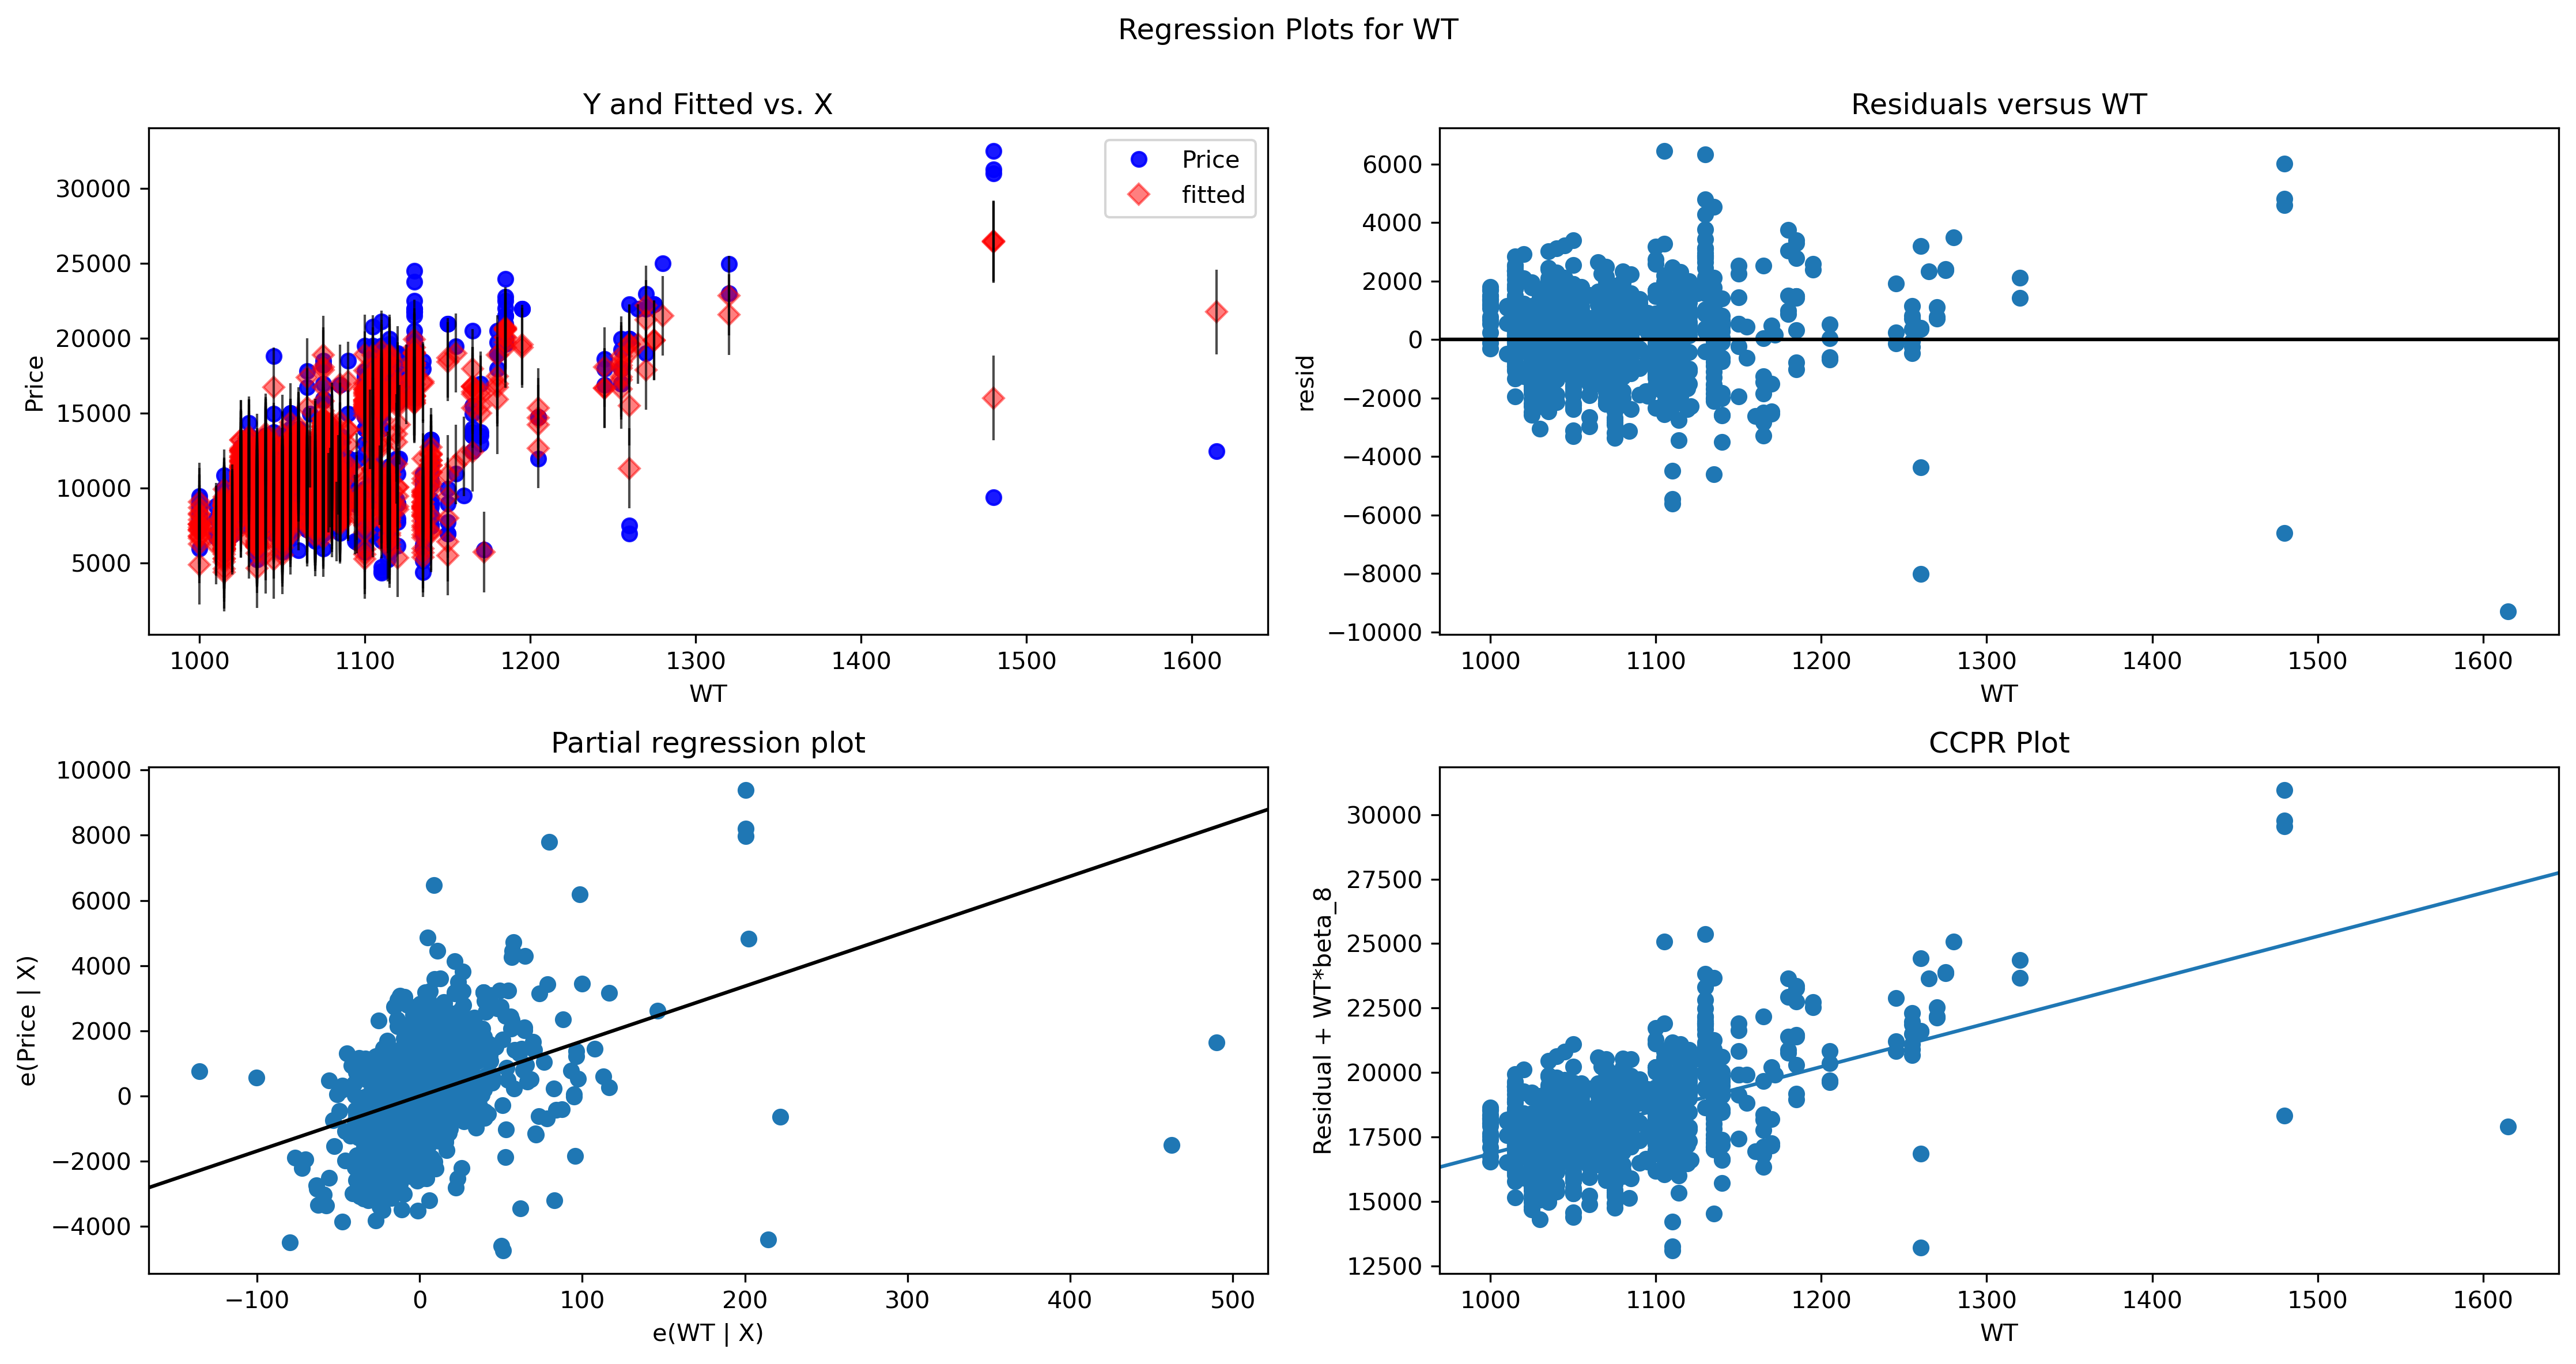

In [90]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

# Model deletion techinque

- Cooks Distance plot

Text(0, 0.5, 'Cooks Distance')

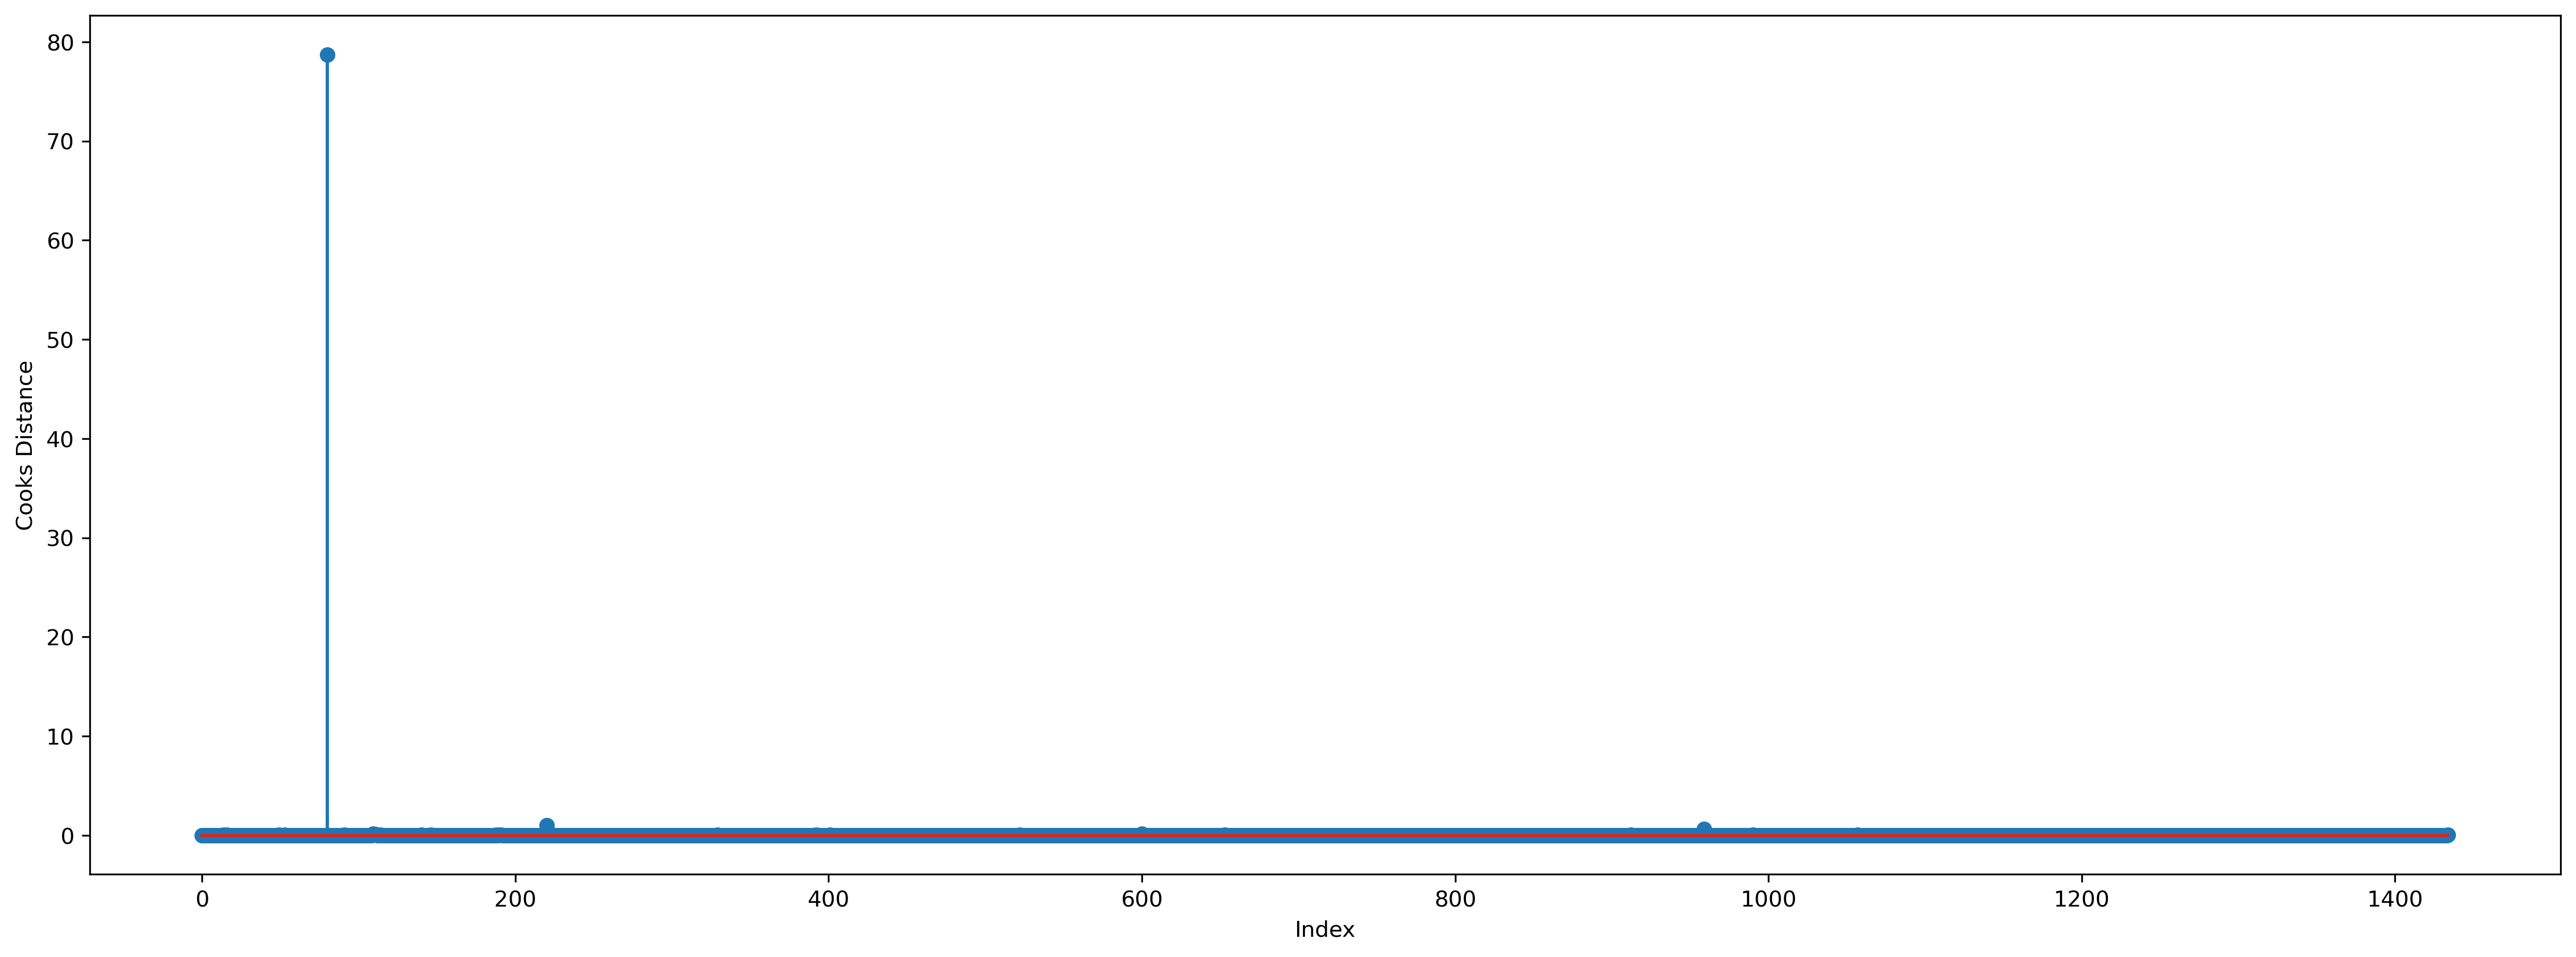

In [91]:
model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [108]:
c,p

(array([6.82351115e-03, 3.57470121e-03, 4.84841571e-03, ...,
        1.06004453e-05, 1.10278948e-03, 1.82405356e-02]),
 array([0.9998578 , 0.99829814, 0.98684013, 0.99228163, 0.99573855,
        0.99775432, 0.99778892, 0.99971116, 0.99998968, 0.9990781 ,
        0.99820672, 0.99772027, 0.99739282, 0.99938832, 0.96894741,
        0.98720476, 0.99855739, 0.99989646, 0.999926  , 0.99998667,
        0.99993408, 0.9998873 , 0.99999374, 0.99999728, 0.99901929,
        0.9998565 , 0.99937062, 0.99983691, 0.99996982, 0.99994169,
        0.99998618, 0.9999599 , 0.99980824, 0.99999974, 0.99188156,
        0.99863602, 0.98133038, 0.99999956, 0.96993695, 0.99986718,
        0.9996696 , 0.99975666, 0.99999008, 0.99692473, 0.99999628,
        0.9682791 , 0.99999919, 0.99831652, 0.84852738, 0.78164746]))

In [92]:
#index and value of influencer where c > 0.5
np.argmax(c),np.max(c)

(80, 78.72950582249207)

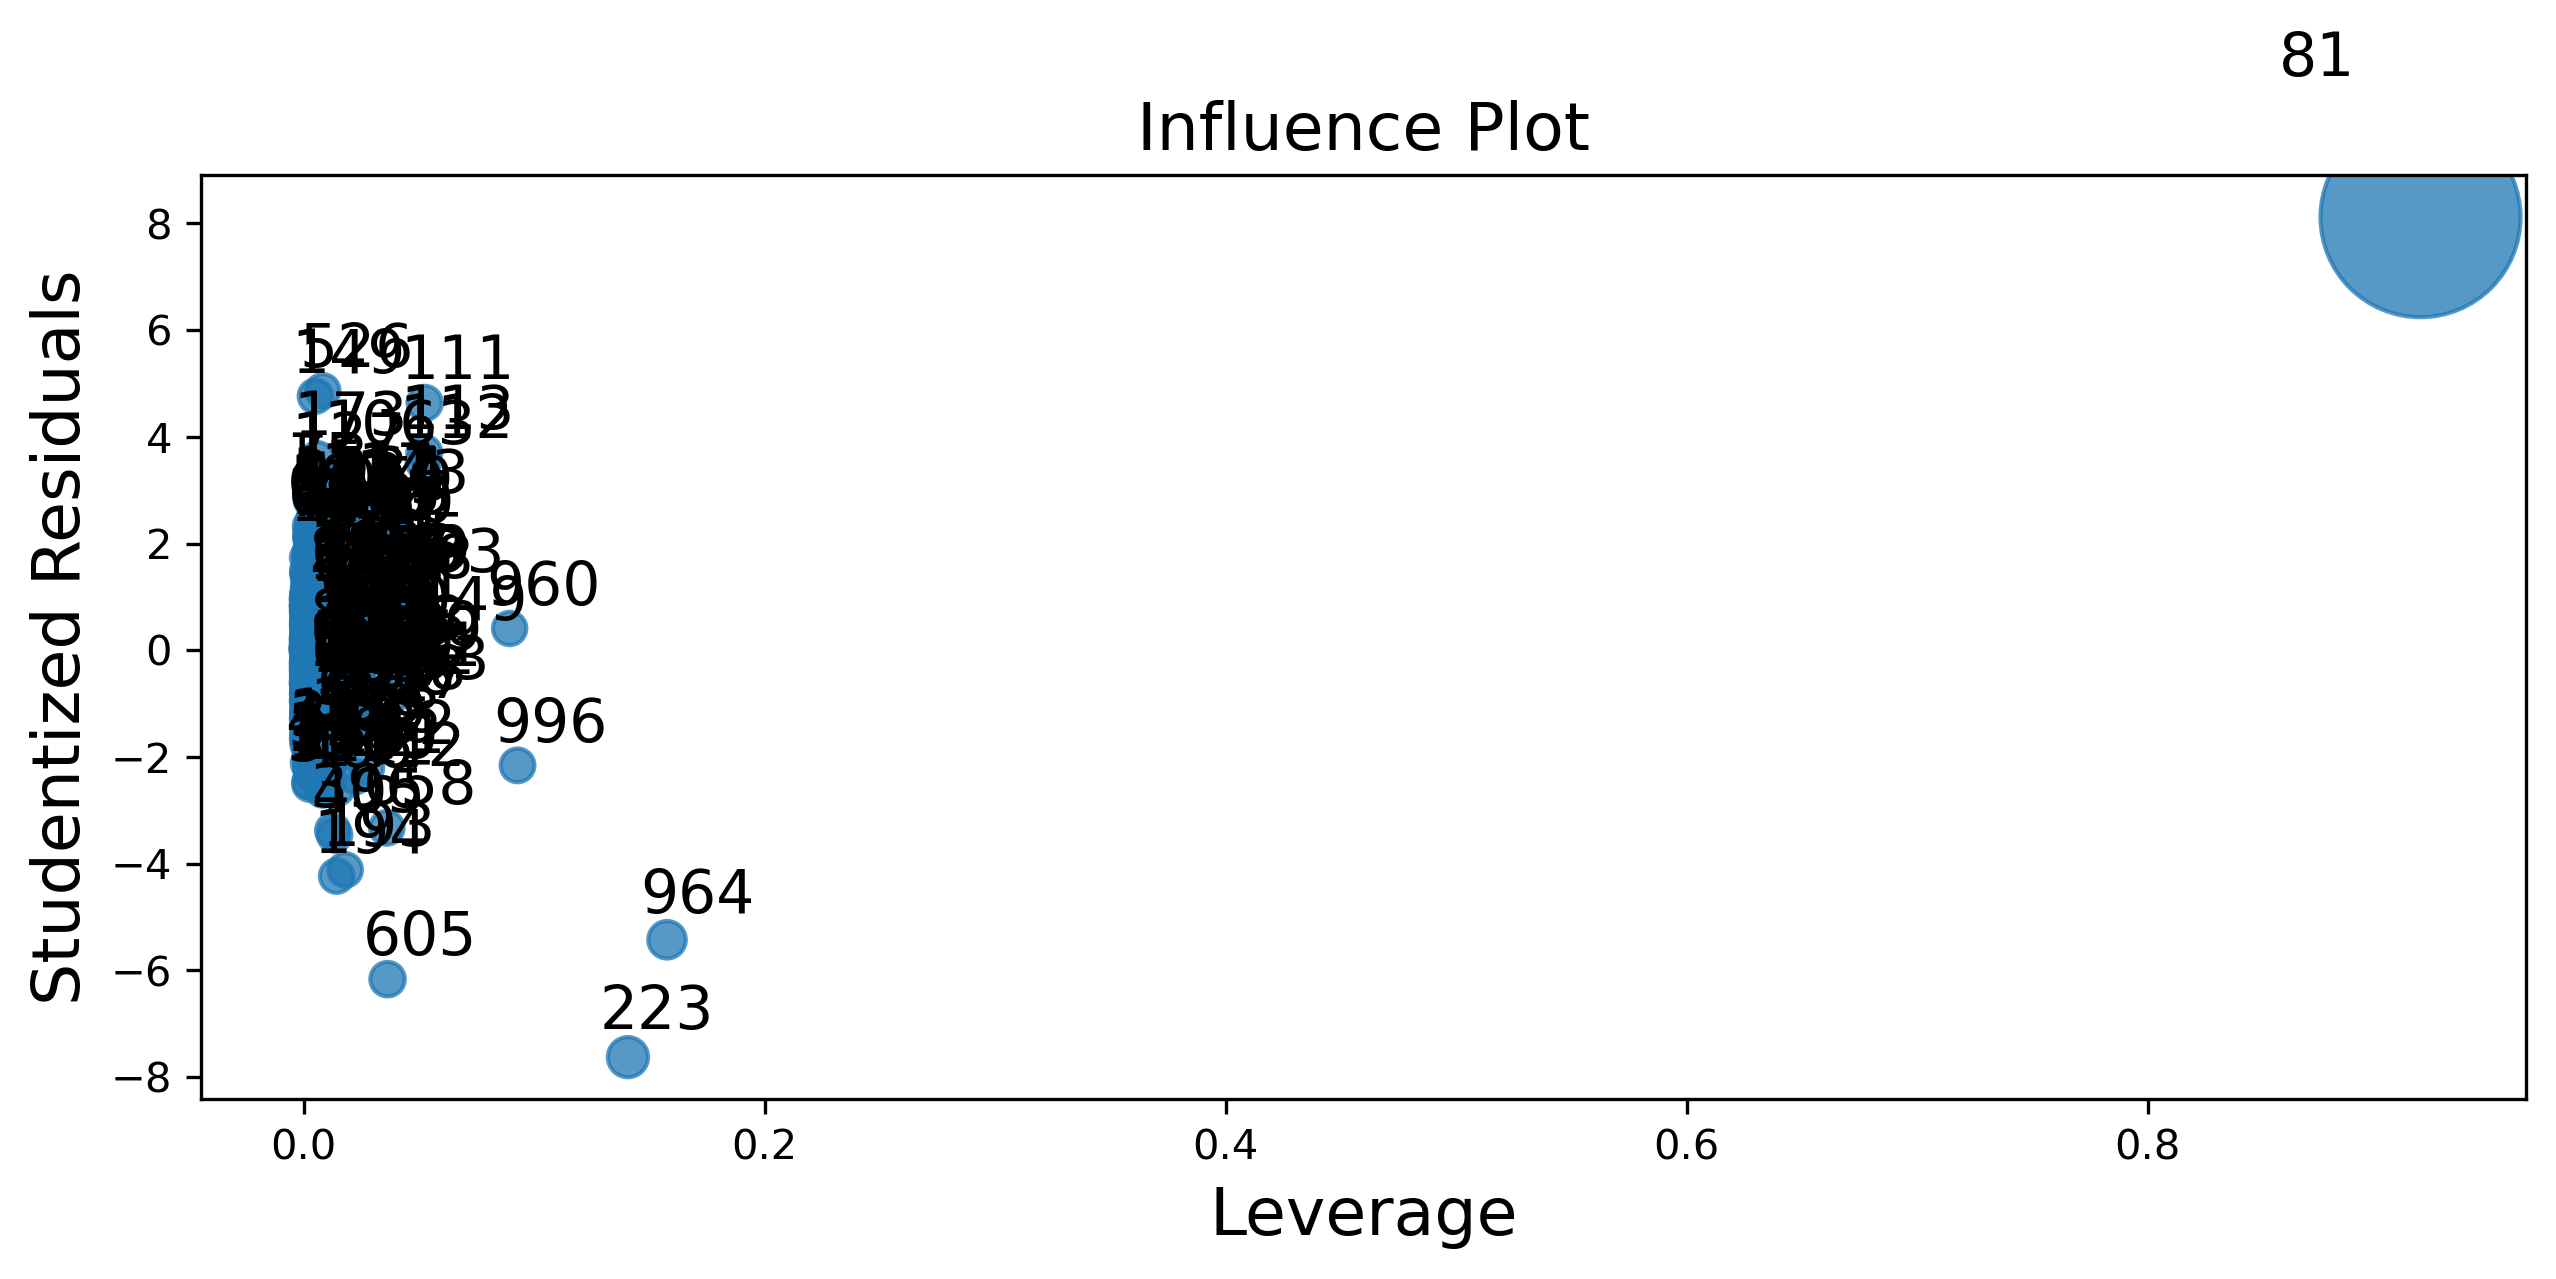

In [93]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model);

In [94]:
data

Age     KM   HP    cc  Doors  Gears   QT    WT
Id                                                  
1      23  46986   90  2000      3      5  210  1165
2      23  72937   90  2000      3      5  210  1165
3      24  41711   90  2000      3      5  210  1165
4      26  48000   90  2000      3      5  210  1165
5      30  38500   90  2000      3      5  210  1170
...   ...    ...  ...   ...    ...    ...  ...   ...
1438   69  20544   86  1300      3      5   69  1025
1439   72  19000   86  1300      3      5   69  1015
1440   71  17016   86  1300      3      5   69  1015
1441   70  16916   86  1300      3      5   69  1015
1442   76      1  110  1600      5      5   19  1114

[1435 rows x 8 columns]

In [95]:
# Leverage cutoff value
# Where K= No. of features/Columns & n= No. of data points
k = len(data.columns)
n = len(data)

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.018815331010452963

In [96]:
data[data.index.isin([80])]

Age     KM  HP    cc  Doors  Gears  QT    WT
Id                                              
80   30  22000  97  1400      5      5  85  1110

In [97]:
data=data.drop(data.index[[80]],axis=0).reset_index(drop=True)
data

Age     KM   HP    cc  Doors  Gears   QT    WT
0      23  46986   90  2000      3      5  210  1165
1      23  72937   90  2000      3      5  210  1165
2      24  41711   90  2000      3      5  210  1165
3      26  48000   90  2000      3      5  210  1165
4      30  38500   90  2000      3      5  210  1170
...   ...    ...  ...   ...    ...    ...  ...   ...
1429   69  20544   86  1300      3      5   69  1025
1430   72  19000   86  1300      3      5   69  1015
1431   71  17016   86  1300      3      5   69  1015
1432   70  16916   86  1300      3      5   69  1015
1433   76      1  110  1600      5      5   19  1114

[1434 rows x 8 columns]

In [98]:
df

Price  Age     KM   HP    cc  Doors  Gears   QT    WT
Id                                                         
1     13500   23  46986   90  2000      3      5  210  1165
2     13750   23  72937   90  2000      3      5  210  1165
3     13950   24  41711   90  2000      3      5  210  1165
4     14950   26  48000   90  2000      3      5  210  1165
5     13750   30  38500   90  2000      3      5  210  1170
...     ...  ...    ...  ...   ...    ...    ...  ...   ...
1438   7500   69  20544   86  1300      3      5   69  1025
1439  10845   72  19000   86  1300      3      5   69  1015
1440   8500   71  17016   86  1300      3      5   69  1015
1441   7250   70  16916   86  1300      3      5   69  1015
1442   6950   76      1  110  1600      5      5   19  1114

[1435 rows x 9 columns]

In [99]:
model.rsquared

0.8625200256946999

In [100]:
 while np.max(c)>0.5 :
    model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=df).fit()
    (c,_) = model1.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df=df.drop(data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=df).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8881939631376063


In [101]:
model.rsquared

0.8625200256946999

In [102]:
model1.rsquared

0.8839154072566275

In [103]:
final_model.rsquared

0.8881939631376063

In [104]:
# say New data for prediction is
test=pd.DataFrame({'Age':15,"KM":50000,"HP":90,"cc":1200,"Doors":4,"Gears":5,"QT":69,"WT":1012},index=[0])
test

Age     KM  HP    cc  Doors  Gears  QT    WT
0   15  50000  90  1200      4      5  69  1012

In [105]:
final_model.predict(test)

0    14547.690365
dtype: float64

In [106]:
table=pd.DataFrame({'Prep_Models':['Model','Final_Model'],
                    'Rsquared':[model.rsquared,final_model.rsquared]})
table

Prep_Models  Rsquared
0        Model  0.862520
1  Final_Model  0.888194